### Data Cleaning & PreProcessing

In [1]:
%%time 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 548 ms, sys: 1.08 s, total: 1.63 s
Wall time: 947 ms


In [2]:
# Reading the data
# Checking the current library 
import os 
print("Current library: \t", os.getcwd())

import glob
allTextFiles = (glob.glob('./data/*.*'))   
allTextFiles

Current library: 	 /home/ubuntu/dspm


['./data/Stream (9).xlsx',
 './data/T Only 3_1_2017 thru 6_30_2017 Random Stream (1).xlsx',
 './data/Stream (10).xlsx',
 './data/T Only 9_1_2017 thru 10_31_2017 Random Stream (1).xlsx',
 './data/Stream (8).xlsx',
 './data/Stream (7).xlsx',
 './data/Stream (4).xlsx',
 './data/Stream (3).xlsx',
 './data/Stream (2).xlsx',
 './data/Stream (11).xlsx',
 './data/Stream (6).xlsx',
 './data/Stream (5).xlsx']

In [3]:
tcnt = 0
ntcnt = 0


for file in allTextFiles:
    print("Reading file ", file)
    fileData = pd.read_excel(file)
    if("Only" in file):
        print('... Twitter Data Identified. ')
        
        if("3_1_2017 thru 6_30_2017" in file):
            fileData["preLaunch"] = 1
        else:
            fileData["preLaunch"] = 0
        
        if(tcnt==0):
            twitterData = fileData
            print(len(twitterData) , len(fileData))
        else:
            twitterData = twitterData.append(fileData)
            print(len(twitterData) , len(fileData))
            
        tcnt += 1
    else:
        print('... Non-Twitter Data Identified. ')
        if(ntcnt==0):
            othersData = fileData
            print(len(othersData) , len(fileData))
        else:
            othersData = othersData.append(fileData)
            print(len(othersData) , len(fileData))
            
        ntcnt += 1


Reading file  ./data/Stream (9).xlsx
... Non-Twitter Data Identified. 
49175 49175
Reading file  ./data/T Only 3_1_2017 thru 6_30_2017 Random Stream (1).xlsx
... Twitter Data Identified. 
50007 50007
Reading file  ./data/Stream (10).xlsx
... Non-Twitter Data Identified. 
99183 50008
Reading file  ./data/T Only 9_1_2017 thru 10_31_2017 Random Stream (1).xlsx
... Twitter Data Identified. 
69545 19538
Reading file  ./data/Stream (8).xlsx
... Non-Twitter Data Identified. 
120868 21685
Reading file  ./data/Stream (7).xlsx
... Non-Twitter Data Identified. 
170875 50007
Reading file  ./data/Stream (4).xlsx
... Non-Twitter Data Identified. 
220882 50007
Reading file  ./data/Stream (3).xlsx
... Non-Twitter Data Identified. 
270889 50007
Reading file  ./data/Stream (2).xlsx
... Non-Twitter Data Identified. 
319918 49029
Reading file  ./data/Stream (11).xlsx
... Non-Twitter Data Identified. 
343249 23331
Reading file  ./data/Stream (6).xlsx
... Non-Twitter Data Identified. 
393256 50007
Reading f

In [4]:
twitterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69545 entries, 0 to 19537
Data columns (total 42 columns):
Post ID                                   50000 non-null float64
Sound Bite Text                           69527 non-null object
Ratings and Scores                        0 non-null float64
Title                                     0 non-null float64
Source Type                               50000 non-null object
Post Type                                 50000 non-null object
Media Type                                50000 non-null object
URL                                       50000 non-null object
Domain                                    50000 non-null object
Published Date (GMT-04:00) New York       69527 non-null object
Author Gender                             50000 non-null object
Author URL                                50000 non-null object
Author Name                               49998 non-null object
Author Handle                             50000 non-null object


In [5]:
othersData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443263 entries, 0 to 50006
Data columns (total 41 columns):
Post ID                                   443173 non-null object
Sound Bite Text                           443173 non-null object
Ratings and Scores                        0 non-null float64
Title                                     303887 non-null object
Source Type                               443173 non-null object
Post Type                                 443173 non-null object
Media Type                                443173 non-null object
URL                                       443173 non-null object
Domain                                    443173 non-null object
Published Date (GMT-04:00) New York       443173 non-null object
Author Gender                             443173 non-null object
Author URL                                313291 non-null object
Author Name                               329873 non-null object
Author Handle                             156106 

In [6]:
len(twitterData)

69545

In [7]:
len(othersData)

443263

In [8]:
twitterData.to_pickle('./data/FullSize_RAW_TwitterData')

In [9]:
othersData.to_pickle('./data/FullSize_RAW_OthersData')

In [10]:
twitterData = pd.read_pickle('./data/FullSize_RAW_TwitterData')
othersData = pd.read_pickle('./data/FullSize_RAW_OthersData')

### Cleaning the data

In [11]:
# Removing data with no post id
print(sum(twitterData['Post ID'].isna()), sum(othersData['Post ID'].isna()))

19545 90


In [12]:
twitterData = twitterData[twitterData['Post ID'].notna()]
othersData = othersData[othersData['Post ID'].notna()]

In [13]:
twitterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 19528
Data columns (total 42 columns):
Post ID                                   50000 non-null float64
Sound Bite Text                           50000 non-null object
Ratings and Scores                        0 non-null float64
Title                                     0 non-null float64
Source Type                               50000 non-null object
Post Type                                 50000 non-null object
Media Type                                50000 non-null object
URL                                       50000 non-null object
Domain                                    50000 non-null object
Published Date (GMT-04:00) New York       50000 non-null object
Author Gender                             50000 non-null object
Author URL                                50000 non-null object
Author Name                               49998 non-null object
Author Handle                             50000 non-null object


In [14]:
othersData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443173 entries, 0 to 49997
Data columns (total 41 columns):
Post ID                                   443173 non-null object
Sound Bite Text                           443173 non-null object
Ratings and Scores                        0 non-null float64
Title                                     303887 non-null object
Source Type                               443173 non-null object
Post Type                                 443173 non-null object
Media Type                                443173 non-null object
URL                                       443173 non-null object
Domain                                    443173 non-null object
Published Date (GMT-04:00) New York       443173 non-null object
Author Gender                             443173 non-null object
Author URL                                313291 non-null object
Author Name                               329873 non-null object
Author Handle                             156106 

In [15]:
np.sum(othersData['Post Type'] == 'Replies and Comments'), np.sum(twitterData['Post Type'] == 'Replies and Comments')

(61085, 1689)

In [16]:
twitterData = twitterData[twitterData['Post Type'] != 'Replies and Comments']
othersData = othersData[othersData['Post Type'] != 'Replies and Comments']

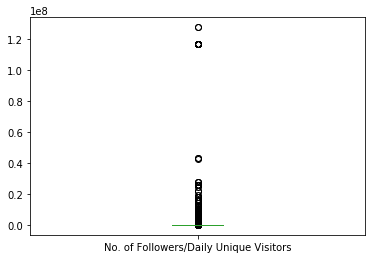

In [17]:
othersData["No. of Followers/Daily Unique Visitors"].plot.box()

In [18]:
# twitterData["No. of Followers/Daily Unique Visitors"].values
print(np.sum(twitterData["No. of Followers/Daily Unique Visitors"]>(twitterData["No. of Followers/Daily Unique Visitors"].mean() + 1*twitterData["No. of Followers/Daily Unique Visitors"].std() )))
print(twitterData["No. of Followers/Daily Unique Visitors"].mean() + 1*twitterData["No. of Followers/Daily Unique Visitors"].std() )

290
321108.2991376286


In [19]:
twitterData =  twitterData[twitterData["No. of Followers/Daily Unique Visitors"]<=(twitterData["No. of Followers/Daily Unique Visitors"].mean() + 1*twitterData["No. of Followers/Daily Unique Visitors"].std() )]
len(twitterData)

48021

In [20]:
print(np.sum(othersData["No. of Followers/Daily Unique Visitors"]>(othersData["No. of Followers/Daily Unique Visitors"].mean() + 1*othersData["No. of Followers/Daily Unique Visitors"].std() )))

3437


In [21]:
othersData = othersData[othersData["No. of Followers/Daily Unique Visitors"]<=(othersData["No. of Followers/Daily Unique Visitors"].mean() + 1*othersData["No. of Followers/Daily Unique Visitors"].std() )]
len(othersData)

378651

In [22]:
othersData.to_pickle("./data/FullSize_preprocessed_othersData")

In [23]:
twitterData.to_pickle("./data/FullSize_preprocessed_twitterData")

In [24]:
X_twitterData = twitterData["Sound Bite Text"].values

In [25]:
X_otherData = othersData["Sound Bite Text"].values

In [26]:
twitterData.head()

,Post ID,Sound Bite Text,Ratings and Scores,Title,Source Type,Post Type,Media Type,URL,Domain,Published Date (GMT-04:00) New York,...,Total Engagements,Post Comments,Post Likes,Post Shares,Post Views,Post Dislikes,Product Name,Product Hierarchy,Rating,preLaunch
0,8.767150e+17,RT @grattongirl: iPhone 8 To Feature 5G Intern...,NaN,NaN,Twitter,Retweets and Reblogs,Image; Link,http://twitter.com/KevinAMoon/statuses/8767150...,twitter.com,"Jun 19, 2017 4:15:28 AM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,8.640177e+17,RT @iDeviceCare: The price of the iPhone 8 wil...,NaN,NaN,Twitter,Retweets and Reblogs,Image; Link,http://twitter.com/jerryluti/statuses/86401768...,twitter.com,"May 15, 2017 3:20:44 AM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,8.802432e+17,RT @9to5mac: What iOS 11 tells us about the iP...,NaN,NaN,Twitter,Retweets and Reblogs,Image; Link,http://twitter.com/IssaNY25/statuses/880243202...,twitter.com,"Jun 28, 2017 9:55:08 PM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,8.540839e+17,Samsung Galaxy S8 and S8 Plus undergo a Batter...,NaN,NaN,Twitter,Original,Image; Link,http://twitter.com/gdelussigny/statuses/854083...,twitter.com,"Apr 17, 2017 5:27:25 PM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,8.577652e+17,"""Another iPhone 8 leak hints at wireless charg...",NaN,NaN,Twitter,Original,Link,http://twitter.com/trothwell_null/statuses/857...,twitter.com,"Apr 27, 2017 9:15:23 PM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### Running count vectorization after lemmatization

In [42]:
import spacy

In [ ]:
from collections import Counter
import re
import spacy
nlp = spacy.load('en')
nlp.max_length = 6000000

frequencyCount = Counter()

i = 0
for token in X_twitterData:
    curTextParsed = nlp(token)
    print("Parsing file obj {}. Number of characters : {}".format(i,len(token)))
    
    for eachWord in curTextParsed:
        curLemma = eachWord.lemma_.lower()
#         print(curLemma, eachWord.orth_, eachWord.ent_type_)
        if (re.match('[a-zA-Z]+$', curLemma)):
            frequencyCount[curLemma] += 1
            
    print("Current lemma counter size : ", len(frequencyCount))
    i += 1

Parsing file obj 0. Number of characters : 119
Current lemma counter size :  11
Parsing file obj 1. Number of characters : 152
Current lemma counter size :  20
Parsing file obj 2. Number of characters : 107
Current lemma counter size :  24
Parsing file obj 3. Number of characters : 100
Current lemma counter size :  32
Parsing file obj 4. Number of characters : 103
Current lemma counter size :  40
Parsing file obj 5. Number of characters : 102
Current lemma counter size :  44
Parsing file obj 6. Number of characters : 109
Current lemma counter size :  53
Parsing file obj 7. Number of characters : 126
Current lemma counter size :  63
Parsing file obj 8. Number of characters : 133
Current lemma counter size :  70
Parsing file obj 9. Number of characters : 117
Current lemma counter size :  73
Parsing file obj 10. Number of characters : 85
Current lemma counter size :  78
Parsing file obj 11. Number of characters : 121
Current lemma counter size :  86
Parsing file obj 12. Number of characte

Parsing file obj 116. Number of characters : 74
Current lemma counter size :  466
Parsing file obj 117. Number of characters : 92
Current lemma counter size :  466
Parsing file obj 118. Number of characters : 157
Current lemma counter size :  473
Parsing file obj 119. Number of characters : 170
Current lemma counter size :  478
Parsing file obj 120. Number of characters : 135
Current lemma counter size :  482
Parsing file obj 121. Number of characters : 122
Current lemma counter size :  482
Parsing file obj 122. Number of characters : 109
Current lemma counter size :  482
Parsing file obj 123. Number of characters : 122
Current lemma counter size :  482
Parsing file obj 124. Number of characters : 107
Current lemma counter size :  483
Parsing file obj 125. Number of characters : 115
Current lemma counter size :  483
Parsing file obj 126. Number of characters : 113
Current lemma counter size :  485
Parsing file obj 127. Number of characters : 118
Current lemma counter size :  488
Parsin

Parsing file obj 228. Number of characters : 130
Current lemma counter size :  722
Parsing file obj 229. Number of characters : 85
Current lemma counter size :  723
Parsing file obj 230. Number of characters : 99
Current lemma counter size :  723
Parsing file obj 231. Number of characters : 136
Current lemma counter size :  726
Parsing file obj 232. Number of characters : 115
Current lemma counter size :  728
Parsing file obj 233. Number of characters : 91
Current lemma counter size :  728
Parsing file obj 234. Number of characters : 125
Current lemma counter size :  732
Parsing file obj 235. Number of characters : 94
Current lemma counter size :  736
Parsing file obj 236. Number of characters : 109
Current lemma counter size :  736
Parsing file obj 237. Number of characters : 108
Current lemma counter size :  742
Parsing file obj 238. Number of characters : 159
Current lemma counter size :  742
Parsing file obj 239. Number of characters : 99
Current lemma counter size :  742
Parsing f

Parsing file obj 342. Number of characters : 100
Current lemma counter size :  942
Parsing file obj 343. Number of characters : 149
Current lemma counter size :  947
Parsing file obj 344. Number of characters : 120
Current lemma counter size :  949
Parsing file obj 345. Number of characters : 126
Current lemma counter size :  949
Parsing file obj 346. Number of characters : 132
Current lemma counter size :  949
Parsing file obj 347. Number of characters : 135
Current lemma counter size :  953
Parsing file obj 348. Number of characters : 103
Current lemma counter size :  953
Parsing file obj 349. Number of characters : 96
Current lemma counter size :  953
Parsing file obj 350. Number of characters : 148
Current lemma counter size :  956
Parsing file obj 351. Number of characters : 157
Current lemma counter size :  962
Parsing file obj 352. Number of characters : 113
Current lemma counter size :  962
Parsing file obj 353. Number of characters : 131
Current lemma counter size :  968
Parsi

Parsing file obj 455. Number of characters : 128
Current lemma counter size :  1117
Parsing file obj 456. Number of characters : 147
Current lemma counter size :  1120
Parsing file obj 457. Number of characters : 152
Current lemma counter size :  1122
Parsing file obj 458. Number of characters : 116
Current lemma counter size :  1124
Parsing file obj 459. Number of characters : 162
Current lemma counter size :  1124
Parsing file obj 460. Number of characters : 73
Current lemma counter size :  1124
Parsing file obj 461. Number of characters : 156
Current lemma counter size :  1131
Parsing file obj 462. Number of characters : 124
Current lemma counter size :  1131
Parsing file obj 463. Number of characters : 129
Current lemma counter size :  1132
Parsing file obj 464. Number of characters : 108
Current lemma counter size :  1132
Parsing file obj 465. Number of characters : 96
Current lemma counter size :  1135
Parsing file obj 466. Number of characters : 66
Current lemma counter size :  

Parsing file obj 568. Number of characters : 151
Current lemma counter size :  1269
Parsing file obj 569. Number of characters : 84
Current lemma counter size :  1272
Parsing file obj 570. Number of characters : 177
Current lemma counter size :  1274
Parsing file obj 571. Number of characters : 92
Current lemma counter size :  1274
Parsing file obj 572. Number of characters : 130
Current lemma counter size :  1274
Parsing file obj 573. Number of characters : 106
Current lemma counter size :  1277
Parsing file obj 574. Number of characters : 93
Current lemma counter size :  1277
Parsing file obj 575. Number of characters : 119
Current lemma counter size :  1277
Parsing file obj 576. Number of characters : 127
Current lemma counter size :  1281
Parsing file obj 577. Number of characters : 121
Current lemma counter size :  1284
Parsing file obj 578. Number of characters : 101
Current lemma counter size :  1285
Parsing file obj 579. Number of characters : 125
Current lemma counter size :  

Parsing file obj 667. Number of characters : 54
Current lemma counter size :  1397
Parsing file obj 668. Number of characters : 102
Current lemma counter size :  1401
Parsing file obj 669. Number of characters : 103
Current lemma counter size :  1402
Parsing file obj 670. Number of characters : 130
Current lemma counter size :  1403
Parsing file obj 671. Number of characters : 130
Current lemma counter size :  1404
Parsing file obj 672. Number of characters : 111
Current lemma counter size :  1406
Parsing file obj 673. Number of characters : 99
Current lemma counter size :  1407
Parsing file obj 674. Number of characters : 87
Current lemma counter size :  1408
Parsing file obj 675. Number of characters : 56
Current lemma counter size :  1408
Parsing file obj 676. Number of characters : 121
Current lemma counter size :  1408
Parsing file obj 677. Number of characters : 118
Current lemma counter size :  1412
Parsing file obj 678. Number of characters : 177
Current lemma counter size :  1

Parsing file obj 766. Number of characters : 107
Current lemma counter size :  1504
Parsing file obj 767. Number of characters : 94
Current lemma counter size :  1504
Parsing file obj 768. Number of characters : 84
Current lemma counter size :  1505
Parsing file obj 769. Number of characters : 148
Current lemma counter size :  1505
Parsing file obj 770. Number of characters : 106
Current lemma counter size :  1506
Parsing file obj 771. Number of characters : 87
Current lemma counter size :  1506
Parsing file obj 772. Number of characters : 78
Current lemma counter size :  1506
Parsing file obj 773. Number of characters : 128
Current lemma counter size :  1506
Parsing file obj 774. Number of characters : 138
Current lemma counter size :  1508
Parsing file obj 775. Number of characters : 110
Current lemma counter size :  1510
Parsing file obj 776. Number of characters : 114
Current lemma counter size :  1511
Parsing file obj 777. Number of characters : 140
Current lemma counter size :  1

Parsing file obj 866. Number of characters : 75
Current lemma counter size :  1612
Parsing file obj 867. Number of characters : 130
Current lemma counter size :  1614
Parsing file obj 868. Number of characters : 123
Current lemma counter size :  1614
Parsing file obj 869. Number of characters : 136
Current lemma counter size :  1615
Parsing file obj 870. Number of characters : 75
Current lemma counter size :  1615
Parsing file obj 871. Number of characters : 77
Current lemma counter size :  1615
Parsing file obj 872. Number of characters : 97
Current lemma counter size :  1615
Parsing file obj 873. Number of characters : 101
Current lemma counter size :  1615
Parsing file obj 874. Number of characters : 120
Current lemma counter size :  1615
Parsing file obj 875. Number of characters : 116
Current lemma counter size :  1615
Parsing file obj 876. Number of characters : 115
Current lemma counter size :  1615
Parsing file obj 877. Number of characters : 141
Current lemma counter size :  1

Parsing file obj 979. Number of characters : 136
Current lemma counter size :  1718
Parsing file obj 980. Number of characters : 143
Current lemma counter size :  1720
Parsing file obj 981. Number of characters : 125
Current lemma counter size :  1724
Parsing file obj 982. Number of characters : 177
Current lemma counter size :  1724
Parsing file obj 983. Number of characters : 129
Current lemma counter size :  1726
Parsing file obj 984. Number of characters : 60
Current lemma counter size :  1729
Parsing file obj 985. Number of characters : 115
Current lemma counter size :  1729
Parsing file obj 986. Number of characters : 126
Current lemma counter size :  1729
Parsing file obj 987. Number of characters : 110
Current lemma counter size :  1730
Parsing file obj 988. Number of characters : 131
Current lemma counter size :  1732
Parsing file obj 989. Number of characters : 140
Current lemma counter size :  1732
Parsing file obj 990. Number of characters : 75
Current lemma counter size : 

Parsing file obj 1091. Number of characters : 172
Current lemma counter size :  1835
Parsing file obj 1092. Number of characters : 101
Current lemma counter size :  1835
Parsing file obj 1093. Number of characters : 122
Current lemma counter size :  1835
Parsing file obj 1094. Number of characters : 115
Current lemma counter size :  1835
Parsing file obj 1095. Number of characters : 106
Current lemma counter size :  1836
Parsing file obj 1096. Number of characters : 95
Current lemma counter size :  1836
Parsing file obj 1097. Number of characters : 131
Current lemma counter size :  1836
Parsing file obj 1098. Number of characters : 91
Current lemma counter size :  1838
Parsing file obj 1099. Number of characters : 103
Current lemma counter size :  1838
Parsing file obj 1100. Number of characters : 88
Current lemma counter size :  1839
Parsing file obj 1101. Number of characters : 143
Current lemma counter size :  1839
Parsing file obj 1102. Number of characters : 51
Current lemma count

Current lemma counter size :  1901
Parsing file obj 1191. Number of characters : 121
Current lemma counter size :  1901
Parsing file obj 1192. Number of characters : 83
Current lemma counter size :  1903
Parsing file obj 1193. Number of characters : 115
Current lemma counter size :  1903
Parsing file obj 1194. Number of characters : 158
Current lemma counter size :  1909
Parsing file obj 1195. Number of characters : 79
Current lemma counter size :  1909
Parsing file obj 1196. Number of characters : 108
Current lemma counter size :  1909
Parsing file obj 1197. Number of characters : 108
Current lemma counter size :  1909
Parsing file obj 1198. Number of characters : 122
Current lemma counter size :  1909
Parsing file obj 1199. Number of characters : 109
Current lemma counter size :  1910
Parsing file obj 1200. Number of characters : 147
Current lemma counter size :  1912
Parsing file obj 1201. Number of characters : 75
Current lemma counter size :  1913
Parsing file obj 1202. Number of 

Parsing file obj 1304. Number of characters : 108
Current lemma counter size :  1989
Parsing file obj 1305. Number of characters : 114
Current lemma counter size :  1991
Parsing file obj 1306. Number of characters : 107
Current lemma counter size :  1991
Parsing file obj 1307. Number of characters : 107
Current lemma counter size :  1991
Parsing file obj 1308. Number of characters : 20
Current lemma counter size :  1992
Parsing file obj 1309. Number of characters : 133
Current lemma counter size :  1993
Parsing file obj 1310. Number of characters : 128
Current lemma counter size :  1994
Parsing file obj 1311. Number of characters : 122
Current lemma counter size :  1995
Parsing file obj 1312. Number of characters : 88
Current lemma counter size :  1996
Parsing file obj 1313. Number of characters : 107
Current lemma counter size :  1997
Parsing file obj 1314. Number of characters : 124
Current lemma counter size :  1998
Parsing file obj 1315. Number of characters : 33
Current lemma coun

Parsing file obj 1405. Number of characters : 149
Current lemma counter size :  2065
Parsing file obj 1406. Number of characters : 123
Current lemma counter size :  2065
Parsing file obj 1407. Number of characters : 169
Current lemma counter size :  2066
Parsing file obj 1408. Number of characters : 117
Current lemma counter size :  2066
Parsing file obj 1409. Number of characters : 115
Current lemma counter size :  2066
Parsing file obj 1410. Number of characters : 132
Current lemma counter size :  2066
Parsing file obj 1411. Number of characters : 166
Current lemma counter size :  2068
Parsing file obj 1412. Number of characters : 60
Current lemma counter size :  2068
Parsing file obj 1413. Number of characters : 61
Current lemma counter size :  2068
Parsing file obj 1414. Number of characters : 136
Current lemma counter size :  2069
Parsing file obj 1415. Number of characters : 118
Current lemma counter size :  2071
Parsing file obj 1416. Number of characters : 98
Current lemma coun

Parsing file obj 1504. Number of characters : 81
Current lemma counter size :  2147
Parsing file obj 1505. Number of characters : 67
Current lemma counter size :  2148
Parsing file obj 1506. Number of characters : 83
Current lemma counter size :  2148
Parsing file obj 1507. Number of characters : 161
Current lemma counter size :  2149
Parsing file obj 1508. Number of characters : 58
Current lemma counter size :  2150
Parsing file obj 1509. Number of characters : 147
Current lemma counter size :  2150
Parsing file obj 1510. Number of characters : 118
Current lemma counter size :  2151
Parsing file obj 1511. Number of characters : 107
Current lemma counter size :  2151
Parsing file obj 1512. Number of characters : 156
Current lemma counter size :  2152
Parsing file obj 1513. Number of characters : 143
Current lemma counter size :  2155
Parsing file obj 1514. Number of characters : 121
Current lemma counter size :  2156
Parsing file obj 1515. Number of characters : 54
Current lemma counte

Parsing file obj 1603. Number of characters : 89
Current lemma counter size :  2223
Parsing file obj 1604. Number of characters : 85
Current lemma counter size :  2224
Parsing file obj 1605. Number of characters : 116
Current lemma counter size :  2224
Parsing file obj 1606. Number of characters : 74
Current lemma counter size :  2225
Parsing file obj 1607. Number of characters : 97
Current lemma counter size :  2226
Parsing file obj 1608. Number of characters : 153
Current lemma counter size :  2228
Parsing file obj 1609. Number of characters : 104
Current lemma counter size :  2228
Parsing file obj 1610. Number of characters : 119
Current lemma counter size :  2229
Parsing file obj 1611. Number of characters : 117
Current lemma counter size :  2231
Parsing file obj 1612. Number of characters : 45
Current lemma counter size :  2233
Parsing file obj 1613. Number of characters : 95
Current lemma counter size :  2233
Parsing file obj 1614. Number of characters : 164
Current lemma counter

Parsing file obj 1702. Number of characters : 126
Current lemma counter size :  2292
Parsing file obj 1703. Number of characters : 96
Current lemma counter size :  2293
Parsing file obj 1704. Number of characters : 178
Current lemma counter size :  2293
Parsing file obj 1705. Number of characters : 120
Current lemma counter size :  2293
Parsing file obj 1706. Number of characters : 129
Current lemma counter size :  2293
Parsing file obj 1707. Number of characters : 114
Current lemma counter size :  2294
Parsing file obj 1708. Number of characters : 116
Current lemma counter size :  2295
Parsing file obj 1709. Number of characters : 58
Current lemma counter size :  2296
Parsing file obj 1710. Number of characters : 121
Current lemma counter size :  2296
Parsing file obj 1711. Number of characters : 105
Current lemma counter size :  2296
Parsing file obj 1712. Number of characters : 97
Current lemma counter size :  2296
Parsing file obj 1713. Number of characters : 166
Current lemma coun

Parsing file obj 1800. Number of characters : 96
Current lemma counter size :  2391
Parsing file obj 1801. Number of characters : 143
Current lemma counter size :  2391
Parsing file obj 1802. Number of characters : 133
Current lemma counter size :  2396
Parsing file obj 1803. Number of characters : 89
Current lemma counter size :  2400
Parsing file obj 1804. Number of characters : 161
Current lemma counter size :  2401
Parsing file obj 1805. Number of characters : 100
Current lemma counter size :  2403
Parsing file obj 1806. Number of characters : 134
Current lemma counter size :  2405
Parsing file obj 1807. Number of characters : 118
Current lemma counter size :  2409
Parsing file obj 1808. Number of characters : 114
Current lemma counter size :  2410
Parsing file obj 1809. Number of characters : 101
Current lemma counter size :  2410
Parsing file obj 1810. Number of characters : 67
Current lemma counter size :  2410
Parsing file obj 1811. Number of characters : 79
Current lemma count

Parsing file obj 1898. Number of characters : 124
Current lemma counter size :  2468
Parsing file obj 1899. Number of characters : 80
Current lemma counter size :  2470
Parsing file obj 1900. Number of characters : 132
Current lemma counter size :  2472
Parsing file obj 1901. Number of characters : 135
Current lemma counter size :  2473
Parsing file obj 1902. Number of characters : 92
Current lemma counter size :  2473
Parsing file obj 1903. Number of characters : 86
Current lemma counter size :  2474
Parsing file obj 1904. Number of characters : 138
Current lemma counter size :  2474
Parsing file obj 1905. Number of characters : 96
Current lemma counter size :  2474
Parsing file obj 1906. Number of characters : 130
Current lemma counter size :  2476
Parsing file obj 1907. Number of characters : 114
Current lemma counter size :  2476
Parsing file obj 1908. Number of characters : 115
Current lemma counter size :  2476
Parsing file obj 1909. Number of characters : 123
Current lemma count

Parsing file obj 1998. Number of characters : 65
Current lemma counter size :  2560
Parsing file obj 1999. Number of characters : 104
Current lemma counter size :  2560
Parsing file obj 2000. Number of characters : 139
Current lemma counter size :  2560
Parsing file obj 2001. Number of characters : 77
Current lemma counter size :  2560
Parsing file obj 2002. Number of characters : 125
Current lemma counter size :  2561
Parsing file obj 2003. Number of characters : 85
Current lemma counter size :  2561
Parsing file obj 2004. Number of characters : 103
Current lemma counter size :  2561
Parsing file obj 2005. Number of characters : 126
Current lemma counter size :  2562
Parsing file obj 2006. Number of characters : 111
Current lemma counter size :  2562
Parsing file obj 2007. Number of characters : 105
Current lemma counter size :  2562
Parsing file obj 2008. Number of characters : 105
Current lemma counter size :  2562
Parsing file obj 2009. Number of characters : 161
Current lemma coun

Parsing file obj 2097. Number of characters : 96
Current lemma counter size :  2631
Parsing file obj 2098. Number of characters : 68
Current lemma counter size :  2631
Parsing file obj 2099. Number of characters : 91
Current lemma counter size :  2631
Parsing file obj 2100. Number of characters : 107
Current lemma counter size :  2631
Parsing file obj 2101. Number of characters : 117
Current lemma counter size :  2631
Parsing file obj 2102. Number of characters : 132
Current lemma counter size :  2634
Parsing file obj 2103. Number of characters : 62
Current lemma counter size :  2635
Parsing file obj 2104. Number of characters : 143
Current lemma counter size :  2638
Parsing file obj 2105. Number of characters : 99
Current lemma counter size :  2638
Parsing file obj 2106. Number of characters : 115
Current lemma counter size :  2638
Parsing file obj 2107. Number of characters : 115
Current lemma counter size :  2638
Parsing file obj 2108. Number of characters : 107
Current lemma counte

Parsing file obj 2196. Number of characters : 150
Current lemma counter size :  2719
Parsing file obj 2197. Number of characters : 109
Current lemma counter size :  2719
Parsing file obj 2198. Number of characters : 121
Current lemma counter size :  2719
Parsing file obj 2199. Number of characters : 100
Current lemma counter size :  2719
Parsing file obj 2200. Number of characters : 87
Current lemma counter size :  2719
Parsing file obj 2201. Number of characters : 160
Current lemma counter size :  2719
Parsing file obj 2202. Number of characters : 127
Current lemma counter size :  2719
Parsing file obj 2203. Number of characters : 127
Current lemma counter size :  2719
Parsing file obj 2204. Number of characters : 143
Current lemma counter size :  2721
Parsing file obj 2205. Number of characters : 104
Current lemma counter size :  2721
Parsing file obj 2206. Number of characters : 173
Current lemma counter size :  2722
Parsing file obj 2207. Number of characters : 67
Current lemma cou

Parsing file obj 2298. Number of characters : 105
Current lemma counter size :  2785
Parsing file obj 2299. Number of characters : 88
Current lemma counter size :  2785
Parsing file obj 2300. Number of characters : 121
Current lemma counter size :  2785
Parsing file obj 2301. Number of characters : 109
Current lemma counter size :  2785
Parsing file obj 2302. Number of characters : 106
Current lemma counter size :  2785
Parsing file obj 2303. Number of characters : 155
Current lemma counter size :  2786
Parsing file obj 2304. Number of characters : 108
Current lemma counter size :  2787
Parsing file obj 2305. Number of characters : 138
Current lemma counter size :  2789
Parsing file obj 2306. Number of characters : 84
Current lemma counter size :  2790
Parsing file obj 2307. Number of characters : 79
Current lemma counter size :  2792
Parsing file obj 2308. Number of characters : 90
Current lemma counter size :  2792
Parsing file obj 2309. Number of characters : 132
Current lemma count

Parsing file obj 2396. Number of characters : 97
Current lemma counter size :  2865
Parsing file obj 2397. Number of characters : 112
Current lemma counter size :  2865
Parsing file obj 2398. Number of characters : 126
Current lemma counter size :  2865
Parsing file obj 2399. Number of characters : 175
Current lemma counter size :  2868
Parsing file obj 2400. Number of characters : 142
Current lemma counter size :  2870
Parsing file obj 2401. Number of characters : 122
Current lemma counter size :  2870
Parsing file obj 2402. Number of characters : 63
Current lemma counter size :  2871
Parsing file obj 2403. Number of characters : 85
Current lemma counter size :  2871
Parsing file obj 2404. Number of characters : 103
Current lemma counter size :  2871
Parsing file obj 2405. Number of characters : 147
Current lemma counter size :  2871
Parsing file obj 2406. Number of characters : 100
Current lemma counter size :  2874
Parsing file obj 2407. Number of characters : 188
Current lemma coun

Parsing file obj 2493. Number of characters : 138
Current lemma counter size :  2944
Parsing file obj 2494. Number of characters : 145
Current lemma counter size :  2944
Parsing file obj 2495. Number of characters : 125
Current lemma counter size :  2946
Parsing file obj 2496. Number of characters : 118
Current lemma counter size :  2946
Parsing file obj 2497. Number of characters : 160
Current lemma counter size :  2946
Parsing file obj 2498. Number of characters : 88
Current lemma counter size :  2946
Parsing file obj 2499. Number of characters : 67
Current lemma counter size :  2946
Parsing file obj 2500. Number of characters : 94
Current lemma counter size :  2947
Parsing file obj 2501. Number of characters : 148
Current lemma counter size :  2947
Parsing file obj 2502. Number of characters : 115
Current lemma counter size :  2947
Parsing file obj 2503. Number of characters : 95
Current lemma counter size :  2949
Parsing file obj 2504. Number of characters : 103
Current lemma count

Parsing file obj 2592. Number of characters : 84
Current lemma counter size :  3008
Parsing file obj 2593. Number of characters : 166
Current lemma counter size :  3008
Parsing file obj 2594. Number of characters : 130
Current lemma counter size :  3008
Parsing file obj 2595. Number of characters : 100
Current lemma counter size :  3008
Parsing file obj 2596. Number of characters : 146
Current lemma counter size :  3008
Parsing file obj 2597. Number of characters : 117
Current lemma counter size :  3008
Parsing file obj 2598. Number of characters : 129
Current lemma counter size :  3009
Parsing file obj 2599. Number of characters : 148
Current lemma counter size :  3009
Parsing file obj 2600. Number of characters : 105
Current lemma counter size :  3011
Parsing file obj 2601. Number of characters : 99
Current lemma counter size :  3011
Parsing file obj 2602. Number of characters : 139
Current lemma counter size :  3011
Parsing file obj 2603. Number of characters : 135
Current lemma cou

Parsing file obj 2691. Number of characters : 142
Current lemma counter size :  3061
Parsing file obj 2692. Number of characters : 181
Current lemma counter size :  3063
Parsing file obj 2693. Number of characters : 94
Current lemma counter size :  3064
Parsing file obj 2694. Number of characters : 75
Current lemma counter size :  3064
Parsing file obj 2695. Number of characters : 58
Current lemma counter size :  3064
Parsing file obj 2696. Number of characters : 95
Current lemma counter size :  3066
Parsing file obj 2697. Number of characters : 140
Current lemma counter size :  3067
Parsing file obj 2698. Number of characters : 101
Current lemma counter size :  3068
Parsing file obj 2699. Number of characters : 58
Current lemma counter size :  3068
Parsing file obj 2700. Number of characters : 43
Current lemma counter size :  3068
Parsing file obj 2701. Number of characters : 84
Current lemma counter size :  3068
Parsing file obj 2702. Number of characters : 106
Current lemma counter 

Parsing file obj 2804. Number of characters : 122
Current lemma counter size :  3118
Parsing file obj 2805. Number of characters : 124
Current lemma counter size :  3119
Parsing file obj 2806. Number of characters : 66
Current lemma counter size :  3119
Parsing file obj 2807. Number of characters : 88
Current lemma counter size :  3119
Parsing file obj 2808. Number of characters : 79
Current lemma counter size :  3120
Parsing file obj 2809. Number of characters : 90
Current lemma counter size :  3120
Parsing file obj 2810. Number of characters : 142
Current lemma counter size :  3120
Parsing file obj 2811. Number of characters : 122
Current lemma counter size :  3120
Parsing file obj 2812. Number of characters : 101
Current lemma counter size :  3120
Parsing file obj 2813. Number of characters : 102
Current lemma counter size :  3120
Parsing file obj 2814. Number of characters : 87
Current lemma counter size :  3122
Parsing file obj 2815. Number of characters : 153
Current lemma counte

Parsing file obj 2916. Number of characters : 128
Current lemma counter size :  3173
Parsing file obj 2917. Number of characters : 93
Current lemma counter size :  3173
Parsing file obj 2918. Number of characters : 104
Current lemma counter size :  3173
Parsing file obj 2919. Number of characters : 95
Current lemma counter size :  3173
Parsing file obj 2920. Number of characters : 100
Current lemma counter size :  3173
Parsing file obj 2921. Number of characters : 113
Current lemma counter size :  3173
Parsing file obj 2922. Number of characters : 150
Current lemma counter size :  3173
Parsing file obj 2923. Number of characters : 143
Current lemma counter size :  3173
Parsing file obj 2924. Number of characters : 35
Current lemma counter size :  3173
Parsing file obj 2925. Number of characters : 108
Current lemma counter size :  3174
Parsing file obj 2926. Number of characters : 166
Current lemma counter size :  3174
Parsing file obj 2927. Number of characters : 134
Current lemma coun

Parsing file obj 3015. Number of characters : 96
Current lemma counter size :  3207
Parsing file obj 3016. Number of characters : 115
Current lemma counter size :  3207
Parsing file obj 3017. Number of characters : 122
Current lemma counter size :  3208
Parsing file obj 3018. Number of characters : 115
Current lemma counter size :  3208
Parsing file obj 3019. Number of characters : 144
Current lemma counter size :  3208
Parsing file obj 3020. Number of characters : 118
Current lemma counter size :  3208
Parsing file obj 3021. Number of characters : 99
Current lemma counter size :  3209
Parsing file obj 3022. Number of characters : 104
Current lemma counter size :  3209
Parsing file obj 3023. Number of characters : 76
Current lemma counter size :  3209
Parsing file obj 3024. Number of characters : 150
Current lemma counter size :  3212
Parsing file obj 3025. Number of characters : 111
Current lemma counter size :  3214
Parsing file obj 3026. Number of characters : 56
Current lemma count

Parsing file obj 3126. Number of characters : 144
Current lemma counter size :  3286
Parsing file obj 3127. Number of characters : 103
Current lemma counter size :  3286
Parsing file obj 3128. Number of characters : 115
Current lemma counter size :  3286
Parsing file obj 3129. Number of characters : 58
Current lemma counter size :  3288
Parsing file obj 3130. Number of characters : 166
Current lemma counter size :  3290
Parsing file obj 3131. Number of characters : 115
Current lemma counter size :  3290
Parsing file obj 3132. Number of characters : 157
Current lemma counter size :  3291
Parsing file obj 3133. Number of characters : 196
Current lemma counter size :  3291
Parsing file obj 3134. Number of characters : 115
Current lemma counter size :  3291
Parsing file obj 3135. Number of characters : 102
Current lemma counter size :  3291
Parsing file obj 3136. Number of characters : 104
Current lemma counter size :  3291
Parsing file obj 3137. Number of characters : 128
Current lemma co

Parsing file obj 3224. Number of characters : 72
Current lemma counter size :  3318
Parsing file obj 3225. Number of characters : 100
Current lemma counter size :  3318
Parsing file obj 3226. Number of characters : 97
Current lemma counter size :  3318
Parsing file obj 3227. Number of characters : 129
Current lemma counter size :  3319
Parsing file obj 3228. Number of characters : 97
Current lemma counter size :  3321
Parsing file obj 3229. Number of characters : 81
Current lemma counter size :  3322
Parsing file obj 3230. Number of characters : 127
Current lemma counter size :  3322
Parsing file obj 3231. Number of characters : 130
Current lemma counter size :  3327
Parsing file obj 3232. Number of characters : 67
Current lemma counter size :  3331
Parsing file obj 3233. Number of characters : 67
Current lemma counter size :  3331
Parsing file obj 3234. Number of characters : 104
Current lemma counter size :  3334
Parsing file obj 3235. Number of characters : 105
Current lemma counter

Parsing file obj 3336. Number of characters : 112
Current lemma counter size :  3384
Parsing file obj 3337. Number of characters : 43
Current lemma counter size :  3384
Parsing file obj 3338. Number of characters : 96
Current lemma counter size :  3384
Parsing file obj 3339. Number of characters : 108
Current lemma counter size :  3388
Parsing file obj 3340. Number of characters : 115
Current lemma counter size :  3388
Parsing file obj 3341. Number of characters : 144
Current lemma counter size :  3388
Parsing file obj 3342. Number of characters : 115
Current lemma counter size :  3388
Parsing file obj 3343. Number of characters : 62
Current lemma counter size :  3388
Parsing file obj 3344. Number of characters : 91
Current lemma counter size :  3388
Parsing file obj 3345. Number of characters : 49
Current lemma counter size :  3388
Parsing file obj 3346. Number of characters : 75
Current lemma counter size :  3388
Parsing file obj 3347. Number of characters : 94
Current lemma counter 

Parsing file obj 3449. Number of characters : 142
Current lemma counter size :  3433
Parsing file obj 3450. Number of characters : 141
Current lemma counter size :  3433
Parsing file obj 3451. Number of characters : 93
Current lemma counter size :  3434
Parsing file obj 3452. Number of characters : 103
Current lemma counter size :  3434
Parsing file obj 3453. Number of characters : 91
Current lemma counter size :  3435
Parsing file obj 3454. Number of characters : 73
Current lemma counter size :  3435
Parsing file obj 3455. Number of characters : 115
Current lemma counter size :  3435
Parsing file obj 3456. Number of characters : 107
Current lemma counter size :  3435
Parsing file obj 3457. Number of characters : 70
Current lemma counter size :  3435
Parsing file obj 3458. Number of characters : 146
Current lemma counter size :  3435
Parsing file obj 3459. Number of characters : 108
Current lemma counter size :  3438
Parsing file obj 3460. Number of characters : 86
Current lemma counte

Parsing file obj 3547. Number of characters : 95
Current lemma counter size :  3483
Parsing file obj 3548. Number of characters : 70
Current lemma counter size :  3483
Parsing file obj 3549. Number of characters : 135
Current lemma counter size :  3483
Parsing file obj 3550. Number of characters : 115
Current lemma counter size :  3483
Parsing file obj 3551. Number of characters : 98
Current lemma counter size :  3483
Parsing file obj 3552. Number of characters : 81
Current lemma counter size :  3483
Parsing file obj 3553. Number of characters : 130
Current lemma counter size :  3483
Parsing file obj 3554. Number of characters : 105
Current lemma counter size :  3483
Parsing file obj 3555. Number of characters : 108
Current lemma counter size :  3483
Parsing file obj 3556. Number of characters : 122
Current lemma counter size :  3484
Parsing file obj 3557. Number of characters : 114
Current lemma counter size :  3484
Parsing file obj 3558. Number of characters : 132
Current lemma count

Parsing file obj 3659. Number of characters : 139
Current lemma counter size :  3512
Parsing file obj 3660. Number of characters : 123
Current lemma counter size :  3513
Parsing file obj 3661. Number of characters : 88
Current lemma counter size :  3514
Parsing file obj 3662. Number of characters : 78
Current lemma counter size :  3514
Parsing file obj 3663. Number of characters : 145
Current lemma counter size :  3514
Parsing file obj 3664. Number of characters : 84
Current lemma counter size :  3514
Parsing file obj 3665. Number of characters : 129
Current lemma counter size :  3517
Parsing file obj 3666. Number of characters : 117
Current lemma counter size :  3517
Parsing file obj 3667. Number of characters : 88
Current lemma counter size :  3517
Parsing file obj 3668. Number of characters : 74
Current lemma counter size :  3517
Parsing file obj 3669. Number of characters : 115
Current lemma counter size :  3517
Parsing file obj 3670. Number of characters : 85
Current lemma counter

Parsing file obj 3757. Number of characters : 90
Current lemma counter size :  3552
Parsing file obj 3758. Number of characters : 114
Current lemma counter size :  3553
Parsing file obj 3759. Number of characters : 99
Current lemma counter size :  3553
Parsing file obj 3760. Number of characters : 102
Current lemma counter size :  3553
Parsing file obj 3761. Number of characters : 132
Current lemma counter size :  3554
Parsing file obj 3762. Number of characters : 167
Current lemma counter size :  3557
Parsing file obj 3763. Number of characters : 161
Current lemma counter size :  3558
Parsing file obj 3764. Number of characters : 99
Current lemma counter size :  3558
Parsing file obj 3765. Number of characters : 139
Current lemma counter size :  3559
Parsing file obj 3766. Number of characters : 129
Current lemma counter size :  3559
Parsing file obj 3767. Number of characters : 87
Current lemma counter size :  3560
Parsing file obj 3768. Number of characters : 140
Current lemma count

Parsing file obj 3869. Number of characters : 121
Current lemma counter size :  3608
Parsing file obj 3870. Number of characters : 115
Current lemma counter size :  3608
Parsing file obj 3871. Number of characters : 104
Current lemma counter size :  3609
Parsing file obj 3872. Number of characters : 115
Current lemma counter size :  3609
Parsing file obj 3873. Number of characters : 163
Current lemma counter size :  3609
Parsing file obj 3874. Number of characters : 110
Current lemma counter size :  3609
Parsing file obj 3875. Number of characters : 59
Current lemma counter size :  3609
Parsing file obj 3876. Number of characters : 87
Current lemma counter size :  3610
Parsing file obj 3877. Number of characters : 116
Current lemma counter size :  3610
Parsing file obj 3878. Number of characters : 141
Current lemma counter size :  3611
Parsing file obj 3879. Number of characters : 24
Current lemma counter size :  3611
Parsing file obj 3880. Number of characters : 153
Current lemma coun

Parsing file obj 3966. Number of characters : 123
Current lemma counter size :  3645
Parsing file obj 3967. Number of characters : 169
Current lemma counter size :  3645
Parsing file obj 3968. Number of characters : 126
Current lemma counter size :  3646
Parsing file obj 3969. Number of characters : 142
Current lemma counter size :  3646
Parsing file obj 3970. Number of characters : 145
Current lemma counter size :  3646
Parsing file obj 3971. Number of characters : 115
Current lemma counter size :  3646
Parsing file obj 3972. Number of characters : 145
Current lemma counter size :  3646
Parsing file obj 3973. Number of characters : 122
Current lemma counter size :  3646
Parsing file obj 3974. Number of characters : 153
Current lemma counter size :  3647
Parsing file obj 3975. Number of characters : 92
Current lemma counter size :  3648
Parsing file obj 3976. Number of characters : 139
Current lemma counter size :  3648
Parsing file obj 3977. Number of characters : 82
Current lemma cou

Parsing file obj 4065. Number of characters : 104
Current lemma counter size :  3691
Parsing file obj 4066. Number of characters : 105
Current lemma counter size :  3692
Parsing file obj 4067. Number of characters : 115
Current lemma counter size :  3692
Parsing file obj 4068. Number of characters : 112
Current lemma counter size :  3692
Parsing file obj 4069. Number of characters : 130
Current lemma counter size :  3692
Parsing file obj 4070. Number of characters : 117
Current lemma counter size :  3693
Parsing file obj 4071. Number of characters : 139
Current lemma counter size :  3693
Parsing file obj 4072. Number of characters : 108
Current lemma counter size :  3694
Parsing file obj 4073. Number of characters : 149
Current lemma counter size :  3695
Parsing file obj 4074. Number of characters : 76
Current lemma counter size :  3695
Parsing file obj 4075. Number of characters : 72
Current lemma counter size :  3697
Parsing file obj 4076. Number of characters : 45
Current lemma coun

Parsing file obj 4165. Number of characters : 104
Current lemma counter size :  3737
Parsing file obj 4166. Number of characters : 71
Current lemma counter size :  3738
Parsing file obj 4167. Number of characters : 77
Current lemma counter size :  3738
Parsing file obj 4168. Number of characters : 122
Current lemma counter size :  3738
Parsing file obj 4169. Number of characters : 137
Current lemma counter size :  3738
Parsing file obj 4170. Number of characters : 52
Current lemma counter size :  3738
Parsing file obj 4171. Number of characters : 88
Current lemma counter size :  3738
Parsing file obj 4172. Number of characters : 115
Current lemma counter size :  3738
Parsing file obj 4173. Number of characters : 70
Current lemma counter size :  3738
Parsing file obj 4174. Number of characters : 153
Current lemma counter size :  3738
Parsing file obj 4175. Number of characters : 84
Current lemma counter size :  3739
Parsing file obj 4176. Number of characters : 101
Current lemma counter

Parsing file obj 4265. Number of characters : 161
Current lemma counter size :  3764
Parsing file obj 4266. Number of characters : 107
Current lemma counter size :  3764
Parsing file obj 4267. Number of characters : 157
Current lemma counter size :  3765
Parsing file obj 4268. Number of characters : 138
Current lemma counter size :  3765
Parsing file obj 4269. Number of characters : 179
Current lemma counter size :  3766
Parsing file obj 4270. Number of characters : 146
Current lemma counter size :  3766
Parsing file obj 4271. Number of characters : 117
Current lemma counter size :  3767
Parsing file obj 4272. Number of characters : 148
Current lemma counter size :  3770
Parsing file obj 4273. Number of characters : 93
Current lemma counter size :  3770
Parsing file obj 4274. Number of characters : 90
Current lemma counter size :  3770
Parsing file obj 4275. Number of characters : 130
Current lemma counter size :  3770
Parsing file obj 4276. Number of characters : 104
Current lemma cou

Parsing file obj 4364. Number of characters : 147
Current lemma counter size :  3805
Parsing file obj 4365. Number of characters : 153
Current lemma counter size :  3805
Parsing file obj 4366. Number of characters : 167
Current lemma counter size :  3805
Parsing file obj 4367. Number of characters : 95
Current lemma counter size :  3805
Parsing file obj 4368. Number of characters : 101
Current lemma counter size :  3805
Parsing file obj 4369. Number of characters : 53
Current lemma counter size :  3805
Parsing file obj 4370. Number of characters : 68
Current lemma counter size :  3805
Parsing file obj 4371. Number of characters : 116
Current lemma counter size :  3805
Parsing file obj 4372. Number of characters : 137
Current lemma counter size :  3807
Parsing file obj 4373. Number of characters : 125
Current lemma counter size :  3809
Parsing file obj 4374. Number of characters : 119
Current lemma counter size :  3810
Parsing file obj 4375. Number of characters : 75
Current lemma count

Parsing file obj 4463. Number of characters : 45
Current lemma counter size :  3852
Parsing file obj 4464. Number of characters : 108
Current lemma counter size :  3852
Parsing file obj 4465. Number of characters : 118
Current lemma counter size :  3854
Parsing file obj 4466. Number of characters : 124
Current lemma counter size :  3854
Parsing file obj 4467. Number of characters : 158
Current lemma counter size :  3854
Parsing file obj 4468. Number of characters : 121
Current lemma counter size :  3855
Parsing file obj 4469. Number of characters : 63
Current lemma counter size :  3855
Parsing file obj 4470. Number of characters : 177
Current lemma counter size :  3856
Parsing file obj 4471. Number of characters : 106
Current lemma counter size :  3856
Parsing file obj 4472. Number of characters : 110
Current lemma counter size :  3856
Parsing file obj 4473. Number of characters : 125
Current lemma counter size :  3856
Parsing file obj 4474. Number of characters : 127
Current lemma cou

Parsing file obj 4563. Number of characters : 140
Current lemma counter size :  3903
Parsing file obj 4564. Number of characters : 88
Current lemma counter size :  3903
Parsing file obj 4565. Number of characters : 137
Current lemma counter size :  3903
Parsing file obj 4566. Number of characters : 121
Current lemma counter size :  3906
Parsing file obj 4567. Number of characters : 131
Current lemma counter size :  3906
Parsing file obj 4568. Number of characters : 81
Current lemma counter size :  3906
Parsing file obj 4569. Number of characters : 136
Current lemma counter size :  3907
Parsing file obj 4570. Number of characters : 188
Current lemma counter size :  3907
Parsing file obj 4571. Number of characters : 95
Current lemma counter size :  3907
Parsing file obj 4572. Number of characters : 141
Current lemma counter size :  3908
Parsing file obj 4573. Number of characters : 105
Current lemma counter size :  3908
Parsing file obj 4574. Number of characters : 117
Current lemma coun

Parsing file obj 4663. Number of characters : 99
Current lemma counter size :  3953
Parsing file obj 4664. Number of characters : 123
Current lemma counter size :  3953
Parsing file obj 4665. Number of characters : 143
Current lemma counter size :  3954
Parsing file obj 4666. Number of characters : 151
Current lemma counter size :  3954
Parsing file obj 4667. Number of characters : 133
Current lemma counter size :  3954
Parsing file obj 4668. Number of characters : 133
Current lemma counter size :  3954
Parsing file obj 4669. Number of characters : 128
Current lemma counter size :  3954
Parsing file obj 4670. Number of characters : 142
Current lemma counter size :  3954
Parsing file obj 4671. Number of characters : 119
Current lemma counter size :  3954
Parsing file obj 4672. Number of characters : 167
Current lemma counter size :  3954
Parsing file obj 4673. Number of characters : 122
Current lemma counter size :  3954
Parsing file obj 4674. Number of characters : 132
Current lemma co

Parsing file obj 4763. Number of characters : 78
Current lemma counter size :  3996
Parsing file obj 4764. Number of characters : 163
Current lemma counter size :  3996
Parsing file obj 4765. Number of characters : 54
Current lemma counter size :  3996
Parsing file obj 4766. Number of characters : 90
Current lemma counter size :  3998
Parsing file obj 4767. Number of characters : 103
Current lemma counter size :  3998
Parsing file obj 4768. Number of characters : 108
Current lemma counter size :  3998
Parsing file obj 4769. Number of characters : 76
Current lemma counter size :  3998
Parsing file obj 4770. Number of characters : 46
Current lemma counter size :  3998
Parsing file obj 4771. Number of characters : 123
Current lemma counter size :  3998
Parsing file obj 4772. Number of characters : 120
Current lemma counter size :  3998
Parsing file obj 4773. Number of characters : 65
Current lemma counter size :  3998
Parsing file obj 4774. Number of characters : 99
Current lemma counter 

Parsing file obj 4863. Number of characters : 68
Current lemma counter size :  4036
Parsing file obj 4864. Number of characters : 126
Current lemma counter size :  4036
Parsing file obj 4865. Number of characters : 110
Current lemma counter size :  4036
Parsing file obj 4866. Number of characters : 97
Current lemma counter size :  4036
Parsing file obj 4867. Number of characters : 166
Current lemma counter size :  4036
Parsing file obj 4868. Number of characters : 84
Current lemma counter size :  4036
Parsing file obj 4869. Number of characters : 152
Current lemma counter size :  4037
Parsing file obj 4870. Number of characters : 114
Current lemma counter size :  4037
Parsing file obj 4871. Number of characters : 104
Current lemma counter size :  4037
Parsing file obj 4872. Number of characters : 78
Current lemma counter size :  4037
Parsing file obj 4873. Number of characters : 94
Current lemma counter size :  4037
Parsing file obj 4874. Number of characters : 153
Current lemma counte

Parsing file obj 4962. Number of characters : 157
Current lemma counter size :  4076
Parsing file obj 4963. Number of characters : 122
Current lemma counter size :  4076
Parsing file obj 4964. Number of characters : 137
Current lemma counter size :  4079
Parsing file obj 4965. Number of characters : 108
Current lemma counter size :  4080
Parsing file obj 4966. Number of characters : 130
Current lemma counter size :  4081
Parsing file obj 4967. Number of characters : 107
Current lemma counter size :  4081
Parsing file obj 4968. Number of characters : 130
Current lemma counter size :  4081
Parsing file obj 4969. Number of characters : 98
Current lemma counter size :  4081
Parsing file obj 4970. Number of characters : 124
Current lemma counter size :  4082
Parsing file obj 4971. Number of characters : 86
Current lemma counter size :  4082
Parsing file obj 4972. Number of characters : 121
Current lemma counter size :  4083
Parsing file obj 4973. Number of characters : 108
Current lemma cou

Parsing file obj 5063. Number of characters : 103
Current lemma counter size :  4121
Parsing file obj 5064. Number of characters : 131
Current lemma counter size :  4121
Parsing file obj 5065. Number of characters : 103
Current lemma counter size :  4122
Parsing file obj 5066. Number of characters : 115
Current lemma counter size :  4122
Parsing file obj 5067. Number of characters : 166
Current lemma counter size :  4122
Parsing file obj 5068. Number of characters : 135
Current lemma counter size :  4122
Parsing file obj 5069. Number of characters : 110
Current lemma counter size :  4122
Parsing file obj 5070. Number of characters : 74
Current lemma counter size :  4122
Parsing file obj 5071. Number of characters : 105
Current lemma counter size :  4122
Parsing file obj 5072. Number of characters : 93
Current lemma counter size :  4122
Parsing file obj 5073. Number of characters : 96
Current lemma counter size :  4122
Parsing file obj 5074. Number of characters : 85
Current lemma count

Parsing file obj 5164. Number of characters : 122
Current lemma counter size :  4149
Parsing file obj 5165. Number of characters : 134
Current lemma counter size :  4149
Parsing file obj 5166. Number of characters : 122
Current lemma counter size :  4149
Parsing file obj 5167. Number of characters : 106
Current lemma counter size :  4149
Parsing file obj 5168. Number of characters : 144
Current lemma counter size :  4149
Parsing file obj 5169. Number of characters : 114
Current lemma counter size :  4149
Parsing file obj 5170. Number of characters : 112
Current lemma counter size :  4150
Parsing file obj 5171. Number of characters : 75
Current lemma counter size :  4150
Parsing file obj 5172. Number of characters : 134
Current lemma counter size :  4150
Parsing file obj 5173. Number of characters : 94
Current lemma counter size :  4150
Parsing file obj 5174. Number of characters : 114
Current lemma counter size :  4150
Parsing file obj 5175. Number of characters : 77
Current lemma coun

Parsing file obj 5265. Number of characters : 111
Current lemma counter size :  4190
Parsing file obj 5266. Number of characters : 155
Current lemma counter size :  4190
Parsing file obj 5267. Number of characters : 160
Current lemma counter size :  4190
Parsing file obj 5268. Number of characters : 157
Current lemma counter size :  4191
Parsing file obj 5269. Number of characters : 84
Current lemma counter size :  4191
Parsing file obj 5270. Number of characters : 137
Current lemma counter size :  4192
Parsing file obj 5271. Number of characters : 92
Current lemma counter size :  4192
Parsing file obj 5272. Number of characters : 104
Current lemma counter size :  4192
Parsing file obj 5273. Number of characters : 95
Current lemma counter size :  4192
Parsing file obj 5274. Number of characters : 126
Current lemma counter size :  4192
Parsing file obj 5275. Number of characters : 92
Current lemma counter size :  4192
Parsing file obj 5276. Number of characters : 66
Current lemma counte

Parsing file obj 5366. Number of characters : 129
Current lemma counter size :  4221
Parsing file obj 5367. Number of characters : 103
Current lemma counter size :  4222
Parsing file obj 5368. Number of characters : 89
Current lemma counter size :  4222
Parsing file obj 5369. Number of characters : 120
Current lemma counter size :  4223
Parsing file obj 5370. Number of characters : 89
Current lemma counter size :  4223
Parsing file obj 5371. Number of characters : 128
Current lemma counter size :  4223
Parsing file obj 5372. Number of characters : 82
Current lemma counter size :  4224
Parsing file obj 5373. Number of characters : 144
Current lemma counter size :  4224
Parsing file obj 5374. Number of characters : 105
Current lemma counter size :  4225
Parsing file obj 5375. Number of characters : 96
Current lemma counter size :  4225
Parsing file obj 5376. Number of characters : 112
Current lemma counter size :  4227
Parsing file obj 5377. Number of characters : 167
Current lemma count

Parsing file obj 5466. Number of characters : 89
Current lemma counter size :  4266
Parsing file obj 5467. Number of characters : 94
Current lemma counter size :  4269
Parsing file obj 5468. Number of characters : 96
Current lemma counter size :  4269
Parsing file obj 5469. Number of characters : 114
Current lemma counter size :  4269
Parsing file obj 5470. Number of characters : 106
Current lemma counter size :  4269
Parsing file obj 5471. Number of characters : 107
Current lemma counter size :  4270
Parsing file obj 5472. Number of characters : 166
Current lemma counter size :  4271
Parsing file obj 5473. Number of characters : 122
Current lemma counter size :  4272
Parsing file obj 5474. Number of characters : 52
Current lemma counter size :  4272
Parsing file obj 5475. Number of characters : 99
Current lemma counter size :  4274
Parsing file obj 5476. Number of characters : 127
Current lemma counter size :  4274
Parsing file obj 5477. Number of characters : 132
Current lemma counte

Parsing file obj 5567. Number of characters : 98
Current lemma counter size :  4320
Parsing file obj 5568. Number of characters : 126
Current lemma counter size :  4320
Parsing file obj 5569. Number of characters : 136
Current lemma counter size :  4320
Parsing file obj 5570. Number of characters : 122
Current lemma counter size :  4320
Parsing file obj 5571. Number of characters : 122
Current lemma counter size :  4321
Parsing file obj 5572. Number of characters : 114
Current lemma counter size :  4321
Parsing file obj 5573. Number of characters : 144
Current lemma counter size :  4321
Parsing file obj 5574. Number of characters : 65
Current lemma counter size :  4321
Parsing file obj 5575. Number of characters : 138
Current lemma counter size :  4321
Parsing file obj 5576. Number of characters : 129
Current lemma counter size :  4323
Parsing file obj 5577. Number of characters : 124
Current lemma counter size :  4325
Parsing file obj 5578. Number of characters : 152
Current lemma cou

Parsing file obj 5667. Number of characters : 133
Current lemma counter size :  4368
Parsing file obj 5668. Number of characters : 164
Current lemma counter size :  4368
Parsing file obj 5669. Number of characters : 111
Current lemma counter size :  4368
Parsing file obj 5670. Number of characters : 108
Current lemma counter size :  4368
Parsing file obj 5671. Number of characters : 147
Current lemma counter size :  4368
Parsing file obj 5672. Number of characters : 97
Current lemma counter size :  4368
Parsing file obj 5673. Number of characters : 98
Current lemma counter size :  4369
Parsing file obj 5674. Number of characters : 84
Current lemma counter size :  4369
Parsing file obj 5675. Number of characters : 121
Current lemma counter size :  4369
Parsing file obj 5676. Number of characters : 120
Current lemma counter size :  4369
Parsing file obj 5677. Number of characters : 101
Current lemma counter size :  4369
Parsing file obj 5678. Number of characters : 95
Current lemma count

Parsing file obj 5769. Number of characters : 74
Current lemma counter size :  4405
Parsing file obj 5770. Number of characters : 101
Current lemma counter size :  4405
Parsing file obj 5771. Number of characters : 180
Current lemma counter size :  4405
Parsing file obj 5772. Number of characters : 92
Current lemma counter size :  4405
Parsing file obj 5773. Number of characters : 109
Current lemma counter size :  4405
Parsing file obj 5774. Number of characters : 157
Current lemma counter size :  4405
Parsing file obj 5775. Number of characters : 91
Current lemma counter size :  4406
Parsing file obj 5776. Number of characters : 136
Current lemma counter size :  4408
Parsing file obj 5777. Number of characters : 116
Current lemma counter size :  4409
Parsing file obj 5778. Number of characters : 169
Current lemma counter size :  4409
Parsing file obj 5779. Number of characters : 138
Current lemma counter size :  4409
Parsing file obj 5780. Number of characters : 101
Current lemma coun

Parsing file obj 5870. Number of characters : 99
Current lemma counter size :  4439
Parsing file obj 5871. Number of characters : 62
Current lemma counter size :  4439
Parsing file obj 5872. Number of characters : 76
Current lemma counter size :  4439
Parsing file obj 5873. Number of characters : 139
Current lemma counter size :  4440
Parsing file obj 5874. Number of characters : 109
Current lemma counter size :  4442
Parsing file obj 5875. Number of characters : 99
Current lemma counter size :  4443
Parsing file obj 5876. Number of characters : 83
Current lemma counter size :  4443
Parsing file obj 5877. Number of characters : 133
Current lemma counter size :  4445
Parsing file obj 5878. Number of characters : 71
Current lemma counter size :  4445
Parsing file obj 5879. Number of characters : 116
Current lemma counter size :  4445
Parsing file obj 5880. Number of characters : 107
Current lemma counter size :  4446
Parsing file obj 5881. Number of characters : 137
Current lemma counter

Parsing file obj 5972. Number of characters : 96
Current lemma counter size :  4484
Parsing file obj 5973. Number of characters : 90
Current lemma counter size :  4485
Parsing file obj 5974. Number of characters : 96
Current lemma counter size :  4485
Parsing file obj 5975. Number of characters : 107
Current lemma counter size :  4485
Parsing file obj 5976. Number of characters : 107
Current lemma counter size :  4485
Parsing file obj 5977. Number of characters : 134
Current lemma counter size :  4485
Parsing file obj 5978. Number of characters : 97
Current lemma counter size :  4485
Parsing file obj 5979. Number of characters : 112
Current lemma counter size :  4485
Parsing file obj 5980. Number of characters : 154
Current lemma counter size :  4485
Parsing file obj 5981. Number of characters : 83
Current lemma counter size :  4485
Parsing file obj 5982. Number of characters : 89
Current lemma counter size :  4485
Parsing file obj 5983. Number of characters : 124
Current lemma counter

Parsing file obj 6073. Number of characters : 130
Current lemma counter size :  4521
Parsing file obj 6074. Number of characters : 117
Current lemma counter size :  4521
Parsing file obj 6075. Number of characters : 88
Current lemma counter size :  4521
Parsing file obj 6076. Number of characters : 70
Current lemma counter size :  4522
Parsing file obj 6077. Number of characters : 81
Current lemma counter size :  4522
Parsing file obj 6078. Number of characters : 71
Current lemma counter size :  4523
Parsing file obj 6079. Number of characters : 111
Current lemma counter size :  4523
Parsing file obj 6080. Number of characters : 28
Current lemma counter size :  4524
Parsing file obj 6081. Number of characters : 81
Current lemma counter size :  4524
Parsing file obj 6082. Number of characters : 154
Current lemma counter size :  4524
Parsing file obj 6083. Number of characters : 170
Current lemma counter size :  4524
Parsing file obj 6084. Number of characters : 135
Current lemma counter

Parsing file obj 6175. Number of characters : 156
Current lemma counter size :  4560
Parsing file obj 6176. Number of characters : 91
Current lemma counter size :  4561
Parsing file obj 6177. Number of characters : 24
Current lemma counter size :  4561
Parsing file obj 6178. Number of characters : 130
Current lemma counter size :  4561
Parsing file obj 6179. Number of characters : 133
Current lemma counter size :  4562
Parsing file obj 6180. Number of characters : 162
Current lemma counter size :  4562
Parsing file obj 6181. Number of characters : 125
Current lemma counter size :  4562
Parsing file obj 6182. Number of characters : 112
Current lemma counter size :  4562
Parsing file obj 6183. Number of characters : 106
Current lemma counter size :  4562
Parsing file obj 6184. Number of characters : 92
Current lemma counter size :  4562
Parsing file obj 6185. Number of characters : 82
Current lemma counter size :  4562
Parsing file obj 6186. Number of characters : 105
Current lemma count

Parsing file obj 6275. Number of characters : 118
Current lemma counter size :  4603
Parsing file obj 6276. Number of characters : 106
Current lemma counter size :  4603
Parsing file obj 6277. Number of characters : 148
Current lemma counter size :  4603
Parsing file obj 6278. Number of characters : 68
Current lemma counter size :  4603
Parsing file obj 6279. Number of characters : 82
Current lemma counter size :  4603
Parsing file obj 6280. Number of characters : 107
Current lemma counter size :  4603
Parsing file obj 6281. Number of characters : 130
Current lemma counter size :  4604
Parsing file obj 6282. Number of characters : 81
Current lemma counter size :  4607
Parsing file obj 6283. Number of characters : 61
Current lemma counter size :  4608
Parsing file obj 6284. Number of characters : 75
Current lemma counter size :  4608
Parsing file obj 6285. Number of characters : 106
Current lemma counter size :  4608
Parsing file obj 6286. Number of characters : 127
Current lemma counte

Parsing file obj 6378. Number of characters : 115
Current lemma counter size :  4635
Parsing file obj 6379. Number of characters : 102
Current lemma counter size :  4635
Parsing file obj 6380. Number of characters : 42
Current lemma counter size :  4635
Parsing file obj 6381. Number of characters : 118
Current lemma counter size :  4635
Parsing file obj 6382. Number of characters : 101
Current lemma counter size :  4635
Parsing file obj 6383. Number of characters : 143
Current lemma counter size :  4635
Parsing file obj 6384. Number of characters : 106
Current lemma counter size :  4635
Parsing file obj 6385. Number of characters : 159
Current lemma counter size :  4635
Parsing file obj 6386. Number of characters : 131
Current lemma counter size :  4636
Parsing file obj 6387. Number of characters : 101
Current lemma counter size :  4636
Parsing file obj 6388. Number of characters : 148
Current lemma counter size :  4636
Parsing file obj 6389. Number of characters : 97
Current lemma cou

Parsing file obj 6480. Number of characters : 109
Current lemma counter size :  4672
Parsing file obj 6481. Number of characters : 63
Current lemma counter size :  4672
Parsing file obj 6482. Number of characters : 151
Current lemma counter size :  4672
Parsing file obj 6483. Number of characters : 98
Current lemma counter size :  4672
Parsing file obj 6484. Number of characters : 131
Current lemma counter size :  4672
Parsing file obj 6485. Number of characters : 105
Current lemma counter size :  4675
Parsing file obj 6486. Number of characters : 113
Current lemma counter size :  4675
Parsing file obj 6487. Number of characters : 161
Current lemma counter size :  4675
Parsing file obj 6488. Number of characters : 90
Current lemma counter size :  4675
Parsing file obj 6489. Number of characters : 113
Current lemma counter size :  4675
Parsing file obj 6490. Number of characters : 83
Current lemma counter size :  4675
Parsing file obj 6491. Number of characters : 80
Current lemma counte

Parsing file obj 6581. Number of characters : 121
Current lemma counter size :  4699
Parsing file obj 6582. Number of characters : 91
Current lemma counter size :  4699
Parsing file obj 6583. Number of characters : 128
Current lemma counter size :  4700
Parsing file obj 6584. Number of characters : 121
Current lemma counter size :  4701
Parsing file obj 6585. Number of characters : 70
Current lemma counter size :  4701
Parsing file obj 6586. Number of characters : 61
Current lemma counter size :  4701
Parsing file obj 6587. Number of characters : 106
Current lemma counter size :  4701
Parsing file obj 6588. Number of characters : 94
Current lemma counter size :  4701
Parsing file obj 6589. Number of characters : 123
Current lemma counter size :  4701
Parsing file obj 6590. Number of characters : 92
Current lemma counter size :  4701
Parsing file obj 6591. Number of characters : 131
Current lemma counter size :  4701
Parsing file obj 6592. Number of characters : 72
Current lemma counter

Parsing file obj 6681. Number of characters : 73
Current lemma counter size :  4729
Parsing file obj 6682. Number of characters : 138
Current lemma counter size :  4729
Parsing file obj 6683. Number of characters : 87
Current lemma counter size :  4729
Parsing file obj 6684. Number of characters : 131
Current lemma counter size :  4729
Parsing file obj 6685. Number of characters : 134
Current lemma counter size :  4729
Parsing file obj 6686. Number of characters : 142
Current lemma counter size :  4729
Parsing file obj 6687. Number of characters : 97
Current lemma counter size :  4729
Parsing file obj 6688. Number of characters : 147
Current lemma counter size :  4729
Parsing file obj 6689. Number of characters : 92
Current lemma counter size :  4730
Parsing file obj 6690. Number of characters : 177
Current lemma counter size :  4731
Parsing file obj 6691. Number of characters : 114
Current lemma counter size :  4732
Parsing file obj 6692. Number of characters : 114
Current lemma count

Parsing file obj 6781. Number of characters : 145
Current lemma counter size :  4750
Parsing file obj 6782. Number of characters : 145
Current lemma counter size :  4750
Parsing file obj 6783. Number of characters : 122
Current lemma counter size :  4750
Parsing file obj 6784. Number of characters : 116
Current lemma counter size :  4750
Parsing file obj 6785. Number of characters : 122
Current lemma counter size :  4750
Parsing file obj 6786. Number of characters : 106
Current lemma counter size :  4750
Parsing file obj 6787. Number of characters : 107
Current lemma counter size :  4750
Parsing file obj 6788. Number of characters : 119
Current lemma counter size :  4751
Parsing file obj 6789. Number of characters : 126
Current lemma counter size :  4751
Parsing file obj 6790. Number of characters : 134
Current lemma counter size :  4751
Parsing file obj 6791. Number of characters : 54
Current lemma counter size :  4751
Parsing file obj 6792. Number of characters : 78
Current lemma cou

Parsing file obj 6882. Number of characters : 144
Current lemma counter size :  4776
Parsing file obj 6883. Number of characters : 130
Current lemma counter size :  4776
Parsing file obj 6884. Number of characters : 95
Current lemma counter size :  4776
Parsing file obj 6885. Number of characters : 105
Current lemma counter size :  4779
Parsing file obj 6886. Number of characters : 69
Current lemma counter size :  4779
Parsing file obj 6887. Number of characters : 87
Current lemma counter size :  4779
Parsing file obj 6888. Number of characters : 139
Current lemma counter size :  4781
Parsing file obj 6889. Number of characters : 115
Current lemma counter size :  4781
Parsing file obj 6890. Number of characters : 134
Current lemma counter size :  4781
Parsing file obj 6891. Number of characters : 98
Current lemma counter size :  4781
Parsing file obj 6892. Number of characters : 153
Current lemma counter size :  4781
Parsing file obj 6893. Number of characters : 127
Current lemma count

Parsing file obj 6981. Number of characters : 107
Current lemma counter size :  4805
Parsing file obj 6982. Number of characters : 121
Current lemma counter size :  4805
Parsing file obj 6983. Number of characters : 96
Current lemma counter size :  4805
Parsing file obj 6984. Number of characters : 115
Current lemma counter size :  4805
Parsing file obj 6985. Number of characters : 92
Current lemma counter size :  4805
Parsing file obj 6986. Number of characters : 115
Current lemma counter size :  4805
Parsing file obj 6987. Number of characters : 94
Current lemma counter size :  4805
Parsing file obj 6988. Number of characters : 138
Current lemma counter size :  4805
Parsing file obj 6989. Number of characters : 71
Current lemma counter size :  4810
Parsing file obj 6990. Number of characters : 142
Current lemma counter size :  4810
Parsing file obj 6991. Number of characters : 57
Current lemma counter size :  4810
Parsing file obj 6992. Number of characters : 110
Current lemma counte

Parsing file obj 7080. Number of characters : 99
Current lemma counter size :  4844
Parsing file obj 7081. Number of characters : 121
Current lemma counter size :  4845
Parsing file obj 7082. Number of characters : 80
Current lemma counter size :  4845
Parsing file obj 7083. Number of characters : 129
Current lemma counter size :  4845
Parsing file obj 7084. Number of characters : 83
Current lemma counter size :  4845
Parsing file obj 7085. Number of characters : 146
Current lemma counter size :  4847
Parsing file obj 7086. Number of characters : 120
Current lemma counter size :  4847
Parsing file obj 7087. Number of characters : 87
Current lemma counter size :  4847
Parsing file obj 7088. Number of characters : 132
Current lemma counter size :  4848
Parsing file obj 7089. Number of characters : 100
Current lemma counter size :  4849
Parsing file obj 7090. Number of characters : 124
Current lemma counter size :  4852
Parsing file obj 7091. Number of characters : 115
Current lemma count

Parsing file obj 7177. Number of characters : 120
Current lemma counter size :  4874
Parsing file obj 7178. Number of characters : 133
Current lemma counter size :  4874
Parsing file obj 7179. Number of characters : 62
Current lemma counter size :  4874
Parsing file obj 7180. Number of characters : 122
Current lemma counter size :  4876
Parsing file obj 7181. Number of characters : 150
Current lemma counter size :  4876
Parsing file obj 7182. Number of characters : 175
Current lemma counter size :  4876
Parsing file obj 7183. Number of characters : 147
Current lemma counter size :  4876
Parsing file obj 7184. Number of characters : 104
Current lemma counter size :  4876
Parsing file obj 7185. Number of characters : 115
Current lemma counter size :  4876
Parsing file obj 7186. Number of characters : 95
Current lemma counter size :  4876
Parsing file obj 7187. Number of characters : 105
Current lemma counter size :  4876
Parsing file obj 7188. Number of characters : 89
Current lemma coun

Parsing file obj 7276. Number of characters : 135
Current lemma counter size :  4893
Parsing file obj 7277. Number of characters : 86
Current lemma counter size :  4893
Parsing file obj 7278. Number of characters : 86
Current lemma counter size :  4893
Parsing file obj 7279. Number of characters : 131
Current lemma counter size :  4893
Parsing file obj 7280. Number of characters : 92
Current lemma counter size :  4893
Parsing file obj 7281. Number of characters : 164
Current lemma counter size :  4896
Parsing file obj 7282. Number of characters : 158
Current lemma counter size :  4896
Parsing file obj 7283. Number of characters : 81
Current lemma counter size :  4896
Parsing file obj 7284. Number of characters : 129
Current lemma counter size :  4896
Parsing file obj 7285. Number of characters : 129
Current lemma counter size :  4896
Parsing file obj 7286. Number of characters : 90
Current lemma counter size :  4897
Parsing file obj 7287. Number of characters : 90
Current lemma counter

Parsing file obj 7377. Number of characters : 105
Current lemma counter size :  4919
Parsing file obj 7378. Number of characters : 100
Current lemma counter size :  4919
Parsing file obj 7379. Number of characters : 119
Current lemma counter size :  4919
Parsing file obj 7380. Number of characters : 132
Current lemma counter size :  4919
Parsing file obj 7381. Number of characters : 127
Current lemma counter size :  4919
Parsing file obj 7382. Number of characters : 99
Current lemma counter size :  4919
Parsing file obj 7383. Number of characters : 134
Current lemma counter size :  4919
Parsing file obj 7384. Number of characters : 177
Current lemma counter size :  4919
Parsing file obj 7385. Number of characters : 137
Current lemma counter size :  4919
Parsing file obj 7386. Number of characters : 83
Current lemma counter size :  4919
Parsing file obj 7387. Number of characters : 145
Current lemma counter size :  4919
Parsing file obj 7388. Number of characters : 115
Current lemma cou

Parsing file obj 7475. Number of characters : 150
Current lemma counter size :  4949
Parsing file obj 7476. Number of characters : 104
Current lemma counter size :  4949
Parsing file obj 7477. Number of characters : 151
Current lemma counter size :  4951
Parsing file obj 7478. Number of characters : 104
Current lemma counter size :  4951
Parsing file obj 7479. Number of characters : 115
Current lemma counter size :  4951
Parsing file obj 7480. Number of characters : 105
Current lemma counter size :  4951
Parsing file obj 7481. Number of characters : 114
Current lemma counter size :  4951
Parsing file obj 7482. Number of characters : 105
Current lemma counter size :  4951
Parsing file obj 7483. Number of characters : 113
Current lemma counter size :  4951
Parsing file obj 7484. Number of characters : 123
Current lemma counter size :  4951
Parsing file obj 7485. Number of characters : 86
Current lemma counter size :  4952
Parsing file obj 7486. Number of characters : 117
Current lemma co

Parsing file obj 7574. Number of characters : 138
Current lemma counter size :  4982
Parsing file obj 7575. Number of characters : 79
Current lemma counter size :  4982
Parsing file obj 7576. Number of characters : 121
Current lemma counter size :  4982
Parsing file obj 7577. Number of characters : 115
Current lemma counter size :  4982
Parsing file obj 7578. Number of characters : 116
Current lemma counter size :  4982
Parsing file obj 7579. Number of characters : 171
Current lemma counter size :  4982
Parsing file obj 7580. Number of characters : 135
Current lemma counter size :  4982
Parsing file obj 7581. Number of characters : 123
Current lemma counter size :  4982
Parsing file obj 7582. Number of characters : 102
Current lemma counter size :  4982
Parsing file obj 7583. Number of characters : 154
Current lemma counter size :  4982
Parsing file obj 7584. Number of characters : 100
Current lemma counter size :  4982
Parsing file obj 7585. Number of characters : 167
Current lemma co

Parsing file obj 7675. Number of characters : 162
Current lemma counter size :  5015
Parsing file obj 7676. Number of characters : 121
Current lemma counter size :  5015
Parsing file obj 7677. Number of characters : 115
Current lemma counter size :  5015
Parsing file obj 7678. Number of characters : 46
Current lemma counter size :  5016
Parsing file obj 7679. Number of characters : 88
Current lemma counter size :  5016
Parsing file obj 7680. Number of characters : 84
Current lemma counter size :  5016
Parsing file obj 7681. Number of characters : 93
Current lemma counter size :  5016
Parsing file obj 7682. Number of characters : 107
Current lemma counter size :  5016
Parsing file obj 7683. Number of characters : 104
Current lemma counter size :  5016
Parsing file obj 7684. Number of characters : 124
Current lemma counter size :  5016
Parsing file obj 7685. Number of characters : 57
Current lemma counter size :  5016
Parsing file obj 7686. Number of characters : 93
Current lemma counter

Parsing file obj 7777. Number of characters : 143
Current lemma counter size :  5042
Parsing file obj 7778. Number of characters : 88
Current lemma counter size :  5042
Parsing file obj 7779. Number of characters : 88
Current lemma counter size :  5043
Parsing file obj 7780. Number of characters : 111
Current lemma counter size :  5043
Parsing file obj 7781. Number of characters : 153
Current lemma counter size :  5043
Parsing file obj 7782. Number of characters : 110
Current lemma counter size :  5043
Parsing file obj 7783. Number of characters : 114
Current lemma counter size :  5044
Parsing file obj 7784. Number of characters : 135
Current lemma counter size :  5044
Parsing file obj 7785. Number of characters : 156
Current lemma counter size :  5046
Parsing file obj 7786. Number of characters : 117
Current lemma counter size :  5046
Parsing file obj 7787. Number of characters : 113
Current lemma counter size :  5046
Parsing file obj 7788. Number of characters : 153
Current lemma cou

Parsing file obj 7877. Number of characters : 124
Current lemma counter size :  5079
Parsing file obj 7878. Number of characters : 104
Current lemma counter size :  5079
Parsing file obj 7879. Number of characters : 109
Current lemma counter size :  5079
Parsing file obj 7880. Number of characters : 136
Current lemma counter size :  5080
Parsing file obj 7881. Number of characters : 143
Current lemma counter size :  5080
Parsing file obj 7882. Number of characters : 50
Current lemma counter size :  5080
Parsing file obj 7883. Number of characters : 81
Current lemma counter size :  5080
Parsing file obj 7884. Number of characters : 143
Current lemma counter size :  5080
Parsing file obj 7885. Number of characters : 105
Current lemma counter size :  5080
Parsing file obj 7886. Number of characters : 120
Current lemma counter size :  5080
Parsing file obj 7887. Number of characters : 117
Current lemma counter size :  5080
Parsing file obj 7888. Number of characters : 95
Current lemma coun

Parsing file obj 7978. Number of characters : 185
Current lemma counter size :  5103
Parsing file obj 7979. Number of characters : 90
Current lemma counter size :  5103
Parsing file obj 7980. Number of characters : 121
Current lemma counter size :  5104
Parsing file obj 7981. Number of characters : 147
Current lemma counter size :  5104
Parsing file obj 7982. Number of characters : 132
Current lemma counter size :  5104
Parsing file obj 7983. Number of characters : 139
Current lemma counter size :  5104
Parsing file obj 7984. Number of characters : 103
Current lemma counter size :  5105
Parsing file obj 7985. Number of characters : 69
Current lemma counter size :  5106
Parsing file obj 7986. Number of characters : 127
Current lemma counter size :  5108
Parsing file obj 7987. Number of characters : 153
Current lemma counter size :  5108
Parsing file obj 7988. Number of characters : 101
Current lemma counter size :  5108
Parsing file obj 7989. Number of characters : 107
Current lemma cou

Parsing file obj 8078. Number of characters : 157
Current lemma counter size :  5130
Parsing file obj 8079. Number of characters : 114
Current lemma counter size :  5130
Parsing file obj 8080. Number of characters : 107
Current lemma counter size :  5131
Parsing file obj 8081. Number of characters : 105
Current lemma counter size :  5131
Parsing file obj 8082. Number of characters : 129
Current lemma counter size :  5132
Parsing file obj 8083. Number of characters : 59
Current lemma counter size :  5132
Parsing file obj 8084. Number of characters : 53
Current lemma counter size :  5132
Parsing file obj 8085. Number of characters : 108
Current lemma counter size :  5132
Parsing file obj 8086. Number of characters : 68
Current lemma counter size :  5134
Parsing file obj 8087. Number of characters : 103
Current lemma counter size :  5134
Parsing file obj 8088. Number of characters : 95
Current lemma counter size :  5134
Parsing file obj 8089. Number of characters : 119
Current lemma count

Parsing file obj 8178. Number of characters : 148
Current lemma counter size :  5153
Parsing file obj 8179. Number of characters : 110
Current lemma counter size :  5153
Parsing file obj 8180. Number of characters : 108
Current lemma counter size :  5154
Parsing file obj 8181. Number of characters : 130
Current lemma counter size :  5154
Parsing file obj 8182. Number of characters : 89
Current lemma counter size :  5154
Parsing file obj 8183. Number of characters : 114
Current lemma counter size :  5154
Parsing file obj 8184. Number of characters : 167
Current lemma counter size :  5154
Parsing file obj 8185. Number of characters : 127
Current lemma counter size :  5154
Parsing file obj 8186. Number of characters : 171
Current lemma counter size :  5154
Parsing file obj 8187. Number of characters : 98
Current lemma counter size :  5154
Parsing file obj 8188. Number of characters : 88
Current lemma counter size :  5154
Parsing file obj 8189. Number of characters : 112
Current lemma coun

Parsing file obj 8280. Number of characters : 100
Current lemma counter size :  5183
Parsing file obj 8281. Number of characters : 43
Current lemma counter size :  5183
Parsing file obj 8282. Number of characters : 143
Current lemma counter size :  5184
Parsing file obj 8283. Number of characters : 124
Current lemma counter size :  5184
Parsing file obj 8284. Number of characters : 109
Current lemma counter size :  5184
Parsing file obj 8285. Number of characters : 111
Current lemma counter size :  5184
Parsing file obj 8286. Number of characters : 105
Current lemma counter size :  5184
Parsing file obj 8287. Number of characters : 89
Current lemma counter size :  5184
Parsing file obj 8288. Number of characters : 155
Current lemma counter size :  5184
Parsing file obj 8289. Number of characters : 147
Current lemma counter size :  5184
Parsing file obj 8290. Number of characters : 109
Current lemma counter size :  5184
Parsing file obj 8291. Number of characters : 102
Current lemma cou

Parsing file obj 8378. Number of characters : 97
Current lemma counter size :  5216
Parsing file obj 8379. Number of characters : 142
Current lemma counter size :  5216
Parsing file obj 8380. Number of characters : 101
Current lemma counter size :  5216
Parsing file obj 8381. Number of characters : 94
Current lemma counter size :  5216
Parsing file obj 8382. Number of characters : 64
Current lemma counter size :  5216
Parsing file obj 8383. Number of characters : 139
Current lemma counter size :  5216
Parsing file obj 8384. Number of characters : 98
Current lemma counter size :  5216
Parsing file obj 8385. Number of characters : 130
Current lemma counter size :  5216
Parsing file obj 8386. Number of characters : 108
Current lemma counter size :  5217
Parsing file obj 8387. Number of characters : 130
Current lemma counter size :  5217
Parsing file obj 8388. Number of characters : 105
Current lemma counter size :  5217
Parsing file obj 8389. Number of characters : 96
Current lemma counte

Parsing file obj 8480. Number of characters : 130
Current lemma counter size :  5243
Parsing file obj 8481. Number of characters : 68
Current lemma counter size :  5243
Parsing file obj 8482. Number of characters : 71
Current lemma counter size :  5244
Parsing file obj 8483. Number of characters : 111
Current lemma counter size :  5244
Parsing file obj 8484. Number of characters : 161
Current lemma counter size :  5244
Parsing file obj 8485. Number of characters : 131
Current lemma counter size :  5244
Parsing file obj 8486. Number of characters : 142
Current lemma counter size :  5244
Parsing file obj 8487. Number of characters : 115
Current lemma counter size :  5244
Parsing file obj 8488. Number of characters : 139
Current lemma counter size :  5246
Parsing file obj 8489. Number of characters : 79
Current lemma counter size :  5246
Parsing file obj 8490. Number of characters : 95
Current lemma counter size :  5246
Parsing file obj 8491. Number of characters : 130
Current lemma count

Parsing file obj 8589. Number of characters : 65
Current lemma counter size :  5275
Parsing file obj 8590. Number of characters : 95
Current lemma counter size :  5275
Parsing file obj 8591. Number of characters : 83
Current lemma counter size :  5275
Parsing file obj 8592. Number of characters : 96
Current lemma counter size :  5275
Parsing file obj 8593. Number of characters : 78
Current lemma counter size :  5275
Parsing file obj 8594. Number of characters : 138
Current lemma counter size :  5275
Parsing file obj 8595. Number of characters : 125
Current lemma counter size :  5275
Parsing file obj 8596. Number of characters : 130
Current lemma counter size :  5275
Parsing file obj 8597. Number of characters : 97
Current lemma counter size :  5276
Parsing file obj 8598. Number of characters : 87
Current lemma counter size :  5276
Parsing file obj 8599. Number of characters : 150
Current lemma counter size :  5276
Parsing file obj 8600. Number of characters : 114
Current lemma counter 

Parsing file obj 8702. Number of characters : 143
Current lemma counter size :  5299
Parsing file obj 8703. Number of characters : 121
Current lemma counter size :  5299
Parsing file obj 8704. Number of characters : 114
Current lemma counter size :  5299
Parsing file obj 8705. Number of characters : 104
Current lemma counter size :  5299
Parsing file obj 8706. Number of characters : 148
Current lemma counter size :  5299
Parsing file obj 8707. Number of characters : 78
Current lemma counter size :  5301
Parsing file obj 8708. Number of characters : 143
Current lemma counter size :  5301
Parsing file obj 8709. Number of characters : 129
Current lemma counter size :  5301
Parsing file obj 8710. Number of characters : 118
Current lemma counter size :  5302
Parsing file obj 8711. Number of characters : 50
Current lemma counter size :  5302
Parsing file obj 8712. Number of characters : 133
Current lemma counter size :  5302
Parsing file obj 8713. Number of characters : 126
Current lemma cou

Parsing file obj 8801. Number of characters : 83
Current lemma counter size :  5317
Parsing file obj 8802. Number of characters : 96
Current lemma counter size :  5317
Parsing file obj 8803. Number of characters : 70
Current lemma counter size :  5317
Parsing file obj 8804. Number of characters : 123
Current lemma counter size :  5318
Parsing file obj 8805. Number of characters : 146
Current lemma counter size :  5318
Parsing file obj 8806. Number of characters : 137
Current lemma counter size :  5318
Parsing file obj 8807. Number of characters : 100
Current lemma counter size :  5318
Parsing file obj 8808. Number of characters : 100
Current lemma counter size :  5320
Parsing file obj 8809. Number of characters : 81
Current lemma counter size :  5320
Parsing file obj 8810. Number of characters : 126
Current lemma counter size :  5320
Parsing file obj 8811. Number of characters : 76
Current lemma counter size :  5322
Parsing file obj 8812. Number of characters : 89
Current lemma counter

Parsing file obj 8901. Number of characters : 112
Current lemma counter size :  5339
Parsing file obj 8902. Number of characters : 109
Current lemma counter size :  5339
Parsing file obj 8903. Number of characters : 115
Current lemma counter size :  5339
Parsing file obj 8904. Number of characters : 86
Current lemma counter size :  5339
Parsing file obj 8905. Number of characters : 164
Current lemma counter size :  5339
Parsing file obj 8906. Number of characters : 117
Current lemma counter size :  5339
Parsing file obj 8907. Number of characters : 141
Current lemma counter size :  5339
Parsing file obj 8908. Number of characters : 115
Current lemma counter size :  5339
Parsing file obj 8909. Number of characters : 83
Current lemma counter size :  5340
Parsing file obj 8910. Number of characters : 98
Current lemma counter size :  5341
Parsing file obj 8911. Number of characters : 107
Current lemma counter size :  5342
Parsing file obj 8912. Number of characters : 64
Current lemma count

Parsing file obj 9003. Number of characters : 115
Current lemma counter size :  5361
Parsing file obj 9004. Number of characters : 81
Current lemma counter size :  5361
Parsing file obj 9005. Number of characters : 106
Current lemma counter size :  5361
Parsing file obj 9006. Number of characters : 147
Current lemma counter size :  5361
Parsing file obj 9007. Number of characters : 109
Current lemma counter size :  5361
Parsing file obj 9008. Number of characters : 132
Current lemma counter size :  5361
Parsing file obj 9009. Number of characters : 121
Current lemma counter size :  5361
Parsing file obj 9010. Number of characters : 98
Current lemma counter size :  5361
Parsing file obj 9011. Number of characters : 91
Current lemma counter size :  5361
Parsing file obj 9012. Number of characters : 91
Current lemma counter size :  5361
Parsing file obj 9013. Number of characters : 101
Current lemma counter size :  5361
Parsing file obj 9014. Number of characters : 112
Current lemma count

Parsing file obj 9104. Number of characters : 121
Current lemma counter size :  5377
Parsing file obj 9105. Number of characters : 130
Current lemma counter size :  5379
Parsing file obj 9106. Number of characters : 115
Current lemma counter size :  5379
Parsing file obj 9107. Number of characters : 116
Current lemma counter size :  5379
Parsing file obj 9108. Number of characters : 85
Current lemma counter size :  5379
Parsing file obj 9109. Number of characters : 123
Current lemma counter size :  5380
Parsing file obj 9110. Number of characters : 114
Current lemma counter size :  5380
Parsing file obj 9111. Number of characters : 118
Current lemma counter size :  5381
Parsing file obj 9112. Number of characters : 64
Current lemma counter size :  5381
Parsing file obj 9113. Number of characters : 99
Current lemma counter size :  5381
Parsing file obj 9114. Number of characters : 121
Current lemma counter size :  5382
Parsing file obj 9115. Number of characters : 133
Current lemma coun

Parsing file obj 9203. Number of characters : 60
Current lemma counter size :  5410
Parsing file obj 9204. Number of characters : 86
Current lemma counter size :  5410
Parsing file obj 9205. Number of characters : 158
Current lemma counter size :  5412
Parsing file obj 9206. Number of characters : 98
Current lemma counter size :  5412
Parsing file obj 9207. Number of characters : 117
Current lemma counter size :  5412
Parsing file obj 9208. Number of characters : 116
Current lemma counter size :  5413
Parsing file obj 9209. Number of characters : 196
Current lemma counter size :  5415
Parsing file obj 9210. Number of characters : 139
Current lemma counter size :  5415
Parsing file obj 9211. Number of characters : 89
Current lemma counter size :  5415
Parsing file obj 9212. Number of characters : 124
Current lemma counter size :  5416
Parsing file obj 9213. Number of characters : 108
Current lemma counter size :  5416
Parsing file obj 9214. Number of characters : 93
Current lemma counte

Current lemma counter size :  5446
Parsing file obj 9306. Number of characters : 114
Current lemma counter size :  5446
Parsing file obj 9307. Number of characters : 112
Current lemma counter size :  5446
Parsing file obj 9308. Number of characters : 114
Current lemma counter size :  5446
Parsing file obj 9309. Number of characters : 114
Current lemma counter size :  5446
Parsing file obj 9310. Number of characters : 97
Current lemma counter size :  5446
Parsing file obj 9311. Number of characters : 88
Current lemma counter size :  5446
Parsing file obj 9312. Number of characters : 22
Current lemma counter size :  5446
Parsing file obj 9313. Number of characters : 100
Current lemma counter size :  5446
Parsing file obj 9314. Number of characters : 139
Current lemma counter size :  5448
Parsing file obj 9315. Number of characters : 153
Current lemma counter size :  5448
Parsing file obj 9316. Number of characters : 169
Current lemma counter size :  5448
Parsing file obj 9317. Number of 

Parsing file obj 9406. Number of characters : 144
Current lemma counter size :  5467
Parsing file obj 9407. Number of characters : 132
Current lemma counter size :  5467
Parsing file obj 9408. Number of characters : 119
Current lemma counter size :  5467
Parsing file obj 9409. Number of characters : 127
Current lemma counter size :  5467
Parsing file obj 9410. Number of characters : 144
Current lemma counter size :  5468
Parsing file obj 9411. Number of characters : 102
Current lemma counter size :  5468
Parsing file obj 9412. Number of characters : 130
Current lemma counter size :  5468
Parsing file obj 9413. Number of characters : 124
Current lemma counter size :  5468
Parsing file obj 9414. Number of characters : 121
Current lemma counter size :  5470
Parsing file obj 9415. Number of characters : 163
Current lemma counter size :  5470
Parsing file obj 9416. Number of characters : 133
Current lemma counter size :  5470
Parsing file obj 9417. Number of characters : 57
Current lemma co

Parsing file obj 9506. Number of characters : 132
Current lemma counter size :  5490
Parsing file obj 9507. Number of characters : 124
Current lemma counter size :  5490
Parsing file obj 9508. Number of characters : 154
Current lemma counter size :  5490
Parsing file obj 9509. Number of characters : 134
Current lemma counter size :  5491
Parsing file obj 9510. Number of characters : 77
Current lemma counter size :  5491
Parsing file obj 9511. Number of characters : 118
Current lemma counter size :  5493
Parsing file obj 9512. Number of characters : 86
Current lemma counter size :  5494
Parsing file obj 9513. Number of characters : 65
Current lemma counter size :  5494
Parsing file obj 9514. Number of characters : 132
Current lemma counter size :  5494
Parsing file obj 9515. Number of characters : 104
Current lemma counter size :  5494
Parsing file obj 9516. Number of characters : 76
Current lemma counter size :  5494
Parsing file obj 9517. Number of characters : 128
Current lemma count

Parsing file obj 9609. Number of characters : 153
Current lemma counter size :  5525
Parsing file obj 9610. Number of characters : 114
Current lemma counter size :  5527
Parsing file obj 9611. Number of characters : 91
Current lemma counter size :  5527
Parsing file obj 9612. Number of characters : 115
Current lemma counter size :  5527
Parsing file obj 9613. Number of characters : 115
Current lemma counter size :  5527
Parsing file obj 9614. Number of characters : 103
Current lemma counter size :  5527
Parsing file obj 9615. Number of characters : 74
Current lemma counter size :  5527
Parsing file obj 9616. Number of characters : 90
Current lemma counter size :  5527
Parsing file obj 9617. Number of characters : 90
Current lemma counter size :  5527
Parsing file obj 9618. Number of characters : 97
Current lemma counter size :  5527
Parsing file obj 9619. Number of characters : 100
Current lemma counter size :  5527
Parsing file obj 9620. Number of characters : 102
Current lemma counte

Parsing file obj 9711. Number of characters : 91
Current lemma counter size :  5540
Parsing file obj 9712. Number of characters : 115
Current lemma counter size :  5540
Parsing file obj 9713. Number of characters : 97
Current lemma counter size :  5540
Parsing file obj 9714. Number of characters : 115
Current lemma counter size :  5540
Parsing file obj 9715. Number of characters : 112
Current lemma counter size :  5540
Parsing file obj 9716. Number of characters : 153
Current lemma counter size :  5540
Parsing file obj 9717. Number of characters : 76
Current lemma counter size :  5540
Parsing file obj 9718. Number of characters : 153
Current lemma counter size :  5540
Parsing file obj 9719. Number of characters : 130
Current lemma counter size :  5540
Parsing file obj 9720. Number of characters : 104
Current lemma counter size :  5540
Parsing file obj 9721. Number of characters : 114
Current lemma counter size :  5540
Parsing file obj 9722. Number of characters : 64
Current lemma count

Parsing file obj 9810. Number of characters : 114
Current lemma counter size :  5563
Parsing file obj 9811. Number of characters : 114
Current lemma counter size :  5564
Parsing file obj 9812. Number of characters : 126
Current lemma counter size :  5565
Parsing file obj 9813. Number of characters : 149
Current lemma counter size :  5566
Parsing file obj 9814. Number of characters : 115
Current lemma counter size :  5566
Parsing file obj 9815. Number of characters : 69
Current lemma counter size :  5566
Parsing file obj 9816. Number of characters : 177
Current lemma counter size :  5568
Parsing file obj 9817. Number of characters : 110
Current lemma counter size :  5568
Parsing file obj 9818. Number of characters : 100
Current lemma counter size :  5568
Parsing file obj 9819. Number of characters : 68
Current lemma counter size :  5568
Parsing file obj 9820. Number of characters : 131
Current lemma counter size :  5569
Parsing file obj 9821. Number of characters : 91
Current lemma coun

Parsing file obj 9910. Number of characters : 108
Current lemma counter size :  5595
Parsing file obj 9911. Number of characters : 127
Current lemma counter size :  5595
Parsing file obj 9912. Number of characters : 100
Current lemma counter size :  5595
Parsing file obj 9913. Number of characters : 56
Current lemma counter size :  5595
Parsing file obj 9914. Number of characters : 115
Current lemma counter size :  5595
Parsing file obj 9915. Number of characters : 164
Current lemma counter size :  5596
Parsing file obj 9916. Number of characters : 93
Current lemma counter size :  5596
Parsing file obj 9917. Number of characters : 108
Current lemma counter size :  5596
Parsing file obj 9918. Number of characters : 83
Current lemma counter size :  5596
Parsing file obj 9919. Number of characters : 112
Current lemma counter size :  5598
Parsing file obj 9920. Number of characters : 148
Current lemma counter size :  5598
Parsing file obj 9921. Number of characters : 68
Current lemma count

Parsing file obj 10011. Number of characters : 147
Current lemma counter size :  5629
Parsing file obj 10012. Number of characters : 104
Current lemma counter size :  5629
Parsing file obj 10013. Number of characters : 69
Current lemma counter size :  5629
Parsing file obj 10014. Number of characters : 79
Current lemma counter size :  5629
Parsing file obj 10015. Number of characters : 105
Current lemma counter size :  5629
Parsing file obj 10016. Number of characters : 130
Current lemma counter size :  5631
Parsing file obj 10017. Number of characters : 71
Current lemma counter size :  5631
Parsing file obj 10018. Number of characters : 82
Current lemma counter size :  5632
Parsing file obj 10019. Number of characters : 166
Current lemma counter size :  5633
Parsing file obj 10020. Number of characters : 63
Current lemma counter size :  5633
Parsing file obj 10021. Number of characters : 141
Current lemma counter size :  5633
Parsing file obj 10022. Number of characters : 108
Current 

Parsing file obj 10111. Number of characters : 117
Current lemma counter size :  5651
Parsing file obj 10112. Number of characters : 123
Current lemma counter size :  5651
Parsing file obj 10113. Number of characters : 90
Current lemma counter size :  5652
Parsing file obj 10114. Number of characters : 153
Current lemma counter size :  5653
Parsing file obj 10115. Number of characters : 95
Current lemma counter size :  5653
Parsing file obj 10116. Number of characters : 129
Current lemma counter size :  5653
Parsing file obj 10117. Number of characters : 111
Current lemma counter size :  5653
Parsing file obj 10118. Number of characters : 78
Current lemma counter size :  5655
Parsing file obj 10119. Number of characters : 116
Current lemma counter size :  5655
Parsing file obj 10120. Number of characters : 128
Current lemma counter size :  5655
Parsing file obj 10121. Number of characters : 85
Current lemma counter size :  5656
Parsing file obj 10122. Number of characters : 166
Current

Parsing file obj 10211. Number of characters : 39
Current lemma counter size :  5677
Parsing file obj 10212. Number of characters : 106
Current lemma counter size :  5677
Parsing file obj 10213. Number of characters : 162
Current lemma counter size :  5677
Parsing file obj 10214. Number of characters : 86
Current lemma counter size :  5677
Parsing file obj 10215. Number of characters : 111
Current lemma counter size :  5677
Parsing file obj 10216. Number of characters : 77
Current lemma counter size :  5677
Parsing file obj 10217. Number of characters : 128
Current lemma counter size :  5677
Parsing file obj 10218. Number of characters : 149
Current lemma counter size :  5678
Parsing file obj 10219. Number of characters : 89
Current lemma counter size :  5678
Parsing file obj 10220. Number of characters : 158
Current lemma counter size :  5678
Parsing file obj 10221. Number of characters : 110
Current lemma counter size :  5679
Parsing file obj 10222. Number of characters : 139
Current

Parsing file obj 10311. Number of characters : 111
Current lemma counter size :  5711
Parsing file obj 10312. Number of characters : 140
Current lemma counter size :  5711
Parsing file obj 10313. Number of characters : 104
Current lemma counter size :  5711
Parsing file obj 10314. Number of characters : 142
Current lemma counter size :  5711
Parsing file obj 10315. Number of characters : 74
Current lemma counter size :  5711
Parsing file obj 10316. Number of characters : 124
Current lemma counter size :  5711
Parsing file obj 10317. Number of characters : 73
Current lemma counter size :  5711
Parsing file obj 10318. Number of characters : 84
Current lemma counter size :  5711
Parsing file obj 10319. Number of characters : 129
Current lemma counter size :  5711
Parsing file obj 10320. Number of characters : 96
Current lemma counter size :  5711
Parsing file obj 10321. Number of characters : 106
Current lemma counter size :  5711
Parsing file obj 10322. Number of characters : 122
Current

Current lemma counter size :  5733
Parsing file obj 10413. Number of characters : 75
Current lemma counter size :  5733
Parsing file obj 10414. Number of characters : 109
Current lemma counter size :  5733
Parsing file obj 10415. Number of characters : 95
Current lemma counter size :  5733
Parsing file obj 10416. Number of characters : 107
Current lemma counter size :  5733
Parsing file obj 10417. Number of characters : 99
Current lemma counter size :  5733
Parsing file obj 10418. Number of characters : 87
Current lemma counter size :  5734
Parsing file obj 10419. Number of characters : 84
Current lemma counter size :  5734
Parsing file obj 10420. Number of characters : 92
Current lemma counter size :  5734
Parsing file obj 10421. Number of characters : 120
Current lemma counter size :  5736
Parsing file obj 10422. Number of characters : 91
Current lemma counter size :  5736
Parsing file obj 10423. Number of characters : 116
Current lemma counter size :  5736
Parsing file obj 10424. Nu

Parsing file obj 10512. Number of characters : 153
Current lemma counter size :  5766
Parsing file obj 10513. Number of characters : 134
Current lemma counter size :  5766
Parsing file obj 10514. Number of characters : 129
Current lemma counter size :  5766
Parsing file obj 10515. Number of characters : 75
Current lemma counter size :  5766
Parsing file obj 10516. Number of characters : 116
Current lemma counter size :  5766
Parsing file obj 10517. Number of characters : 140
Current lemma counter size :  5766
Parsing file obj 10518. Number of characters : 109
Current lemma counter size :  5769
Parsing file obj 10519. Number of characters : 102
Current lemma counter size :  5769
Parsing file obj 10520. Number of characters : 99
Current lemma counter size :  5772
Parsing file obj 10521. Number of characters : 115
Current lemma counter size :  5772
Parsing file obj 10522. Number of characters : 111
Current lemma counter size :  5772
Parsing file obj 10523. Number of characters : 131
Curre

Parsing file obj 10613. Number of characters : 109
Current lemma counter size :  5810
Parsing file obj 10614. Number of characters : 42
Current lemma counter size :  5810
Parsing file obj 10615. Number of characters : 107
Current lemma counter size :  5810
Parsing file obj 10616. Number of characters : 88
Current lemma counter size :  5810
Parsing file obj 10617. Number of characters : 24
Current lemma counter size :  5810
Parsing file obj 10618. Number of characters : 107
Current lemma counter size :  5810
Parsing file obj 10619. Number of characters : 56
Current lemma counter size :  5810
Parsing file obj 10620. Number of characters : 160
Current lemma counter size :  5814
Parsing file obj 10621. Number of characters : 74
Current lemma counter size :  5814
Parsing file obj 10622. Number of characters : 121
Current lemma counter size :  5814
Parsing file obj 10623. Number of characters : 132
Current lemma counter size :  5814
Parsing file obj 10624. Number of characters : 91
Current l

Current lemma counter size :  5836
Parsing file obj 10714. Number of characters : 83
Current lemma counter size :  5836
Parsing file obj 10715. Number of characters : 59
Current lemma counter size :  5836
Parsing file obj 10716. Number of characters : 32
Current lemma counter size :  5836
Parsing file obj 10717. Number of characters : 131
Current lemma counter size :  5836
Parsing file obj 10718. Number of characters : 108
Current lemma counter size :  5836
Parsing file obj 10719. Number of characters : 133
Current lemma counter size :  5836
Parsing file obj 10720. Number of characters : 122
Current lemma counter size :  5836
Parsing file obj 10721. Number of characters : 102
Current lemma counter size :  5836
Parsing file obj 10722. Number of characters : 68
Current lemma counter size :  5836
Parsing file obj 10723. Number of characters : 116
Current lemma counter size :  5836
Parsing file obj 10724. Number of characters : 122
Current lemma counter size :  5836
Parsing file obj 10725.

Parsing file obj 10812. Number of characters : 109
Current lemma counter size :  5848
Parsing file obj 10813. Number of characters : 89
Current lemma counter size :  5848
Parsing file obj 10814. Number of characters : 109
Current lemma counter size :  5848
Parsing file obj 10815. Number of characters : 91
Current lemma counter size :  5848
Parsing file obj 10816. Number of characters : 105
Current lemma counter size :  5848
Parsing file obj 10817. Number of characters : 149
Current lemma counter size :  5849
Parsing file obj 10818. Number of characters : 94
Current lemma counter size :  5849
Parsing file obj 10819. Number of characters : 98
Current lemma counter size :  5849
Parsing file obj 10820. Number of characters : 131
Current lemma counter size :  5849
Parsing file obj 10821. Number of characters : 105
Current lemma counter size :  5849
Parsing file obj 10822. Number of characters : 78
Current lemma counter size :  5850
Parsing file obj 10823. Number of characters : 109
Current 

Parsing file obj 10911. Number of characters : 137
Current lemma counter size :  5876
Parsing file obj 10912. Number of characters : 122
Current lemma counter size :  5876
Parsing file obj 10913. Number of characters : 105
Current lemma counter size :  5876
Parsing file obj 10914. Number of characters : 88
Current lemma counter size :  5876
Parsing file obj 10915. Number of characters : 151
Current lemma counter size :  5876
Parsing file obj 10916. Number of characters : 141
Current lemma counter size :  5876
Parsing file obj 10917. Number of characters : 93
Current lemma counter size :  5876
Parsing file obj 10918. Number of characters : 116
Current lemma counter size :  5877
Parsing file obj 10919. Number of characters : 88
Current lemma counter size :  5877
Parsing file obj 10920. Number of characters : 157
Current lemma counter size :  5877
Parsing file obj 10921. Number of characters : 170
Current lemma counter size :  5883
Parsing file obj 10922. Number of characters : 98
Current

Parsing file obj 11012. Number of characters : 114
Current lemma counter size :  5900
Parsing file obj 11013. Number of characters : 114
Current lemma counter size :  5900
Parsing file obj 11014. Number of characters : 138
Current lemma counter size :  5900
Parsing file obj 11015. Number of characters : 91
Current lemma counter size :  5900
Parsing file obj 11016. Number of characters : 169
Current lemma counter size :  5900
Parsing file obj 11017. Number of characters : 93
Current lemma counter size :  5900
Parsing file obj 11018. Number of characters : 83
Current lemma counter size :  5900
Parsing file obj 11019. Number of characters : 113
Current lemma counter size :  5900
Parsing file obj 11020. Number of characters : 52
Current lemma counter size :  5900
Parsing file obj 11021. Number of characters : 117
Current lemma counter size :  5900
Parsing file obj 11022. Number of characters : 125
Current lemma counter size :  5900
Parsing file obj 11023. Number of characters : 108
Current

Parsing file obj 11114. Number of characters : 143
Current lemma counter size :  5932
Parsing file obj 11115. Number of characters : 104
Current lemma counter size :  5932
Parsing file obj 11116. Number of characters : 124
Current lemma counter size :  5932
Parsing file obj 11117. Number of characters : 117
Current lemma counter size :  5932
Parsing file obj 11118. Number of characters : 102
Current lemma counter size :  5932
Parsing file obj 11119. Number of characters : 86
Current lemma counter size :  5933
Parsing file obj 11120. Number of characters : 149
Current lemma counter size :  5933
Parsing file obj 11121. Number of characters : 93
Current lemma counter size :  5933
Parsing file obj 11122. Number of characters : 93
Current lemma counter size :  5933
Parsing file obj 11123. Number of characters : 103
Current lemma counter size :  5933
Parsing file obj 11124. Number of characters : 171
Current lemma counter size :  5933
Parsing file obj 11125. Number of characters : 120
Curren

Parsing file obj 11215. Number of characters : 146
Current lemma counter size :  5954
Parsing file obj 11216. Number of characters : 94
Current lemma counter size :  5954
Parsing file obj 11217. Number of characters : 101
Current lemma counter size :  5954
Parsing file obj 11218. Number of characters : 56
Current lemma counter size :  5955
Parsing file obj 11219. Number of characters : 115
Current lemma counter size :  5955
Parsing file obj 11220. Number of characters : 96
Current lemma counter size :  5955
Parsing file obj 11221. Number of characters : 136
Current lemma counter size :  5956
Parsing file obj 11222. Number of characters : 138
Current lemma counter size :  5956
Parsing file obj 11223. Number of characters : 81
Current lemma counter size :  5957
Parsing file obj 11224. Number of characters : 163
Current lemma counter size :  5957
Parsing file obj 11225. Number of characters : 158
Current lemma counter size :  5958
Parsing file obj 11226. Number of characters : 84
Current 

Parsing file obj 11314. Number of characters : 115
Current lemma counter size :  5986
Parsing file obj 11315. Number of characters : 138
Current lemma counter size :  5986
Parsing file obj 11316. Number of characters : 84
Current lemma counter size :  5986
Parsing file obj 11317. Number of characters : 157
Current lemma counter size :  5987
Parsing file obj 11318. Number of characters : 109
Current lemma counter size :  5987
Parsing file obj 11319. Number of characters : 114
Current lemma counter size :  5987
Parsing file obj 11320. Number of characters : 170
Current lemma counter size :  5987
Parsing file obj 11321. Number of characters : 114
Current lemma counter size :  5987
Parsing file obj 11322. Number of characters : 179
Current lemma counter size :  5988
Parsing file obj 11323. Number of characters : 74
Current lemma counter size :  5990
Parsing file obj 11324. Number of characters : 117
Current lemma counter size :  5990
Parsing file obj 11325. Number of characters : 118
Curre

Parsing file obj 11414. Number of characters : 117
Current lemma counter size :  6005
Parsing file obj 11415. Number of characters : 54
Current lemma counter size :  6005
Parsing file obj 11416. Number of characters : 136
Current lemma counter size :  6005
Parsing file obj 11417. Number of characters : 109
Current lemma counter size :  6005
Parsing file obj 11418. Number of characters : 115
Current lemma counter size :  6005
Parsing file obj 11419. Number of characters : 102
Current lemma counter size :  6005
Parsing file obj 11420. Number of characters : 105
Current lemma counter size :  6005
Parsing file obj 11421. Number of characters : 81
Current lemma counter size :  6005
Parsing file obj 11422. Number of characters : 91
Current lemma counter size :  6005
Parsing file obj 11423. Number of characters : 48
Current lemma counter size :  6005
Parsing file obj 11424. Number of characters : 107
Current lemma counter size :  6005
Parsing file obj 11425. Number of characters : 73
Current 

Parsing file obj 11515. Number of characters : 120
Current lemma counter size :  6048
Parsing file obj 11516. Number of characters : 102
Current lemma counter size :  6048
Parsing file obj 11517. Number of characters : 108
Current lemma counter size :  6048
Parsing file obj 11518. Number of characters : 122
Current lemma counter size :  6048
Parsing file obj 11519. Number of characters : 154
Current lemma counter size :  6049
Parsing file obj 11520. Number of characters : 78
Current lemma counter size :  6049
Parsing file obj 11521. Number of characters : 119
Current lemma counter size :  6051
Parsing file obj 11522. Number of characters : 99
Current lemma counter size :  6052
Parsing file obj 11523. Number of characters : 105
Current lemma counter size :  6052
Parsing file obj 11524. Number of characters : 49
Current lemma counter size :  6052
Parsing file obj 11525. Number of characters : 132
Current lemma counter size :  6053
Parsing file obj 11526. Number of characters : 106
Curren

Parsing file obj 11614. Number of characters : 93
Current lemma counter size :  6079
Parsing file obj 11615. Number of characters : 84
Current lemma counter size :  6079
Parsing file obj 11616. Number of characters : 127
Current lemma counter size :  6079
Parsing file obj 11617. Number of characters : 107
Current lemma counter size :  6079
Parsing file obj 11618. Number of characters : 108
Current lemma counter size :  6079
Parsing file obj 11619. Number of characters : 92
Current lemma counter size :  6079
Parsing file obj 11620. Number of characters : 106
Current lemma counter size :  6079
Parsing file obj 11621. Number of characters : 115
Current lemma counter size :  6079
Parsing file obj 11622. Number of characters : 127
Current lemma counter size :  6080
Parsing file obj 11623. Number of characters : 139
Current lemma counter size :  6080
Parsing file obj 11624. Number of characters : 122
Current lemma counter size :  6080
Parsing file obj 11625. Number of characters : 71
Current

Parsing file obj 11714. Number of characters : 124
Current lemma counter size :  6114
Parsing file obj 11715. Number of characters : 95
Current lemma counter size :  6114
Parsing file obj 11716. Number of characters : 115
Current lemma counter size :  6114
Parsing file obj 11717. Number of characters : 169
Current lemma counter size :  6114
Parsing file obj 11718. Number of characters : 80
Current lemma counter size :  6114
Parsing file obj 11719. Number of characters : 144
Current lemma counter size :  6114
Parsing file obj 11720. Number of characters : 107
Current lemma counter size :  6114
Parsing file obj 11721. Number of characters : 127
Current lemma counter size :  6115
Parsing file obj 11722. Number of characters : 112
Current lemma counter size :  6115
Parsing file obj 11723. Number of characters : 118
Current lemma counter size :  6115
Parsing file obj 11724. Number of characters : 109
Current lemma counter size :  6115
Parsing file obj 11725. Number of characters : 154
Curre

Parsing file obj 11814. Number of characters : 126
Current lemma counter size :  6129
Parsing file obj 11815. Number of characters : 147
Current lemma counter size :  6129
Parsing file obj 11816. Number of characters : 124
Current lemma counter size :  6129
Parsing file obj 11817. Number of characters : 117
Current lemma counter size :  6129
Parsing file obj 11818. Number of characters : 111
Current lemma counter size :  6129
Parsing file obj 11819. Number of characters : 67
Current lemma counter size :  6129
Parsing file obj 11820. Number of characters : 103
Current lemma counter size :  6129
Parsing file obj 11821. Number of characters : 129
Current lemma counter size :  6129
Parsing file obj 11822. Number of characters : 62
Current lemma counter size :  6129
Parsing file obj 11823. Number of characters : 84
Current lemma counter size :  6129
Parsing file obj 11824. Number of characters : 76
Current lemma counter size :  6129
Parsing file obj 11825. Number of characters : 97
Current 

Parsing file obj 11913. Number of characters : 117
Current lemma counter size :  6147
Parsing file obj 11914. Number of characters : 153
Current lemma counter size :  6147
Parsing file obj 11915. Number of characters : 151
Current lemma counter size :  6147
Parsing file obj 11916. Number of characters : 95
Current lemma counter size :  6147
Parsing file obj 11917. Number of characters : 124
Current lemma counter size :  6147
Parsing file obj 11918. Number of characters : 142
Current lemma counter size :  6147
Parsing file obj 11919. Number of characters : 114
Current lemma counter size :  6147
Parsing file obj 11920. Number of characters : 115
Current lemma counter size :  6147
Parsing file obj 11921. Number of characters : 146
Current lemma counter size :  6147
Parsing file obj 11922. Number of characters : 128
Current lemma counter size :  6147
Parsing file obj 11923. Number of characters : 117
Current lemma counter size :  6148
Parsing file obj 11924. Number of characters : 100
Curr

Parsing file obj 12013. Number of characters : 112
Current lemma counter size :  6176
Parsing file obj 12014. Number of characters : 107
Current lemma counter size :  6176
Parsing file obj 12015. Number of characters : 182
Current lemma counter size :  6176
Parsing file obj 12016. Number of characters : 123
Current lemma counter size :  6177
Parsing file obj 12017. Number of characters : 90
Current lemma counter size :  6178
Parsing file obj 12018. Number of characters : 81
Current lemma counter size :  6178
Parsing file obj 12019. Number of characters : 115
Current lemma counter size :  6178
Parsing file obj 12020. Number of characters : 116
Current lemma counter size :  6178
Parsing file obj 12021. Number of characters : 60
Current lemma counter size :  6178
Parsing file obj 12022. Number of characters : 75
Current lemma counter size :  6178
Parsing file obj 12023. Number of characters : 161
Current lemma counter size :  6178
Parsing file obj 12024. Number of characters : 120
Current

Parsing file obj 12113. Number of characters : 109
Current lemma counter size :  6198
Parsing file obj 12114. Number of characters : 94
Current lemma counter size :  6198
Parsing file obj 12115. Number of characters : 127
Current lemma counter size :  6198
Parsing file obj 12116. Number of characters : 179
Current lemma counter size :  6198
Parsing file obj 12117. Number of characters : 104
Current lemma counter size :  6198
Parsing file obj 12118. Number of characters : 87
Current lemma counter size :  6198
Parsing file obj 12119. Number of characters : 93
Current lemma counter size :  6199
Parsing file obj 12120. Number of characters : 132
Current lemma counter size :  6199
Parsing file obj 12121. Number of characters : 101
Current lemma counter size :  6199
Parsing file obj 12122. Number of characters : 90
Current lemma counter size :  6199
Parsing file obj 12123. Number of characters : 104
Current lemma counter size :  6199
Parsing file obj 12124. Number of characters : 95
Current 

Parsing file obj 12211. Number of characters : 87
Current lemma counter size :  6220
Parsing file obj 12212. Number of characters : 163
Current lemma counter size :  6220
Parsing file obj 12213. Number of characters : 113
Current lemma counter size :  6220
Parsing file obj 12214. Number of characters : 101
Current lemma counter size :  6220
Parsing file obj 12215. Number of characters : 115
Current lemma counter size :  6220
Parsing file obj 12216. Number of characters : 126
Current lemma counter size :  6220
Parsing file obj 12217. Number of characters : 85
Current lemma counter size :  6221
Parsing file obj 12218. Number of characters : 88
Current lemma counter size :  6222
Parsing file obj 12219. Number of characters : 107
Current lemma counter size :  6224
Parsing file obj 12220. Number of characters : 89
Current lemma counter size :  6225
Parsing file obj 12221. Number of characters : 87
Current lemma counter size :  6225
Parsing file obj 12222. Number of characters : 153
Current 

Parsing file obj 12309. Number of characters : 168
Current lemma counter size :  6244
Parsing file obj 12310. Number of characters : 131
Current lemma counter size :  6245
Parsing file obj 12311. Number of characters : 115
Current lemma counter size :  6245
Parsing file obj 12312. Number of characters : 101
Current lemma counter size :  6245
Parsing file obj 12313. Number of characters : 117
Current lemma counter size :  6245
Parsing file obj 12314. Number of characters : 117
Current lemma counter size :  6245
Parsing file obj 12315. Number of characters : 72
Current lemma counter size :  6245
Parsing file obj 12316. Number of characters : 121
Current lemma counter size :  6245
Parsing file obj 12317. Number of characters : 114
Current lemma counter size :  6245
Parsing file obj 12318. Number of characters : 112
Current lemma counter size :  6250
Parsing file obj 12319. Number of characters : 126
Current lemma counter size :  6250
Parsing file obj 12320. Number of characters : 80
Curre

Parsing file obj 12406. Number of characters : 108
Current lemma counter size :  6277
Parsing file obj 12407. Number of characters : 65
Current lemma counter size :  6277
Parsing file obj 12408. Number of characters : 140
Current lemma counter size :  6277
Parsing file obj 12409. Number of characters : 139
Current lemma counter size :  6279
Parsing file obj 12410. Number of characters : 130
Current lemma counter size :  6279
Parsing file obj 12411. Number of characters : 121
Current lemma counter size :  6280
Parsing file obj 12412. Number of characters : 89
Current lemma counter size :  6280
Parsing file obj 12413. Number of characters : 133
Current lemma counter size :  6280
Parsing file obj 12414. Number of characters : 95
Current lemma counter size :  6280
Parsing file obj 12415. Number of characters : 124
Current lemma counter size :  6280
Parsing file obj 12416. Number of characters : 88
Current lemma counter size :  6282
Parsing file obj 12417. Number of characters : 126
Current

Parsing file obj 12506. Number of characters : 61
Current lemma counter size :  6293
Parsing file obj 12507. Number of characters : 167
Current lemma counter size :  6294
Parsing file obj 12508. Number of characters : 144
Current lemma counter size :  6294
Parsing file obj 12509. Number of characters : 114
Current lemma counter size :  6294
Parsing file obj 12510. Number of characters : 115
Current lemma counter size :  6294
Parsing file obj 12511. Number of characters : 136
Current lemma counter size :  6294
Parsing file obj 12512. Number of characters : 172
Current lemma counter size :  6294
Parsing file obj 12513. Number of characters : 115
Current lemma counter size :  6294
Parsing file obj 12514. Number of characters : 104
Current lemma counter size :  6294
Parsing file obj 12515. Number of characters : 96
Current lemma counter size :  6295
Parsing file obj 12516. Number of characters : 107
Current lemma counter size :  6295
Parsing file obj 12517. Number of characters : 92
Curren

Parsing file obj 12603. Number of characters : 104
Current lemma counter size :  6311
Parsing file obj 12604. Number of characters : 52
Current lemma counter size :  6311
Parsing file obj 12605. Number of characters : 68
Current lemma counter size :  6311
Parsing file obj 12606. Number of characters : 112
Current lemma counter size :  6311
Parsing file obj 12607. Number of characters : 100
Current lemma counter size :  6311
Parsing file obj 12608. Number of characters : 153
Current lemma counter size :  6311
Parsing file obj 12609. Number of characters : 108
Current lemma counter size :  6312
Parsing file obj 12610. Number of characters : 82
Current lemma counter size :  6312
Parsing file obj 12611. Number of characters : 77
Current lemma counter size :  6312
Parsing file obj 12612. Number of characters : 131
Current lemma counter size :  6312
Parsing file obj 12613. Number of characters : 81
Current lemma counter size :  6312
Parsing file obj 12614. Number of characters : 110
Current 

Parsing file obj 12699. Number of characters : 107
Current lemma counter size :  6330
Parsing file obj 12700. Number of characters : 68
Current lemma counter size :  6330
Parsing file obj 12701. Number of characters : 115
Current lemma counter size :  6331
Parsing file obj 12702. Number of characters : 124
Current lemma counter size :  6331
Parsing file obj 12703. Number of characters : 145
Current lemma counter size :  6331
Parsing file obj 12704. Number of characters : 105
Current lemma counter size :  6331
Parsing file obj 12705. Number of characters : 56
Current lemma counter size :  6332
Parsing file obj 12706. Number of characters : 129
Current lemma counter size :  6333
Parsing file obj 12707. Number of characters : 161
Current lemma counter size :  6333
Parsing file obj 12708. Number of characters : 101
Current lemma counter size :  6333
Parsing file obj 12709. Number of characters : 176
Current lemma counter size :  6333
Parsing file obj 12710. Number of characters : 129
Curre

Parsing file obj 12796. Number of characters : 91
Current lemma counter size :  6347
Parsing file obj 12797. Number of characters : 149
Current lemma counter size :  6347
Parsing file obj 12798. Number of characters : 82
Current lemma counter size :  6347
Parsing file obj 12799. Number of characters : 109
Current lemma counter size :  6347
Parsing file obj 12800. Number of characters : 118
Current lemma counter size :  6347
Parsing file obj 12801. Number of characters : 122
Current lemma counter size :  6347
Parsing file obj 12802. Number of characters : 149
Current lemma counter size :  6349
Parsing file obj 12803. Number of characters : 115
Current lemma counter size :  6349
Parsing file obj 12804. Number of characters : 113
Current lemma counter size :  6350
Parsing file obj 12805. Number of characters : 142
Current lemma counter size :  6350
Parsing file obj 12806. Number of characters : 80
Current lemma counter size :  6350
Parsing file obj 12807. Number of characters : 172
Curren

Parsing file obj 12893. Number of characters : 119
Current lemma counter size :  6372
Parsing file obj 12894. Number of characters : 137
Current lemma counter size :  6372
Parsing file obj 12895. Number of characters : 115
Current lemma counter size :  6372
Parsing file obj 12896. Number of characters : 36
Current lemma counter size :  6372
Parsing file obj 12897. Number of characters : 122
Current lemma counter size :  6372
Parsing file obj 12898. Number of characters : 127
Current lemma counter size :  6372
Parsing file obj 12899. Number of characters : 144
Current lemma counter size :  6372
Parsing file obj 12900. Number of characters : 86
Current lemma counter size :  6372
Parsing file obj 12901. Number of characters : 84
Current lemma counter size :  6372
Parsing file obj 12902. Number of characters : 120
Current lemma counter size :  6372
Parsing file obj 12903. Number of characters : 129
Current lemma counter size :  6372
Parsing file obj 12904. Number of characters : 124
Curren

Parsing file obj 12992. Number of characters : 98
Current lemma counter size :  6398
Parsing file obj 12993. Number of characters : 99
Current lemma counter size :  6398
Parsing file obj 12994. Number of characters : 131
Current lemma counter size :  6398
Parsing file obj 12995. Number of characters : 70
Current lemma counter size :  6398
Parsing file obj 12996. Number of characters : 22
Current lemma counter size :  6398
Parsing file obj 12997. Number of characters : 73
Current lemma counter size :  6398
Parsing file obj 12998. Number of characters : 68
Current lemma counter size :  6398
Parsing file obj 12999. Number of characters : 152
Current lemma counter size :  6398
Parsing file obj 13000. Number of characters : 130
Current lemma counter size :  6398
Parsing file obj 13001. Number of characters : 89
Current lemma counter size :  6398
Parsing file obj 13002. Number of characters : 93
Current lemma counter size :  6398
Parsing file obj 13003. Number of characters : 119
Current lem

Parsing file obj 13091. Number of characters : 90
Current lemma counter size :  6419
Parsing file obj 13092. Number of characters : 157
Current lemma counter size :  6419
Parsing file obj 13093. Number of characters : 163
Current lemma counter size :  6419
Parsing file obj 13094. Number of characters : 71
Current lemma counter size :  6419
Parsing file obj 13095. Number of characters : 114
Current lemma counter size :  6419
Parsing file obj 13096. Number of characters : 97
Current lemma counter size :  6419
Parsing file obj 13097. Number of characters : 143
Current lemma counter size :  6419
Parsing file obj 13098. Number of characters : 165
Current lemma counter size :  6421
Parsing file obj 13099. Number of characters : 190
Current lemma counter size :  6421
Parsing file obj 13100. Number of characters : 128
Current lemma counter size :  6421
Parsing file obj 13101. Number of characters : 150
Current lemma counter size :  6421
Parsing file obj 13102. Number of characters : 114
Curren

Parsing file obj 13188. Number of characters : 73
Current lemma counter size :  6434
Parsing file obj 13189. Number of characters : 85
Current lemma counter size :  6434
Parsing file obj 13190. Number of characters : 92
Current lemma counter size :  6434
Parsing file obj 13191. Number of characters : 136
Current lemma counter size :  6434
Parsing file obj 13192. Number of characters : 171
Current lemma counter size :  6434
Parsing file obj 13193. Number of characters : 161
Current lemma counter size :  6434
Parsing file obj 13194. Number of characters : 80
Current lemma counter size :  6434
Parsing file obj 13195. Number of characters : 119
Current lemma counter size :  6435
Parsing file obj 13196. Number of characters : 131
Current lemma counter size :  6436
Parsing file obj 13197. Number of characters : 78
Current lemma counter size :  6436
Parsing file obj 13198. Number of characters : 89
Current lemma counter size :  6436
Parsing file obj 13199. Number of characters : 90
Current le

Parsing file obj 13285. Number of characters : 98
Current lemma counter size :  6455
Parsing file obj 13286. Number of characters : 129
Current lemma counter size :  6455
Parsing file obj 13287. Number of characters : 119
Current lemma counter size :  6455
Parsing file obj 13288. Number of characters : 82
Current lemma counter size :  6455
Parsing file obj 13289. Number of characters : 119
Current lemma counter size :  6455
Parsing file obj 13290. Number of characters : 64
Current lemma counter size :  6455
Parsing file obj 13291. Number of characters : 111
Current lemma counter size :  6455
Parsing file obj 13292. Number of characters : 60
Current lemma counter size :  6455
Parsing file obj 13293. Number of characters : 114
Current lemma counter size :  6455
Parsing file obj 13294. Number of characters : 81
Current lemma counter size :  6455
Parsing file obj 13295. Number of characters : 133
Current lemma counter size :  6455
Parsing file obj 13296. Number of characters : 132
Current 

Parsing file obj 13385. Number of characters : 160
Current lemma counter size :  6470
Parsing file obj 13386. Number of characters : 85
Current lemma counter size :  6470
Parsing file obj 13387. Number of characters : 90
Current lemma counter size :  6470
Parsing file obj 13388. Number of characters : 53
Current lemma counter size :  6470
Parsing file obj 13389. Number of characters : 117
Current lemma counter size :  6470
Parsing file obj 13390. Number of characters : 169
Current lemma counter size :  6470
Parsing file obj 13391. Number of characters : 116
Current lemma counter size :  6470
Parsing file obj 13392. Number of characters : 102
Current lemma counter size :  6470
Parsing file obj 13393. Number of characters : 106
Current lemma counter size :  6470
Parsing file obj 13394. Number of characters : 124
Current lemma counter size :  6470
Parsing file obj 13395. Number of characters : 126
Current lemma counter size :  6470
Parsing file obj 13396. Number of characters : 80
Current

Parsing file obj 13484. Number of characters : 91
Current lemma counter size :  6489
Parsing file obj 13485. Number of characters : 101
Current lemma counter size :  6489
Parsing file obj 13486. Number of characters : 92
Current lemma counter size :  6490
Parsing file obj 13487. Number of characters : 108
Current lemma counter size :  6490
Parsing file obj 13488. Number of characters : 87
Current lemma counter size :  6490
Parsing file obj 13489. Number of characters : 101
Current lemma counter size :  6490
Parsing file obj 13490. Number of characters : 81
Current lemma counter size :  6490
Parsing file obj 13491. Number of characters : 152
Current lemma counter size :  6490
Parsing file obj 13492. Number of characters : 142
Current lemma counter size :  6491
Parsing file obj 13493. Number of characters : 83
Current lemma counter size :  6491
Parsing file obj 13494. Number of characters : 73
Current lemma counter size :  6491
Parsing file obj 13495. Number of characters : 75
Current le

Parsing file obj 13585. Number of characters : 88
Current lemma counter size :  6506
Parsing file obj 13586. Number of characters : 142
Current lemma counter size :  6506
Parsing file obj 13587. Number of characters : 92
Current lemma counter size :  6506
Parsing file obj 13588. Number of characters : 85
Current lemma counter size :  6506
Parsing file obj 13589. Number of characters : 111
Current lemma counter size :  6506
Parsing file obj 13590. Number of characters : 116
Current lemma counter size :  6506
Parsing file obj 13591. Number of characters : 67
Current lemma counter size :  6506
Parsing file obj 13592. Number of characters : 128
Current lemma counter size :  6506
Parsing file obj 13593. Number of characters : 95
Current lemma counter size :  6507
Parsing file obj 13594. Number of characters : 177
Current lemma counter size :  6507
Parsing file obj 13595. Number of characters : 117
Current lemma counter size :  6507
Parsing file obj 13596. Number of characters : 115
Current 

Parsing file obj 13684. Number of characters : 126
Current lemma counter size :  6523
Parsing file obj 13685. Number of characters : 75
Current lemma counter size :  6523
Parsing file obj 13686. Number of characters : 100
Current lemma counter size :  6523
Parsing file obj 13687. Number of characters : 115
Current lemma counter size :  6523
Parsing file obj 13688. Number of characters : 143
Current lemma counter size :  6523
Parsing file obj 13689. Number of characters : 144
Current lemma counter size :  6526
Parsing file obj 13690. Number of characters : 73
Current lemma counter size :  6527
Parsing file obj 13691. Number of characters : 152
Current lemma counter size :  6527
Parsing file obj 13692. Number of characters : 119
Current lemma counter size :  6527
Parsing file obj 13693. Number of characters : 69
Current lemma counter size :  6527
Parsing file obj 13694. Number of characters : 16
Current lemma counter size :  6527
Parsing file obj 13695. Number of characters : 148
Current

Parsing file obj 13786. Number of characters : 193
Current lemma counter size :  6556
Parsing file obj 13787. Number of characters : 95
Current lemma counter size :  6556
Parsing file obj 13788. Number of characters : 88
Current lemma counter size :  6556
Parsing file obj 13789. Number of characters : 127
Current lemma counter size :  6556
Parsing file obj 13790. Number of characters : 118
Current lemma counter size :  6556
Parsing file obj 13791. Number of characters : 139
Current lemma counter size :  6556
Parsing file obj 13792. Number of characters : 116
Current lemma counter size :  6557
Parsing file obj 13793. Number of characters : 138
Current lemma counter size :  6557
Parsing file obj 13794. Number of characters : 150
Current lemma counter size :  6558
Parsing file obj 13795. Number of characters : 131
Current lemma counter size :  6558
Parsing file obj 13796. Number of characters : 84
Current lemma counter size :  6558
Parsing file obj 13797. Number of characters : 110
Curren

Parsing file obj 13886. Number of characters : 121
Current lemma counter size :  6572
Parsing file obj 13887. Number of characters : 130
Current lemma counter size :  6572
Parsing file obj 13888. Number of characters : 147
Current lemma counter size :  6572
Parsing file obj 13889. Number of characters : 95
Current lemma counter size :  6572
Parsing file obj 13890. Number of characters : 126
Current lemma counter size :  6575
Parsing file obj 13891. Number of characters : 118
Current lemma counter size :  6575
Parsing file obj 13892. Number of characters : 69
Current lemma counter size :  6575
Parsing file obj 13893. Number of characters : 75
Current lemma counter size :  6575
Parsing file obj 13894. Number of characters : 138
Current lemma counter size :  6575
Parsing file obj 13895. Number of characters : 82
Current lemma counter size :  6575
Parsing file obj 13896. Number of characters : 82
Current lemma counter size :  6575
Parsing file obj 13897. Number of characters : 105
Current 

Parsing file obj 13986. Number of characters : 134
Current lemma counter size :  6610
Parsing file obj 13987. Number of characters : 102
Current lemma counter size :  6610
Parsing file obj 13988. Number of characters : 110
Current lemma counter size :  6610
Parsing file obj 13989. Number of characters : 124
Current lemma counter size :  6610
Parsing file obj 13990. Number of characters : 97
Current lemma counter size :  6610
Parsing file obj 13991. Number of characters : 80
Current lemma counter size :  6610
Parsing file obj 13992. Number of characters : 110
Current lemma counter size :  6610
Parsing file obj 13993. Number of characters : 101
Current lemma counter size :  6610
Parsing file obj 13994. Number of characters : 164
Current lemma counter size :  6610
Parsing file obj 13995. Number of characters : 64
Current lemma counter size :  6611
Parsing file obj 13996. Number of characters : 102
Current lemma counter size :  6611
Parsing file obj 13997. Number of characters : 118
Curren

Parsing file obj 14087. Number of characters : 97
Current lemma counter size :  6629
Parsing file obj 14088. Number of characters : 134
Current lemma counter size :  6629
Parsing file obj 14089. Number of characters : 85
Current lemma counter size :  6629
Parsing file obj 14090. Number of characters : 71
Current lemma counter size :  6629
Parsing file obj 14091. Number of characters : 123
Current lemma counter size :  6629
Parsing file obj 14092. Number of characters : 118
Current lemma counter size :  6629
Parsing file obj 14093. Number of characters : 77
Current lemma counter size :  6630
Parsing file obj 14094. Number of characters : 95
Current lemma counter size :  6631
Parsing file obj 14095. Number of characters : 129
Current lemma counter size :  6631
Parsing file obj 14096. Number of characters : 38
Current lemma counter size :  6631
Parsing file obj 14097. Number of characters : 115
Current lemma counter size :  6631
Parsing file obj 14098. Number of characters : 118
Current l

Parsing file obj 14188. Number of characters : 51
Current lemma counter size :  6649
Parsing file obj 14189. Number of characters : 174
Current lemma counter size :  6649
Parsing file obj 14190. Number of characters : 127
Current lemma counter size :  6649
Parsing file obj 14191. Number of characters : 100
Current lemma counter size :  6651
Parsing file obj 14192. Number of characters : 124
Current lemma counter size :  6651
Parsing file obj 14193. Number of characters : 83
Current lemma counter size :  6651
Parsing file obj 14194. Number of characters : 87
Current lemma counter size :  6651
Parsing file obj 14195. Number of characters : 71
Current lemma counter size :  6651
Parsing file obj 14196. Number of characters : 140
Current lemma counter size :  6652
Parsing file obj 14197. Number of characters : 146
Current lemma counter size :  6652
Parsing file obj 14198. Number of characters : 62
Current lemma counter size :  6652
Parsing file obj 14199. Number of characters : 79
Current l

Parsing file obj 14288. Number of characters : 146
Current lemma counter size :  6672
Parsing file obj 14289. Number of characters : 140
Current lemma counter size :  6672
Parsing file obj 14290. Number of characters : 89
Current lemma counter size :  6672
Parsing file obj 14291. Number of characters : 144
Current lemma counter size :  6672
Parsing file obj 14292. Number of characters : 78
Current lemma counter size :  6672
Parsing file obj 14293. Number of characters : 137
Current lemma counter size :  6672
Parsing file obj 14294. Number of characters : 80
Current lemma counter size :  6672
Parsing file obj 14295. Number of characters : 80
Current lemma counter size :  6672
Parsing file obj 14296. Number of characters : 115
Current lemma counter size :  6672
Parsing file obj 14297. Number of characters : 140
Current lemma counter size :  6674
Parsing file obj 14298. Number of characters : 130
Current lemma counter size :  6674
Parsing file obj 14299. Number of characters : 97
Current 

Parsing file obj 14389. Number of characters : 153
Current lemma counter size :  6692
Parsing file obj 14390. Number of characters : 101
Current lemma counter size :  6692
Parsing file obj 14391. Number of characters : 96
Current lemma counter size :  6692
Parsing file obj 14392. Number of characters : 73
Current lemma counter size :  6693
Parsing file obj 14393. Number of characters : 94
Current lemma counter size :  6693
Parsing file obj 14394. Number of characters : 122
Current lemma counter size :  6693
Parsing file obj 14395. Number of characters : 106
Current lemma counter size :  6693
Parsing file obj 14396. Number of characters : 125
Current lemma counter size :  6693
Parsing file obj 14397. Number of characters : 157
Current lemma counter size :  6693
Parsing file obj 14398. Number of characters : 105
Current lemma counter size :  6693
Parsing file obj 14399. Number of characters : 156
Current lemma counter size :  6693
Parsing file obj 14400. Number of characters : 120
Curren

Parsing file obj 14489. Number of characters : 119
Current lemma counter size :  6709
Parsing file obj 14490. Number of characters : 163
Current lemma counter size :  6709
Parsing file obj 14491. Number of characters : 58
Current lemma counter size :  6709
Parsing file obj 14492. Number of characters : 97
Current lemma counter size :  6709
Parsing file obj 14493. Number of characters : 87
Current lemma counter size :  6709
Parsing file obj 14494. Number of characters : 115
Current lemma counter size :  6709
Parsing file obj 14495. Number of characters : 121
Current lemma counter size :  6709
Parsing file obj 14496. Number of characters : 22
Current lemma counter size :  6709
Parsing file obj 14497. Number of characters : 122
Current lemma counter size :  6709
Parsing file obj 14498. Number of characters : 93
Current lemma counter size :  6709
Parsing file obj 14499. Number of characters : 101
Current lemma counter size :  6709
Parsing file obj 14500. Number of characters : 181
Current 

Parsing file obj 14590. Number of characters : 131
Current lemma counter size :  6723
Parsing file obj 14591. Number of characters : 103
Current lemma counter size :  6723
Parsing file obj 14592. Number of characters : 172
Current lemma counter size :  6723
Parsing file obj 14593. Number of characters : 207
Current lemma counter size :  6723
Parsing file obj 14594. Number of characters : 115
Current lemma counter size :  6723
Parsing file obj 14595. Number of characters : 119
Current lemma counter size :  6723
Parsing file obj 14596. Number of characters : 57
Current lemma counter size :  6723
Parsing file obj 14597. Number of characters : 129
Current lemma counter size :  6723
Parsing file obj 14598. Number of characters : 172
Current lemma counter size :  6723
Parsing file obj 14599. Number of characters : 166
Current lemma counter size :  6723
Parsing file obj 14600. Number of characters : 116
Current lemma counter size :  6723
Parsing file obj 14601. Number of characters : 121
Curr

Current lemma counter size :  6734
Parsing file obj 14690. Number of characters : 94
Current lemma counter size :  6734
Parsing file obj 14691. Number of characters : 109
Current lemma counter size :  6734
Parsing file obj 14692. Number of characters : 127
Current lemma counter size :  6734
Parsing file obj 14693. Number of characters : 73
Current lemma counter size :  6734
Parsing file obj 14694. Number of characters : 125
Current lemma counter size :  6734
Parsing file obj 14695. Number of characters : 113
Current lemma counter size :  6735
Parsing file obj 14696. Number of characters : 159
Current lemma counter size :  6735
Parsing file obj 14697. Number of characters : 124
Current lemma counter size :  6735
Parsing file obj 14698. Number of characters : 136
Current lemma counter size :  6736
Parsing file obj 14699. Number of characters : 85
Current lemma counter size :  6736
Parsing file obj 14700. Number of characters : 145
Current lemma counter size :  6736
Parsing file obj 14701

Parsing file obj 14792. Number of characters : 112
Current lemma counter size :  6750
Parsing file obj 14793. Number of characters : 104
Current lemma counter size :  6750
Parsing file obj 14794. Number of characters : 143
Current lemma counter size :  6750
Parsing file obj 14795. Number of characters : 146
Current lemma counter size :  6751
Parsing file obj 14796. Number of characters : 123
Current lemma counter size :  6751
Parsing file obj 14797. Number of characters : 116
Current lemma counter size :  6751
Parsing file obj 14798. Number of characters : 70
Current lemma counter size :  6751
Parsing file obj 14799. Number of characters : 187
Current lemma counter size :  6751
Parsing file obj 14800. Number of characters : 118
Current lemma counter size :  6751
Parsing file obj 14801. Number of characters : 125
Current lemma counter size :  6751
Parsing file obj 14802. Number of characters : 127
Current lemma counter size :  6751
Parsing file obj 14803. Number of characters : 101
Curr

Parsing file obj 14892. Number of characters : 106
Current lemma counter size :  6772
Parsing file obj 14893. Number of characters : 141
Current lemma counter size :  6772
Parsing file obj 14894. Number of characters : 113
Current lemma counter size :  6773
Parsing file obj 14895. Number of characters : 114
Current lemma counter size :  6773
Parsing file obj 14896. Number of characters : 107
Current lemma counter size :  6773
Parsing file obj 14897. Number of characters : 193
Current lemma counter size :  6773
Parsing file obj 14898. Number of characters : 115
Current lemma counter size :  6773
Parsing file obj 14899. Number of characters : 128
Current lemma counter size :  6773
Parsing file obj 14900. Number of characters : 90
Current lemma counter size :  6774
Parsing file obj 14901. Number of characters : 76
Current lemma counter size :  6774
Parsing file obj 14902. Number of characters : 112
Current lemma counter size :  6774
Parsing file obj 14903. Number of characters : 81
Curren

Parsing file obj 14993. Number of characters : 80
Current lemma counter size :  6800
Parsing file obj 14994. Number of characters : 108
Current lemma counter size :  6800
Parsing file obj 14995. Number of characters : 115
Current lemma counter size :  6800
Parsing file obj 14996. Number of characters : 156
Current lemma counter size :  6800
Parsing file obj 14997. Number of characters : 97
Current lemma counter size :  6800
Parsing file obj 14998. Number of characters : 119
Current lemma counter size :  6800
Parsing file obj 14999. Number of characters : 94
Current lemma counter size :  6800
Parsing file obj 15000. Number of characters : 115
Current lemma counter size :  6800
Parsing file obj 15001. Number of characters : 114
Current lemma counter size :  6800
Parsing file obj 15002. Number of characters : 108
Current lemma counter size :  6800
Parsing file obj 15003. Number of characters : 160
Current lemma counter size :  6800
Parsing file obj 15004. Number of characters : 103
Curren

Parsing file obj 15093. Number of characters : 105
Current lemma counter size :  6822
Parsing file obj 15094. Number of characters : 122
Current lemma counter size :  6822
Parsing file obj 15095. Number of characters : 87
Current lemma counter size :  6822
Parsing file obj 15096. Number of characters : 100
Current lemma counter size :  6822
Parsing file obj 15097. Number of characters : 94
Current lemma counter size :  6822
Parsing file obj 15098. Number of characters : 125
Current lemma counter size :  6822
Parsing file obj 15099. Number of characters : 83
Current lemma counter size :  6822
Parsing file obj 15100. Number of characters : 114
Current lemma counter size :  6822
Parsing file obj 15101. Number of characters : 104
Current lemma counter size :  6822
Parsing file obj 15102. Number of characters : 82
Current lemma counter size :  6822
Parsing file obj 15103. Number of characters : 103
Current lemma counter size :  6822
Parsing file obj 15104. Number of characters : 67
Current 

Parsing file obj 15195. Number of characters : 100
Current lemma counter size :  6836
Parsing file obj 15196. Number of characters : 98
Current lemma counter size :  6836
Parsing file obj 15197. Number of characters : 139
Current lemma counter size :  6836
Parsing file obj 15198. Number of characters : 139
Current lemma counter size :  6836
Parsing file obj 15199. Number of characters : 109
Current lemma counter size :  6836
Parsing file obj 15200. Number of characters : 63
Current lemma counter size :  6836
Parsing file obj 15201. Number of characters : 83
Current lemma counter size :  6836
Parsing file obj 15202. Number of characters : 96
Current lemma counter size :  6838
Parsing file obj 15203. Number of characters : 123
Current lemma counter size :  6838
Parsing file obj 15204. Number of characters : 120
Current lemma counter size :  6838
Parsing file obj 15205. Number of characters : 121
Current lemma counter size :  6838
Parsing file obj 15206. Number of characters : 124
Current

Parsing file obj 15296. Number of characters : 87
Current lemma counter size :  6859
Parsing file obj 15297. Number of characters : 76
Current lemma counter size :  6859
Parsing file obj 15298. Number of characters : 103
Current lemma counter size :  6859
Parsing file obj 15299. Number of characters : 132
Current lemma counter size :  6859
Parsing file obj 15300. Number of characters : 125
Current lemma counter size :  6859
Parsing file obj 15301. Number of characters : 127
Current lemma counter size :  6859
Parsing file obj 15302. Number of characters : 105
Current lemma counter size :  6859
Parsing file obj 15303. Number of characters : 156
Current lemma counter size :  6859
Parsing file obj 15304. Number of characters : 110
Current lemma counter size :  6859
Parsing file obj 15305. Number of characters : 109
Current lemma counter size :  6859
Parsing file obj 15306. Number of characters : 86
Current lemma counter size :  6860
Parsing file obj 15307. Number of characters : 44
Current

Parsing file obj 15398. Number of characters : 113
Current lemma counter size :  6881
Parsing file obj 15399. Number of characters : 115
Current lemma counter size :  6881
Parsing file obj 15400. Number of characters : 83
Current lemma counter size :  6881
Parsing file obj 15401. Number of characters : 128
Current lemma counter size :  6882
Parsing file obj 15402. Number of characters : 78
Current lemma counter size :  6882
Parsing file obj 15403. Number of characters : 72
Current lemma counter size :  6882
Parsing file obj 15404. Number of characters : 127
Current lemma counter size :  6882
Parsing file obj 15405. Number of characters : 75
Current lemma counter size :  6882
Parsing file obj 15406. Number of characters : 112
Current lemma counter size :  6882
Parsing file obj 15407. Number of characters : 100
Current lemma counter size :  6882
Parsing file obj 15408. Number of characters : 104
Current lemma counter size :  6882
Parsing file obj 15409. Number of characters : 179
Current

Parsing file obj 15498. Number of characters : 144
Current lemma counter size :  6901
Parsing file obj 15499. Number of characters : 119
Current lemma counter size :  6901
Parsing file obj 15500. Number of characters : 86
Current lemma counter size :  6903
Parsing file obj 15501. Number of characters : 125
Current lemma counter size :  6903
Parsing file obj 15502. Number of characters : 110
Current lemma counter size :  6903
Parsing file obj 15503. Number of characters : 142
Current lemma counter size :  6903
Parsing file obj 15504. Number of characters : 57
Current lemma counter size :  6903
Parsing file obj 15505. Number of characters : 53
Current lemma counter size :  6903
Parsing file obj 15506. Number of characters : 62
Current lemma counter size :  6903
Parsing file obj 15507. Number of characters : 103
Current lemma counter size :  6903
Parsing file obj 15508. Number of characters : 95
Current lemma counter size :  6903
Parsing file obj 15509. Number of characters : 68
Current l

Parsing file obj 15600. Number of characters : 181
Current lemma counter size :  6918
Parsing file obj 15601. Number of characters : 151
Current lemma counter size :  6918
Parsing file obj 15602. Number of characters : 104
Current lemma counter size :  6919
Parsing file obj 15603. Number of characters : 85
Current lemma counter size :  6919
Parsing file obj 15604. Number of characters : 101
Current lemma counter size :  6919
Parsing file obj 15605. Number of characters : 117
Current lemma counter size :  6920
Parsing file obj 15606. Number of characters : 115
Current lemma counter size :  6920
Parsing file obj 15607. Number of characters : 76
Current lemma counter size :  6920
Parsing file obj 15608. Number of characters : 74
Current lemma counter size :  6920
Parsing file obj 15609. Number of characters : 93
Current lemma counter size :  6920
Parsing file obj 15610. Number of characters : 60
Current lemma counter size :  6920
Parsing file obj 15611. Number of characters : 18
Current l

Parsing file obj 15702. Number of characters : 105
Current lemma counter size :  6932
Parsing file obj 15703. Number of characters : 127
Current lemma counter size :  6932
Parsing file obj 15704. Number of characters : 102
Current lemma counter size :  6932
Parsing file obj 15705. Number of characters : 88
Current lemma counter size :  6932
Parsing file obj 15706. Number of characters : 82
Current lemma counter size :  6932
Parsing file obj 15707. Number of characters : 107
Current lemma counter size :  6932
Parsing file obj 15708. Number of characters : 112
Current lemma counter size :  6932
Parsing file obj 15709. Number of characters : 105
Current lemma counter size :  6933
Parsing file obj 15710. Number of characters : 144
Current lemma counter size :  6933
Parsing file obj 15711. Number of characters : 163
Current lemma counter size :  6933
Parsing file obj 15712. Number of characters : 110
Current lemma counter size :  6933
Parsing file obj 15713. Number of characters : 104
Curre

Parsing file obj 15802. Number of characters : 115
Current lemma counter size :  6943
Parsing file obj 15803. Number of characters : 144
Current lemma counter size :  6943
Parsing file obj 15804. Number of characters : 114
Current lemma counter size :  6943
Parsing file obj 15805. Number of characters : 87
Current lemma counter size :  6943
Parsing file obj 15806. Number of characters : 105
Current lemma counter size :  6943
Parsing file obj 15807. Number of characters : 146
Current lemma counter size :  6943
Parsing file obj 15808. Number of characters : 102
Current lemma counter size :  6943
Parsing file obj 15809. Number of characters : 55
Current lemma counter size :  6943
Parsing file obj 15810. Number of characters : 129
Current lemma counter size :  6944
Parsing file obj 15811. Number of characters : 108
Current lemma counter size :  6944
Parsing file obj 15812. Number of characters : 124
Current lemma counter size :  6945
Parsing file obj 15813. Number of characters : 101
Curre

Parsing file obj 15903. Number of characters : 170
Current lemma counter size :  6955
Parsing file obj 15904. Number of characters : 80
Current lemma counter size :  6955
Parsing file obj 15905. Number of characters : 124
Current lemma counter size :  6956
Parsing file obj 15906. Number of characters : 95
Current lemma counter size :  6956
Parsing file obj 15907. Number of characters : 105
Current lemma counter size :  6956
Parsing file obj 15908. Number of characters : 90
Current lemma counter size :  6956
Parsing file obj 15909. Number of characters : 130
Current lemma counter size :  6956
Parsing file obj 15910. Number of characters : 154
Current lemma counter size :  6956
Parsing file obj 15911. Number of characters : 122
Current lemma counter size :  6956
Parsing file obj 15912. Number of characters : 104
Current lemma counter size :  6956
Parsing file obj 15913. Number of characters : 155
Current lemma counter size :  6957
Parsing file obj 15914. Number of characters : 112
Curren

Parsing file obj 16006. Number of characters : 138
Current lemma counter size :  6975
Parsing file obj 16007. Number of characters : 92
Current lemma counter size :  6975
Parsing file obj 16008. Number of characters : 160
Current lemma counter size :  6975
Parsing file obj 16009. Number of characters : 117
Current lemma counter size :  6977
Parsing file obj 16010. Number of characters : 132
Current lemma counter size :  6977
Parsing file obj 16011. Number of characters : 100
Current lemma counter size :  6977
Parsing file obj 16012. Number of characters : 123
Current lemma counter size :  6977
Parsing file obj 16013. Number of characters : 116
Current lemma counter size :  6977
Parsing file obj 16014. Number of characters : 97
Current lemma counter size :  6978
Parsing file obj 16015. Number of characters : 123
Current lemma counter size :  6978
Parsing file obj 16016. Number of characters : 114
Current lemma counter size :  6978
Parsing file obj 16017. Number of characters : 51
Curren

Parsing file obj 16107. Number of characters : 123
Current lemma counter size :  6992
Parsing file obj 16108. Number of characters : 130
Current lemma counter size :  6992
Parsing file obj 16109. Number of characters : 109
Current lemma counter size :  6992
Parsing file obj 16110. Number of characters : 99
Current lemma counter size :  6992
Parsing file obj 16111. Number of characters : 158
Current lemma counter size :  6993
Parsing file obj 16112. Number of characters : 85
Current lemma counter size :  6993
Parsing file obj 16113. Number of characters : 83
Current lemma counter size :  6993
Parsing file obj 16114. Number of characters : 109
Current lemma counter size :  6993
Parsing file obj 16115. Number of characters : 158
Current lemma counter size :  6993
Parsing file obj 16116. Number of characters : 110
Current lemma counter size :  6993
Parsing file obj 16117. Number of characters : 127
Current lemma counter size :  6993
Parsing file obj 16118. Number of characters : 80
Current

Parsing file obj 16205. Number of characters : 109
Current lemma counter size :  7007
Parsing file obj 16206. Number of characters : 110
Current lemma counter size :  7007
Parsing file obj 16207. Number of characters : 70
Current lemma counter size :  7008
Parsing file obj 16208. Number of characters : 71
Current lemma counter size :  7008
Parsing file obj 16209. Number of characters : 74
Current lemma counter size :  7008
Parsing file obj 16210. Number of characters : 80
Current lemma counter size :  7008
Parsing file obj 16211. Number of characters : 126
Current lemma counter size :  7009
Parsing file obj 16212. Number of characters : 132
Current lemma counter size :  7009
Parsing file obj 16213. Number of characters : 73
Current lemma counter size :  7009
Parsing file obj 16214. Number of characters : 95
Current lemma counter size :  7009
Parsing file obj 16215. Number of characters : 91
Current lemma counter size :  7009
Parsing file obj 16216. Number of characters : 133
Current le

Parsing file obj 16308. Number of characters : 108
Current lemma counter size :  7023
Parsing file obj 16309. Number of characters : 148
Current lemma counter size :  7023
Parsing file obj 16310. Number of characters : 104
Current lemma counter size :  7023
Parsing file obj 16311. Number of characters : 75
Current lemma counter size :  7025
Parsing file obj 16312. Number of characters : 152
Current lemma counter size :  7025
Parsing file obj 16313. Number of characters : 116
Current lemma counter size :  7025
Parsing file obj 16314. Number of characters : 111
Current lemma counter size :  7025
Parsing file obj 16315. Number of characters : 105
Current lemma counter size :  7027
Parsing file obj 16316. Number of characters : 105
Current lemma counter size :  7027
Parsing file obj 16317. Number of characters : 33
Current lemma counter size :  7027
Parsing file obj 16318. Number of characters : 102
Current lemma counter size :  7027
Parsing file obj 16319. Number of characters : 128
Curre

Parsing file obj 16410. Number of characters : 70
Current lemma counter size :  7054
Parsing file obj 16411. Number of characters : 146
Current lemma counter size :  7054
Parsing file obj 16412. Number of characters : 98
Current lemma counter size :  7054
Parsing file obj 16413. Number of characters : 85
Current lemma counter size :  7054
Parsing file obj 16414. Number of characters : 120
Current lemma counter size :  7054
Parsing file obj 16415. Number of characters : 73
Current lemma counter size :  7054
Parsing file obj 16416. Number of characters : 111
Current lemma counter size :  7055
Parsing file obj 16417. Number of characters : 145
Current lemma counter size :  7055
Parsing file obj 16418. Number of characters : 75
Current lemma counter size :  7055
Parsing file obj 16419. Number of characters : 94
Current lemma counter size :  7055
Parsing file obj 16420. Number of characters : 155
Current lemma counter size :  7056
Parsing file obj 16421. Number of characters : 89
Current le

Parsing file obj 16510. Number of characters : 130
Current lemma counter size :  7084
Parsing file obj 16511. Number of characters : 163
Current lemma counter size :  7084
Parsing file obj 16512. Number of characters : 127
Current lemma counter size :  7084
Parsing file obj 16513. Number of characters : 154
Current lemma counter size :  7084
Parsing file obj 16514. Number of characters : 82
Current lemma counter size :  7084
Parsing file obj 16515. Number of characters : 154
Current lemma counter size :  7084
Parsing file obj 16516. Number of characters : 115
Current lemma counter size :  7084
Parsing file obj 16517. Number of characters : 79
Current lemma counter size :  7084
Parsing file obj 16518. Number of characters : 153
Current lemma counter size :  7084
Parsing file obj 16519. Number of characters : 42
Current lemma counter size :  7084
Parsing file obj 16520. Number of characters : 105
Current lemma counter size :  7084
Parsing file obj 16521. Number of characters : 167
Curren

Parsing file obj 16608. Number of characters : 114
Current lemma counter size :  7105
Parsing file obj 16609. Number of characters : 99
Current lemma counter size :  7106
Parsing file obj 16610. Number of characters : 147
Current lemma counter size :  7106
Parsing file obj 16611. Number of characters : 98
Current lemma counter size :  7106
Parsing file obj 16612. Number of characters : 84
Current lemma counter size :  7106
Parsing file obj 16613. Number of characters : 159
Current lemma counter size :  7106
Parsing file obj 16614. Number of characters : 97
Current lemma counter size :  7106
Parsing file obj 16615. Number of characters : 125
Current lemma counter size :  7106
Parsing file obj 16616. Number of characters : 81
Current lemma counter size :  7106
Parsing file obj 16617. Number of characters : 92
Current lemma counter size :  7108
Parsing file obj 16618. Number of characters : 75
Current lemma counter size :  7109
Parsing file obj 16619. Number of characters : 116
Current le

Parsing file obj 16708. Number of characters : 148
Current lemma counter size :  7129
Parsing file obj 16709. Number of characters : 112
Current lemma counter size :  7130
Parsing file obj 16710. Number of characters : 113
Current lemma counter size :  7130
Parsing file obj 16711. Number of characters : 111
Current lemma counter size :  7131
Parsing file obj 16712. Number of characters : 115
Current lemma counter size :  7131
Parsing file obj 16713. Number of characters : 172
Current lemma counter size :  7131
Parsing file obj 16714. Number of characters : 101
Current lemma counter size :  7131
Parsing file obj 16715. Number of characters : 38
Current lemma counter size :  7131
Parsing file obj 16716. Number of characters : 169
Current lemma counter size :  7132
Parsing file obj 16717. Number of characters : 69
Current lemma counter size :  7132
Parsing file obj 16718. Number of characters : 147
Current lemma counter size :  7132
Parsing file obj 16719. Number of characters : 149
Curre

Parsing file obj 16808. Number of characters : 136
Current lemma counter size :  7148
Parsing file obj 16809. Number of characters : 126
Current lemma counter size :  7148
Parsing file obj 16810. Number of characters : 26
Current lemma counter size :  7148
Parsing file obj 16811. Number of characters : 122
Current lemma counter size :  7148
Parsing file obj 16812. Number of characters : 142
Current lemma counter size :  7148
Parsing file obj 16813. Number of characters : 39
Current lemma counter size :  7148
Parsing file obj 16814. Number of characters : 113
Current lemma counter size :  7148
Parsing file obj 16815. Number of characters : 126
Current lemma counter size :  7148
Parsing file obj 16816. Number of characters : 128
Current lemma counter size :  7148
Parsing file obj 16817. Number of characters : 87
Current lemma counter size :  7148
Parsing file obj 16818. Number of characters : 92
Current lemma counter size :  7148
Parsing file obj 16819. Number of characters : 126
Current

Parsing file obj 16907. Number of characters : 116
Current lemma counter size :  7170
Parsing file obj 16908. Number of characters : 87
Current lemma counter size :  7170
Parsing file obj 16909. Number of characters : 105
Current lemma counter size :  7172
Parsing file obj 16910. Number of characters : 141
Current lemma counter size :  7172
Parsing file obj 16911. Number of characters : 109
Current lemma counter size :  7172
Parsing file obj 16912. Number of characters : 112
Current lemma counter size :  7172
Parsing file obj 16913. Number of characters : 70
Current lemma counter size :  7173
Parsing file obj 16914. Number of characters : 128
Current lemma counter size :  7173
Parsing file obj 16915. Number of characters : 115
Current lemma counter size :  7173
Parsing file obj 16916. Number of characters : 137
Current lemma counter size :  7173
Parsing file obj 16917. Number of characters : 83
Current lemma counter size :  7173
Parsing file obj 16918. Number of characters : 88
Current

Parsing file obj 17006. Number of characters : 104
Current lemma counter size :  7185
Parsing file obj 17007. Number of characters : 179
Current lemma counter size :  7185
Parsing file obj 17008. Number of characters : 114
Current lemma counter size :  7185
Parsing file obj 17009. Number of characters : 115
Current lemma counter size :  7185
Parsing file obj 17010. Number of characters : 115
Current lemma counter size :  7185
Parsing file obj 17011. Number of characters : 78
Current lemma counter size :  7185
Parsing file obj 17012. Number of characters : 115
Current lemma counter size :  7185
Parsing file obj 17013. Number of characters : 159
Current lemma counter size :  7185
Parsing file obj 17014. Number of characters : 75
Current lemma counter size :  7185
Parsing file obj 17015. Number of characters : 88
Current lemma counter size :  7185
Parsing file obj 17016. Number of characters : 115
Current lemma counter size :  7185
Parsing file obj 17017. Number of characters : 19
Current

Parsing file obj 17105. Number of characters : 115
Current lemma counter size :  7194
Parsing file obj 17106. Number of characters : 104
Current lemma counter size :  7194
Parsing file obj 17107. Number of characters : 108
Current lemma counter size :  7194
Parsing file obj 17108. Number of characters : 125
Current lemma counter size :  7194
Parsing file obj 17109. Number of characters : 145
Current lemma counter size :  7197
Parsing file obj 17110. Number of characters : 104
Current lemma counter size :  7197
Parsing file obj 17111. Number of characters : 114
Current lemma counter size :  7197
Parsing file obj 17112. Number of characters : 97
Current lemma counter size :  7197
Parsing file obj 17113. Number of characters : 128
Current lemma counter size :  7197
Parsing file obj 17114. Number of characters : 105
Current lemma counter size :  7198
Parsing file obj 17115. Number of characters : 123
Current lemma counter size :  7198
Parsing file obj 17116. Number of characters : 65
Curre

Parsing file obj 17205. Number of characters : 103
Current lemma counter size :  7211
Parsing file obj 17206. Number of characters : 90
Current lemma counter size :  7211
Parsing file obj 17207. Number of characters : 143
Current lemma counter size :  7211
Parsing file obj 17208. Number of characters : 129
Current lemma counter size :  7211
Parsing file obj 17209. Number of characters : 146
Current lemma counter size :  7211
Parsing file obj 17210. Number of characters : 133
Current lemma counter size :  7211
Parsing file obj 17211. Number of characters : 54
Current lemma counter size :  7211
Parsing file obj 17212. Number of characters : 162
Current lemma counter size :  7211
Parsing file obj 17213. Number of characters : 101
Current lemma counter size :  7211
Parsing file obj 17214. Number of characters : 118
Current lemma counter size :  7211
Parsing file obj 17215. Number of characters : 117
Current lemma counter size :  7211
Parsing file obj 17216. Number of characters : 104
Curre

Parsing file obj 17303. Number of characters : 87
Current lemma counter size :  7224
Parsing file obj 17304. Number of characters : 157
Current lemma counter size :  7224
Parsing file obj 17305. Number of characters : 142
Current lemma counter size :  7224
Parsing file obj 17306. Number of characters : 154
Current lemma counter size :  7224
Parsing file obj 17307. Number of characters : 62
Current lemma counter size :  7224
Parsing file obj 17308. Number of characters : 69
Current lemma counter size :  7224
Parsing file obj 17309. Number of characters : 69
Current lemma counter size :  7224
Parsing file obj 17310. Number of characters : 72
Current lemma counter size :  7224
Parsing file obj 17311. Number of characters : 190
Current lemma counter size :  7224
Parsing file obj 17312. Number of characters : 161
Current lemma counter size :  7224
Parsing file obj 17313. Number of characters : 115
Current lemma counter size :  7224
Parsing file obj 17314. Number of characters : 142
Current 

Parsing file obj 17403. Number of characters : 99
Current lemma counter size :  7239
Parsing file obj 17404. Number of characters : 41
Current lemma counter size :  7239
Parsing file obj 17405. Number of characters : 109
Current lemma counter size :  7239
Parsing file obj 17406. Number of characters : 131
Current lemma counter size :  7240
Parsing file obj 17407. Number of characters : 91
Current lemma counter size :  7240
Parsing file obj 17408. Number of characters : 144
Current lemma counter size :  7240
Parsing file obj 17409. Number of characters : 86
Current lemma counter size :  7240
Parsing file obj 17410. Number of characters : 144
Current lemma counter size :  7240
Parsing file obj 17411. Number of characters : 104
Current lemma counter size :  7240
Parsing file obj 17412. Number of characters : 132
Current lemma counter size :  7240
Parsing file obj 17413. Number of characters : 44
Current lemma counter size :  7240
Parsing file obj 17414. Number of characters : 107
Current 

Parsing file obj 17502. Number of characters : 76
Current lemma counter size :  7259
Parsing file obj 17503. Number of characters : 117
Current lemma counter size :  7259
Parsing file obj 17504. Number of characters : 65
Current lemma counter size :  7259
Parsing file obj 17505. Number of characters : 130
Current lemma counter size :  7259
Parsing file obj 17506. Number of characters : 104
Current lemma counter size :  7259
Parsing file obj 17507. Number of characters : 115
Current lemma counter size :  7259
Parsing file obj 17508. Number of characters : 153
Current lemma counter size :  7259
Parsing file obj 17509. Number of characters : 126
Current lemma counter size :  7261
Parsing file obj 17510. Number of characters : 104
Current lemma counter size :  7261
Parsing file obj 17511. Number of characters : 166
Current lemma counter size :  7262
Parsing file obj 17512. Number of characters : 115
Current lemma counter size :  7262
Parsing file obj 17513. Number of characters : 101
Curre

Parsing file obj 17599. Number of characters : 128
Current lemma counter size :  7271
Parsing file obj 17600. Number of characters : 170
Current lemma counter size :  7271
Parsing file obj 17601. Number of characters : 152
Current lemma counter size :  7271
Parsing file obj 17602. Number of characters : 116
Current lemma counter size :  7271
Parsing file obj 17603. Number of characters : 174
Current lemma counter size :  7271
Parsing file obj 17604. Number of characters : 117
Current lemma counter size :  7271
Parsing file obj 17605. Number of characters : 82
Current lemma counter size :  7271
Parsing file obj 17606. Number of characters : 183
Current lemma counter size :  7272
Parsing file obj 17607. Number of characters : 132
Current lemma counter size :  7273
Parsing file obj 17608. Number of characters : 104
Current lemma counter size :  7273
Parsing file obj 17609. Number of characters : 124
Current lemma counter size :  7273
Parsing file obj 17610. Number of characters : 168
Curr

Parsing file obj 17698. Number of characters : 115
Current lemma counter size :  7286
Parsing file obj 17699. Number of characters : 109
Current lemma counter size :  7286
Parsing file obj 17700. Number of characters : 178
Current lemma counter size :  7286
Parsing file obj 17701. Number of characters : 115
Current lemma counter size :  7286
Parsing file obj 17702. Number of characters : 97
Current lemma counter size :  7286
Parsing file obj 17703. Number of characters : 161
Current lemma counter size :  7286
Parsing file obj 17704. Number of characters : 104
Current lemma counter size :  7286
Parsing file obj 17705. Number of characters : 153
Current lemma counter size :  7286
Parsing file obj 17706. Number of characters : 77
Current lemma counter size :  7286
Parsing file obj 17707. Number of characters : 125
Current lemma counter size :  7286
Parsing file obj 17708. Number of characters : 111
Current lemma counter size :  7286
Parsing file obj 17709. Number of characters : 114
Curre

Parsing file obj 17797. Number of characters : 95
Current lemma counter size :  7299
Parsing file obj 17798. Number of characters : 131
Current lemma counter size :  7299
Parsing file obj 17799. Number of characters : 109
Current lemma counter size :  7299
Parsing file obj 17800. Number of characters : 153
Current lemma counter size :  7299
Parsing file obj 17801. Number of characters : 102
Current lemma counter size :  7300
Parsing file obj 17802. Number of characters : 125
Current lemma counter size :  7302
Parsing file obj 17803. Number of characters : 94
Current lemma counter size :  7303
Parsing file obj 17804. Number of characters : 115
Current lemma counter size :  7303
Parsing file obj 17805. Number of characters : 142
Current lemma counter size :  7303
Parsing file obj 17806. Number of characters : 140
Current lemma counter size :  7303
Parsing file obj 17807. Number of characters : 71
Current lemma counter size :  7303
Parsing file obj 17808. Number of characters : 142
Curren

Parsing file obj 17895. Number of characters : 136
Current lemma counter size :  7323
Parsing file obj 17896. Number of characters : 115
Current lemma counter size :  7323
Parsing file obj 17897. Number of characters : 95
Current lemma counter size :  7323
Parsing file obj 17898. Number of characters : 145
Current lemma counter size :  7323
Parsing file obj 17899. Number of characters : 61
Current lemma counter size :  7323
Parsing file obj 17900. Number of characters : 126
Current lemma counter size :  7323
Parsing file obj 17901. Number of characters : 82
Current lemma counter size :  7323
Parsing file obj 17902. Number of characters : 125
Current lemma counter size :  7323
Parsing file obj 17903. Number of characters : 139
Current lemma counter size :  7323
Parsing file obj 17904. Number of characters : 131
Current lemma counter size :  7323
Parsing file obj 17905. Number of characters : 159
Current lemma counter size :  7324
Parsing file obj 17906. Number of characters : 143
Curren

Parsing file obj 17995. Number of characters : 90
Current lemma counter size :  7333
Parsing file obj 17996. Number of characters : 150
Current lemma counter size :  7333
Parsing file obj 17997. Number of characters : 149
Current lemma counter size :  7334
Parsing file obj 17998. Number of characters : 171
Current lemma counter size :  7334
Parsing file obj 17999. Number of characters : 90
Current lemma counter size :  7334
Parsing file obj 18000. Number of characters : 142
Current lemma counter size :  7334
Parsing file obj 18001. Number of characters : 115
Current lemma counter size :  7334
Parsing file obj 18002. Number of characters : 139
Current lemma counter size :  7334
Parsing file obj 18003. Number of characters : 120
Current lemma counter size :  7334
Parsing file obj 18004. Number of characters : 125
Current lemma counter size :  7334
Parsing file obj 18005. Number of characters : 105
Current lemma counter size :  7334
Parsing file obj 18006. Number of characters : 172
Curre

Parsing file obj 18095. Number of characters : 145
Current lemma counter size :  7353
Parsing file obj 18096. Number of characters : 86
Current lemma counter size :  7353
Parsing file obj 18097. Number of characters : 100
Current lemma counter size :  7353
Parsing file obj 18098. Number of characters : 132
Current lemma counter size :  7353
Parsing file obj 18099. Number of characters : 124
Current lemma counter size :  7353
Parsing file obj 18100. Number of characters : 91
Current lemma counter size :  7353
Parsing file obj 18101. Number of characters : 180
Current lemma counter size :  7353
Parsing file obj 18102. Number of characters : 108
Current lemma counter size :  7353
Parsing file obj 18103. Number of characters : 99
Current lemma counter size :  7353
Parsing file obj 18104. Number of characters : 95
Current lemma counter size :  7353
Parsing file obj 18105. Number of characters : 88
Current lemma counter size :  7353
Parsing file obj 18106. Number of characters : 148
Current 

Parsing file obj 18194. Number of characters : 170
Current lemma counter size :  7359
Parsing file obj 18195. Number of characters : 120
Current lemma counter size :  7359
Parsing file obj 18196. Number of characters : 133
Current lemma counter size :  7359
Parsing file obj 18197. Number of characters : 132
Current lemma counter size :  7359
Parsing file obj 18198. Number of characters : 180
Current lemma counter size :  7359
Parsing file obj 18199. Number of characters : 104
Current lemma counter size :  7359
Parsing file obj 18200. Number of characters : 94
Current lemma counter size :  7359
Parsing file obj 18201. Number of characters : 109
Current lemma counter size :  7359
Parsing file obj 18202. Number of characters : 39
Current lemma counter size :  7359
Parsing file obj 18203. Number of characters : 115
Current lemma counter size :  7359
Parsing file obj 18204. Number of characters : 148
Current lemma counter size :  7361
Parsing file obj 18205. Number of characters : 153
Curre

Parsing file obj 18294. Number of characters : 172
Current lemma counter size :  7375
Parsing file obj 18295. Number of characters : 140
Current lemma counter size :  7378
Parsing file obj 18296. Number of characters : 120
Current lemma counter size :  7378
Parsing file obj 18297. Number of characters : 91
Current lemma counter size :  7378
Parsing file obj 18298. Number of characters : 115
Current lemma counter size :  7378
Parsing file obj 18299. Number of characters : 100
Current lemma counter size :  7378
Parsing file obj 18300. Number of characters : 107
Current lemma counter size :  7378
Parsing file obj 18301. Number of characters : 87
Current lemma counter size :  7378
Parsing file obj 18302. Number of characters : 99
Current lemma counter size :  7378
Parsing file obj 18303. Number of characters : 65
Current lemma counter size :  7379
Parsing file obj 18304. Number of characters : 104
Current lemma counter size :  7379
Parsing file obj 18305. Number of characters : 172
Current

Parsing file obj 18394. Number of characters : 107
Current lemma counter size :  7387
Parsing file obj 18395. Number of characters : 153
Current lemma counter size :  7387
Parsing file obj 18396. Number of characters : 134
Current lemma counter size :  7387
Parsing file obj 18397. Number of characters : 135
Current lemma counter size :  7387
Parsing file obj 18398. Number of characters : 148
Current lemma counter size :  7387
Parsing file obj 18399. Number of characters : 153
Current lemma counter size :  7387
Parsing file obj 18400. Number of characters : 99
Current lemma counter size :  7387
Parsing file obj 18401. Number of characters : 166
Current lemma counter size :  7387
Parsing file obj 18402. Number of characters : 112
Current lemma counter size :  7387
Parsing file obj 18403. Number of characters : 105
Current lemma counter size :  7387
Parsing file obj 18404. Number of characters : 75
Current lemma counter size :  7387
Parsing file obj 18405. Number of characters : 88
Curren

Parsing file obj 18491. Number of characters : 132
Current lemma counter size :  7401
Parsing file obj 18492. Number of characters : 134
Current lemma counter size :  7401
Parsing file obj 18493. Number of characters : 120
Current lemma counter size :  7402
Parsing file obj 18494. Number of characters : 106
Current lemma counter size :  7402
Parsing file obj 18495. Number of characters : 99
Current lemma counter size :  7402
Parsing file obj 18496. Number of characters : 63
Current lemma counter size :  7402
Parsing file obj 18497. Number of characters : 78
Current lemma counter size :  7402
Parsing file obj 18498. Number of characters : 95
Current lemma counter size :  7402
Parsing file obj 18499. Number of characters : 153
Current lemma counter size :  7402
Parsing file obj 18500. Number of characters : 147
Current lemma counter size :  7402
Parsing file obj 18501. Number of characters : 140
Current lemma counter size :  7402
Parsing file obj 18502. Number of characters : 104
Current

Parsing file obj 18591. Number of characters : 106
Current lemma counter size :  7413
Parsing file obj 18592. Number of characters : 115
Current lemma counter size :  7413
Parsing file obj 18593. Number of characters : 152
Current lemma counter size :  7413
Parsing file obj 18594. Number of characters : 106
Current lemma counter size :  7413
Parsing file obj 18595. Number of characters : 91
Current lemma counter size :  7414
Parsing file obj 18596. Number of characters : 98
Current lemma counter size :  7414
Parsing file obj 18597. Number of characters : 110
Current lemma counter size :  7414
Parsing file obj 18598. Number of characters : 94
Current lemma counter size :  7414
Parsing file obj 18599. Number of characters : 139
Current lemma counter size :  7414
Parsing file obj 18600. Number of characters : 128
Current lemma counter size :  7415
Parsing file obj 18601. Number of characters : 108
Current lemma counter size :  7415
Parsing file obj 18602. Number of characters : 148
Curren

Current lemma counter size :  7428
Parsing file obj 18690. Number of characters : 53
Current lemma counter size :  7428
Parsing file obj 18691. Number of characters : 166
Current lemma counter size :  7428
Parsing file obj 18692. Number of characters : 155
Current lemma counter size :  7428
Parsing file obj 18693. Number of characters : 156
Current lemma counter size :  7428
Parsing file obj 18694. Number of characters : 129
Current lemma counter size :  7428
Parsing file obj 18695. Number of characters : 126
Current lemma counter size :  7428
Parsing file obj 18696. Number of characters : 104
Current lemma counter size :  7428
Parsing file obj 18697. Number of characters : 84
Current lemma counter size :  7428
Parsing file obj 18698. Number of characters : 56
Current lemma counter size :  7428
Parsing file obj 18699. Number of characters : 56
Current lemma counter size :  7428
Parsing file obj 18700. Number of characters : 59
Current lemma counter size :  7428
Parsing file obj 18701. 

Parsing file obj 18787. Number of characters : 146
Current lemma counter size :  7443
Parsing file obj 18788. Number of characters : 123
Current lemma counter size :  7443
Parsing file obj 18789. Number of characters : 83
Current lemma counter size :  7443
Parsing file obj 18790. Number of characters : 152
Current lemma counter size :  7443
Parsing file obj 18791. Number of characters : 125
Current lemma counter size :  7443
Parsing file obj 18792. Number of characters : 129
Current lemma counter size :  7443
Parsing file obj 18793. Number of characters : 88
Current lemma counter size :  7444
Parsing file obj 18794. Number of characters : 119
Current lemma counter size :  7444
Parsing file obj 18795. Number of characters : 117
Current lemma counter size :  7444
Parsing file obj 18796. Number of characters : 102
Current lemma counter size :  7444
Parsing file obj 18797. Number of characters : 106
Current lemma counter size :  7444
Parsing file obj 18798. Number of characters : 103
Curre

Parsing file obj 18887. Number of characters : 118
Current lemma counter size :  7461
Parsing file obj 18888. Number of characters : 113
Current lemma counter size :  7461
Parsing file obj 18889. Number of characters : 138
Current lemma counter size :  7463
Parsing file obj 18890. Number of characters : 108
Current lemma counter size :  7463
Parsing file obj 18891. Number of characters : 111
Current lemma counter size :  7464
Parsing file obj 18892. Number of characters : 126
Current lemma counter size :  7464
Parsing file obj 18893. Number of characters : 121
Current lemma counter size :  7465
Parsing file obj 18894. Number of characters : 115
Current lemma counter size :  7465
Parsing file obj 18895. Number of characters : 146
Current lemma counter size :  7465
Parsing file obj 18896. Number of characters : 54
Current lemma counter size :  7465
Parsing file obj 18897. Number of characters : 125
Current lemma counter size :  7465
Parsing file obj 18898. Number of characters : 94
Curre

Parsing file obj 18987. Number of characters : 147
Current lemma counter size :  7476
Parsing file obj 18988. Number of characters : 90
Current lemma counter size :  7476
Parsing file obj 18989. Number of characters : 83
Current lemma counter size :  7476
Parsing file obj 18990. Number of characters : 140
Current lemma counter size :  7477
Parsing file obj 18991. Number of characters : 79
Current lemma counter size :  7477
Parsing file obj 18992. Number of characters : 97
Current lemma counter size :  7478
Parsing file obj 18993. Number of characters : 55
Current lemma counter size :  7478
Parsing file obj 18994. Number of characters : 119
Current lemma counter size :  7478
Parsing file obj 18995. Number of characters : 160
Current lemma counter size :  7478
Parsing file obj 18996. Number of characters : 67
Current lemma counter size :  7478
Parsing file obj 18997. Number of characters : 149
Current lemma counter size :  7478
Parsing file obj 18998. Number of characters : 110
Current l

Parsing file obj 19088. Number of characters : 121
Current lemma counter size :  7488
Parsing file obj 19089. Number of characters : 110
Current lemma counter size :  7488
Parsing file obj 19090. Number of characters : 100
Current lemma counter size :  7488
Parsing file obj 19091. Number of characters : 132
Current lemma counter size :  7488
Parsing file obj 19092. Number of characters : 170
Current lemma counter size :  7488
Parsing file obj 19093. Number of characters : 177
Current lemma counter size :  7488
Parsing file obj 19094. Number of characters : 127
Current lemma counter size :  7488
Parsing file obj 19095. Number of characters : 83
Current lemma counter size :  7488
Parsing file obj 19096. Number of characters : 125
Current lemma counter size :  7488
Parsing file obj 19097. Number of characters : 122
Current lemma counter size :  7488
Parsing file obj 19098. Number of characters : 182
Current lemma counter size :  7489
Parsing file obj 19099. Number of characters : 146
Curr

Parsing file obj 19187. Number of characters : 106
Current lemma counter size :  7513
Parsing file obj 19188. Number of characters : 118
Current lemma counter size :  7513
Parsing file obj 19189. Number of characters : 46
Current lemma counter size :  7513
Parsing file obj 19190. Number of characters : 140
Current lemma counter size :  7513
Parsing file obj 19191. Number of characters : 154
Current lemma counter size :  7513
Parsing file obj 19192. Number of characters : 135
Current lemma counter size :  7513
Parsing file obj 19193. Number of characters : 146
Current lemma counter size :  7513
Parsing file obj 19194. Number of characters : 93
Current lemma counter size :  7513
Parsing file obj 19195. Number of characters : 151
Current lemma counter size :  7514
Parsing file obj 19196. Number of characters : 164
Current lemma counter size :  7514
Parsing file obj 19197. Number of characters : 122
Current lemma counter size :  7514
Parsing file obj 19198. Number of characters : 142
Curre

Parsing file obj 19287. Number of characters : 131
Current lemma counter size :  7527
Parsing file obj 19288. Number of characters : 156
Current lemma counter size :  7527
Parsing file obj 19289. Number of characters : 131
Current lemma counter size :  7529
Parsing file obj 19290. Number of characters : 99
Current lemma counter size :  7529
Parsing file obj 19291. Number of characters : 130
Current lemma counter size :  7530
Parsing file obj 19292. Number of characters : 100
Current lemma counter size :  7531
Parsing file obj 19293. Number of characters : 87
Current lemma counter size :  7531
Parsing file obj 19294. Number of characters : 115
Current lemma counter size :  7531
Parsing file obj 19295. Number of characters : 125
Current lemma counter size :  7532
Parsing file obj 19296. Number of characters : 125
Current lemma counter size :  7532
Parsing file obj 19297. Number of characters : 110
Current lemma counter size :  7532
Parsing file obj 19298. Number of characters : 169
Curre

Parsing file obj 19387. Number of characters : 68
Current lemma counter size :  7549
Parsing file obj 19388. Number of characters : 153
Current lemma counter size :  7549
Parsing file obj 19389. Number of characters : 94
Current lemma counter size :  7549
Parsing file obj 19390. Number of characters : 164
Current lemma counter size :  7549
Parsing file obj 19391. Number of characters : 117
Current lemma counter size :  7549
Parsing file obj 19392. Number of characters : 149
Current lemma counter size :  7549
Parsing file obj 19393. Number of characters : 94
Current lemma counter size :  7550
Parsing file obj 19394. Number of characters : 141
Current lemma counter size :  7550
Parsing file obj 19395. Number of characters : 70
Current lemma counter size :  7550
Parsing file obj 19396. Number of characters : 79
Current lemma counter size :  7550
Parsing file obj 19397. Number of characters : 85
Current lemma counter size :  7550
Parsing file obj 19398. Number of characters : 126
Current l

Parsing file obj 19486. Number of characters : 58
Current lemma counter size :  7562
Parsing file obj 19487. Number of characters : 93
Current lemma counter size :  7562
Parsing file obj 19488. Number of characters : 146
Current lemma counter size :  7562
Parsing file obj 19489. Number of characters : 164
Current lemma counter size :  7562
Parsing file obj 19490. Number of characters : 102
Current lemma counter size :  7562
Parsing file obj 19491. Number of characters : 108
Current lemma counter size :  7564
Parsing file obj 19492. Number of characters : 93
Current lemma counter size :  7564
Parsing file obj 19493. Number of characters : 169
Current lemma counter size :  7564
Parsing file obj 19494. Number of characters : 63
Current lemma counter size :  7564
Parsing file obj 19495. Number of characters : 108
Current lemma counter size :  7564
Parsing file obj 19496. Number of characters : 110
Current lemma counter size :  7565
Parsing file obj 19497. Number of characters : 99
Current 

Parsing file obj 19587. Number of characters : 97
Current lemma counter size :  7590
Parsing file obj 19588. Number of characters : 80
Current lemma counter size :  7590
Parsing file obj 19589. Number of characters : 60
Current lemma counter size :  7590
Parsing file obj 19590. Number of characters : 100
Current lemma counter size :  7590
Parsing file obj 19591. Number of characters : 119
Current lemma counter size :  7591
Parsing file obj 19592. Number of characters : 127
Current lemma counter size :  7591
Parsing file obj 19593. Number of characters : 122
Current lemma counter size :  7591
Parsing file obj 19594. Number of characters : 102
Current lemma counter size :  7591
Parsing file obj 19595. Number of characters : 103
Current lemma counter size :  7591
Parsing file obj 19596. Number of characters : 87
Current lemma counter size :  7591
Parsing file obj 19597. Number of characters : 117
Current lemma counter size :  7591
Parsing file obj 19598. Number of characters : 97
Current 

Parsing file obj 19686. Number of characters : 133
Current lemma counter size :  7615
Parsing file obj 19687. Number of characters : 104
Current lemma counter size :  7616
Parsing file obj 19688. Number of characters : 74
Current lemma counter size :  7616
Parsing file obj 19689. Number of characters : 165
Current lemma counter size :  7616
Parsing file obj 19690. Number of characters : 163
Current lemma counter size :  7616
Parsing file obj 19691. Number of characters : 87
Current lemma counter size :  7616
Parsing file obj 19692. Number of characters : 82
Current lemma counter size :  7616
Parsing file obj 19693. Number of characters : 121
Current lemma counter size :  7616
Parsing file obj 19694. Number of characters : 128
Current lemma counter size :  7617
Parsing file obj 19695. Number of characters : 95
Current lemma counter size :  7618
Parsing file obj 19696. Number of characters : 106
Current lemma counter size :  7618
Parsing file obj 19697. Number of characters : 166
Current

Parsing file obj 19787. Number of characters : 137
Current lemma counter size :  7641
Parsing file obj 19788. Number of characters : 114
Current lemma counter size :  7641
Parsing file obj 19789. Number of characters : 99
Current lemma counter size :  7641
Parsing file obj 19790. Number of characters : 84
Current lemma counter size :  7641
Parsing file obj 19791. Number of characters : 114
Current lemma counter size :  7641
Parsing file obj 19792. Number of characters : 115
Current lemma counter size :  7641
Parsing file obj 19793. Number of characters : 66
Current lemma counter size :  7642
Parsing file obj 19794. Number of characters : 127
Current lemma counter size :  7642
Parsing file obj 19795. Number of characters : 113
Current lemma counter size :  7642
Parsing file obj 19796. Number of characters : 91
Current lemma counter size :  7642
Parsing file obj 19797. Number of characters : 113
Current lemma counter size :  7643
Parsing file obj 19798. Number of characters : 115
Current

Parsing file obj 19889. Number of characters : 118
Current lemma counter size :  7667
Parsing file obj 19890. Number of characters : 140
Current lemma counter size :  7667
Parsing file obj 19891. Number of characters : 106
Current lemma counter size :  7667
Parsing file obj 19892. Number of characters : 160
Current lemma counter size :  7667
Parsing file obj 19893. Number of characters : 115
Current lemma counter size :  7668
Parsing file obj 19894. Number of characters : 163
Current lemma counter size :  7668
Parsing file obj 19895. Number of characters : 101
Current lemma counter size :  7668
Parsing file obj 19896. Number of characters : 97
Current lemma counter size :  7668
Parsing file obj 19897. Number of characters : 71
Current lemma counter size :  7668
Parsing file obj 19898. Number of characters : 114
Current lemma counter size :  7668
Parsing file obj 19899. Number of characters : 85
Current lemma counter size :  7668
Parsing file obj 19900. Number of characters : 112
Curren

Parsing file obj 19989. Number of characters : 112
Current lemma counter size :  7679
Parsing file obj 19990. Number of characters : 74
Current lemma counter size :  7679
Parsing file obj 19991. Number of characters : 137
Current lemma counter size :  7679
Parsing file obj 19992. Number of characters : 124
Current lemma counter size :  7679
Parsing file obj 19993. Number of characters : 54
Current lemma counter size :  7680
Parsing file obj 19994. Number of characters : 105
Current lemma counter size :  7680
Parsing file obj 19995. Number of characters : 80
Current lemma counter size :  7680
Parsing file obj 19996. Number of characters : 119
Current lemma counter size :  7680
Parsing file obj 19997. Number of characters : 133
Current lemma counter size :  7681
Parsing file obj 19998. Number of characters : 90
Current lemma counter size :  7681
Parsing file obj 19999. Number of characters : 101
Current lemma counter size :  7681
Parsing file obj 20000. Number of characters : 102
Current

Parsing file obj 20090. Number of characters : 127
Current lemma counter size :  7697
Parsing file obj 20091. Number of characters : 81
Current lemma counter size :  7697
Parsing file obj 20092. Number of characters : 151
Current lemma counter size :  7697
Parsing file obj 20093. Number of characters : 100
Current lemma counter size :  7697
Parsing file obj 20094. Number of characters : 146
Current lemma counter size :  7697
Parsing file obj 20095. Number of characters : 105
Current lemma counter size :  7697
Parsing file obj 20096. Number of characters : 118
Current lemma counter size :  7697
Parsing file obj 20097. Number of characters : 128
Current lemma counter size :  7697
Parsing file obj 20098. Number of characters : 64
Current lemma counter size :  7697
Parsing file obj 20099. Number of characters : 145
Current lemma counter size :  7698
Parsing file obj 20100. Number of characters : 89
Current lemma counter size :  7698
Parsing file obj 20101. Number of characters : 118
Curren

Parsing file obj 20191. Number of characters : 85
Current lemma counter size :  7707
Parsing file obj 20192. Number of characters : 122
Current lemma counter size :  7707
Parsing file obj 20193. Number of characters : 139
Current lemma counter size :  7707
Parsing file obj 20194. Number of characters : 102
Current lemma counter size :  7707
Parsing file obj 20195. Number of characters : 127
Current lemma counter size :  7707
Parsing file obj 20196. Number of characters : 102
Current lemma counter size :  7707
Parsing file obj 20197. Number of characters : 84
Current lemma counter size :  7707
Parsing file obj 20198. Number of characters : 100
Current lemma counter size :  7707
Parsing file obj 20199. Number of characters : 159
Current lemma counter size :  7707
Parsing file obj 20200. Number of characters : 116
Current lemma counter size :  7707
Parsing file obj 20201. Number of characters : 98
Current lemma counter size :  7707
Parsing file obj 20202. Number of characters : 49
Current

Parsing file obj 20291. Number of characters : 63
Current lemma counter size :  7721
Parsing file obj 20292. Number of characters : 129
Current lemma counter size :  7721
Parsing file obj 20293. Number of characters : 78
Current lemma counter size :  7721
Parsing file obj 20294. Number of characters : 159
Current lemma counter size :  7721
Parsing file obj 20295. Number of characters : 122
Current lemma counter size :  7721
Parsing file obj 20296. Number of characters : 96
Current lemma counter size :  7721
Parsing file obj 20297. Number of characters : 165
Current lemma counter size :  7721
Parsing file obj 20298. Number of characters : 93
Current lemma counter size :  7722
Parsing file obj 20299. Number of characters : 151
Current lemma counter size :  7722
Parsing file obj 20300. Number of characters : 106
Current lemma counter size :  7722
Parsing file obj 20301. Number of characters : 89
Current lemma counter size :  7722
Parsing file obj 20302. Number of characters : 109
Current 

Parsing file obj 20392. Number of characters : 105
Current lemma counter size :  7733
Parsing file obj 20393. Number of characters : 80
Current lemma counter size :  7733
Parsing file obj 20394. Number of characters : 156
Current lemma counter size :  7733
Parsing file obj 20395. Number of characters : 151
Current lemma counter size :  7733
Parsing file obj 20396. Number of characters : 130
Current lemma counter size :  7733
Parsing file obj 20397. Number of characters : 93
Current lemma counter size :  7733
Parsing file obj 20398. Number of characters : 105
Current lemma counter size :  7733
Parsing file obj 20399. Number of characters : 89
Current lemma counter size :  7733
Parsing file obj 20400. Number of characters : 177
Current lemma counter size :  7733
Parsing file obj 20401. Number of characters : 87
Current lemma counter size :  7733
Parsing file obj 20402. Number of characters : 96
Current lemma counter size :  7733
Parsing file obj 20403. Number of characters : 68
Current l

Parsing file obj 20493. Number of characters : 107
Current lemma counter size :  7738
Parsing file obj 20494. Number of characters : 114
Current lemma counter size :  7738
Parsing file obj 20495. Number of characters : 139
Current lemma counter size :  7738
Parsing file obj 20496. Number of characters : 67
Current lemma counter size :  7738
Parsing file obj 20497. Number of characters : 84
Current lemma counter size :  7738
Parsing file obj 20498. Number of characters : 115
Current lemma counter size :  7738
Parsing file obj 20499. Number of characters : 145
Current lemma counter size :  7738
Parsing file obj 20500. Number of characters : 106
Current lemma counter size :  7738
Parsing file obj 20501. Number of characters : 106
Current lemma counter size :  7738
Parsing file obj 20502. Number of characters : 108
Current lemma counter size :  7738
Parsing file obj 20503. Number of characters : 105
Current lemma counter size :  7738
Parsing file obj 20504. Number of characters : 71
Curren

Parsing file obj 20596. Number of characters : 121
Current lemma counter size :  7748
Parsing file obj 20597. Number of characters : 109
Current lemma counter size :  7748
Parsing file obj 20598. Number of characters : 162
Current lemma counter size :  7748
Parsing file obj 20599. Number of characters : 128
Current lemma counter size :  7748
Parsing file obj 20600. Number of characters : 145
Current lemma counter size :  7748
Parsing file obj 20601. Number of characters : 23
Current lemma counter size :  7749
Parsing file obj 20602. Number of characters : 104
Current lemma counter size :  7749
Parsing file obj 20603. Number of characters : 135
Current lemma counter size :  7749
Parsing file obj 20604. Number of characters : 87
Current lemma counter size :  7749
Parsing file obj 20605. Number of characters : 137
Current lemma counter size :  7749
Parsing file obj 20606. Number of characters : 80
Current lemma counter size :  7749
Parsing file obj 20607. Number of characters : 40
Current

Parsing file obj 20698. Number of characters : 134
Current lemma counter size :  7765
Parsing file obj 20699. Number of characters : 93
Current lemma counter size :  7765
Parsing file obj 20700. Number of characters : 121
Current lemma counter size :  7765
Parsing file obj 20701. Number of characters : 146
Current lemma counter size :  7767
Parsing file obj 20702. Number of characters : 89
Current lemma counter size :  7767
Parsing file obj 20703. Number of characters : 89
Current lemma counter size :  7767
Parsing file obj 20704. Number of characters : 53
Current lemma counter size :  7767
Parsing file obj 20705. Number of characters : 106
Current lemma counter size :  7767
Parsing file obj 20706. Number of characters : 60
Current lemma counter size :  7767
Parsing file obj 20707. Number of characters : 125
Current lemma counter size :  7767
Parsing file obj 20708. Number of characters : 88
Current lemma counter size :  7767
Parsing file obj 20709. Number of characters : 111
Current l

Parsing file obj 20799. Number of characters : 104
Current lemma counter size :  7783
Parsing file obj 20800. Number of characters : 87
Current lemma counter size :  7783
Parsing file obj 20801. Number of characters : 127
Current lemma counter size :  7783
Parsing file obj 20802. Number of characters : 175
Current lemma counter size :  7783
Parsing file obj 20803. Number of characters : 180
Current lemma counter size :  7783
Parsing file obj 20804. Number of characters : 109
Current lemma counter size :  7783
Parsing file obj 20805. Number of characters : 114
Current lemma counter size :  7783
Parsing file obj 20806. Number of characters : 121
Current lemma counter size :  7783
Parsing file obj 20807. Number of characters : 73
Current lemma counter size :  7783
Parsing file obj 20808. Number of characters : 119
Current lemma counter size :  7783
Parsing file obj 20809. Number of characters : 81
Current lemma counter size :  7783
Parsing file obj 20810. Number of characters : 110
Curren

Parsing file obj 20899. Number of characters : 163
Current lemma counter size :  7798
Parsing file obj 20900. Number of characters : 167
Current lemma counter size :  7800
Parsing file obj 20901. Number of characters : 108
Current lemma counter size :  7800
Parsing file obj 20902. Number of characters : 115
Current lemma counter size :  7800
Parsing file obj 20903. Number of characters : 137
Current lemma counter size :  7801
Parsing file obj 20904. Number of characters : 106
Current lemma counter size :  7801
Parsing file obj 20905. Number of characters : 180
Current lemma counter size :  7801
Parsing file obj 20906. Number of characters : 167
Current lemma counter size :  7801
Parsing file obj 20907. Number of characters : 151
Current lemma counter size :  7801
Parsing file obj 20908. Number of characters : 172
Current lemma counter size :  7801
Parsing file obj 20909. Number of characters : 73
Current lemma counter size :  7802
Parsing file obj 20910. Number of characters : 78
Curre

Parsing file obj 20999. Number of characters : 153
Current lemma counter size :  7813
Parsing file obj 21000. Number of characters : 83
Current lemma counter size :  7813
Parsing file obj 21001. Number of characters : 82
Current lemma counter size :  7813
Parsing file obj 21002. Number of characters : 107
Current lemma counter size :  7813
Parsing file obj 21003. Number of characters : 104
Current lemma counter size :  7813
Parsing file obj 21004. Number of characters : 150
Current lemma counter size :  7813
Parsing file obj 21005. Number of characters : 113
Current lemma counter size :  7813
Parsing file obj 21006. Number of characters : 146
Current lemma counter size :  7813
Parsing file obj 21007. Number of characters : 61
Current lemma counter size :  7814
Parsing file obj 21008. Number of characters : 118
Current lemma counter size :  7814
Parsing file obj 21009. Number of characters : 144
Current lemma counter size :  7814
Parsing file obj 21010. Number of characters : 111
Curren

Parsing file obj 21100. Number of characters : 73
Current lemma counter size :  7820
Parsing file obj 21101. Number of characters : 90
Current lemma counter size :  7820
Parsing file obj 21102. Number of characters : 101
Current lemma counter size :  7820
Parsing file obj 21103. Number of characters : 114
Current lemma counter size :  7820
Parsing file obj 21104. Number of characters : 102
Current lemma counter size :  7820
Parsing file obj 21105. Number of characters : 96
Current lemma counter size :  7820
Parsing file obj 21106. Number of characters : 117
Current lemma counter size :  7820
Parsing file obj 21107. Number of characters : 75
Current lemma counter size :  7820
Parsing file obj 21108. Number of characters : 114
Current lemma counter size :  7820
Parsing file obj 21109. Number of characters : 86
Current lemma counter size :  7820
Parsing file obj 21110. Number of characters : 83
Current lemma counter size :  7820
Parsing file obj 21111. Number of characters : 130
Current l

Parsing file obj 21201. Number of characters : 100
Current lemma counter size :  7834
Parsing file obj 21202. Number of characters : 117
Current lemma counter size :  7834
Parsing file obj 21203. Number of characters : 177
Current lemma counter size :  7834
Parsing file obj 21204. Number of characters : 73
Current lemma counter size :  7834
Parsing file obj 21205. Number of characters : 142
Current lemma counter size :  7834
Parsing file obj 21206. Number of characters : 129
Current lemma counter size :  7834
Parsing file obj 21207. Number of characters : 116
Current lemma counter size :  7834
Parsing file obj 21208. Number of characters : 100
Current lemma counter size :  7834
Parsing file obj 21209. Number of characters : 128
Current lemma counter size :  7835
Parsing file obj 21210. Number of characters : 130
Current lemma counter size :  7835
Parsing file obj 21211. Number of characters : 80
Current lemma counter size :  7836
Parsing file obj 21212. Number of characters : 90
Curren

Parsing file obj 21301. Number of characters : 97
Current lemma counter size :  7849
Parsing file obj 21302. Number of characters : 134
Current lemma counter size :  7849
Parsing file obj 21303. Number of characters : 178
Current lemma counter size :  7849
Parsing file obj 21304. Number of characters : 109
Current lemma counter size :  7849
Parsing file obj 21305. Number of characters : 102
Current lemma counter size :  7849
Parsing file obj 21306. Number of characters : 130
Current lemma counter size :  7849
Parsing file obj 21307. Number of characters : 90
Current lemma counter size :  7849
Parsing file obj 21308. Number of characters : 106
Current lemma counter size :  7852
Parsing file obj 21309. Number of characters : 98
Current lemma counter size :  7852
Parsing file obj 21310. Number of characters : 103
Current lemma counter size :  7854
Parsing file obj 21311. Number of characters : 151
Current lemma counter size :  7854
Parsing file obj 21312. Number of characters : 115
Curren

Parsing file obj 21400. Number of characters : 114
Current lemma counter size :  7864
Parsing file obj 21401. Number of characters : 86
Current lemma counter size :  7864
Parsing file obj 21402. Number of characters : 110
Current lemma counter size :  7864
Parsing file obj 21403. Number of characters : 129
Current lemma counter size :  7866
Parsing file obj 21404. Number of characters : 106
Current lemma counter size :  7866
Parsing file obj 21405. Number of characters : 113
Current lemma counter size :  7866
Parsing file obj 21406. Number of characters : 65
Current lemma counter size :  7866
Parsing file obj 21407. Number of characters : 79
Current lemma counter size :  7867
Parsing file obj 21408. Number of characters : 95
Current lemma counter size :  7867
Parsing file obj 21409. Number of characters : 80
Current lemma counter size :  7867
Parsing file obj 21410. Number of characters : 127
Current lemma counter size :  7867
Parsing file obj 21411. Number of characters : 63
Current l

Parsing file obj 21498. Number of characters : 80
Current lemma counter size :  7879
Parsing file obj 21499. Number of characters : 130
Current lemma counter size :  7879
Parsing file obj 21500. Number of characters : 103
Current lemma counter size :  7879
Parsing file obj 21501. Number of characters : 140
Current lemma counter size :  7879
Parsing file obj 21502. Number of characters : 156
Current lemma counter size :  7879
Parsing file obj 21503. Number of characters : 128
Current lemma counter size :  7879
Parsing file obj 21504. Number of characters : 166
Current lemma counter size :  7879
Parsing file obj 21505. Number of characters : 87
Current lemma counter size :  7879
Parsing file obj 21506. Number of characters : 113
Current lemma counter size :  7879
Parsing file obj 21507. Number of characters : 123
Current lemma counter size :  7880
Parsing file obj 21508. Number of characters : 104
Current lemma counter size :  7880
Parsing file obj 21509. Number of characters : 76
Curren

Parsing file obj 21598. Number of characters : 56
Current lemma counter size :  7891
Parsing file obj 21599. Number of characters : 134
Current lemma counter size :  7891
Parsing file obj 21600. Number of characters : 53
Current lemma counter size :  7891
Parsing file obj 21601. Number of characters : 110
Current lemma counter size :  7892
Parsing file obj 21602. Number of characters : 75
Current lemma counter size :  7892
Parsing file obj 21603. Number of characters : 148
Current lemma counter size :  7892
Parsing file obj 21604. Number of characters : 86
Current lemma counter size :  7892
Parsing file obj 21605. Number of characters : 40
Current lemma counter size :  7892
Parsing file obj 21606. Number of characters : 90
Current lemma counter size :  7892
Parsing file obj 21607. Number of characters : 143
Current lemma counter size :  7892
Parsing file obj 21608. Number of characters : 65
Current lemma counter size :  7892
Parsing file obj 21609. Number of characters : 65
Current lem

Parsing file obj 21699. Number of characters : 140
Current lemma counter size :  7902
Parsing file obj 21700. Number of characters : 169
Current lemma counter size :  7902
Parsing file obj 21701. Number of characters : 50
Current lemma counter size :  7902
Parsing file obj 21702. Number of characters : 95
Current lemma counter size :  7903
Parsing file obj 21703. Number of characters : 115
Current lemma counter size :  7903
Parsing file obj 21704. Number of characters : 77
Current lemma counter size :  7903
Parsing file obj 21705. Number of characters : 123
Current lemma counter size :  7904
Parsing file obj 21706. Number of characters : 115
Current lemma counter size :  7904
Parsing file obj 21707. Number of characters : 95
Current lemma counter size :  7904
Parsing file obj 21708. Number of characters : 94
Current lemma counter size :  7904
Parsing file obj 21709. Number of characters : 165
Current lemma counter size :  7904
Parsing file obj 21710. Number of characters : 124
Current 

Parsing file obj 21800. Number of characters : 127
Current lemma counter size :  7921
Parsing file obj 21801. Number of characters : 98
Current lemma counter size :  7921
Parsing file obj 21802. Number of characters : 94
Current lemma counter size :  7921
Parsing file obj 21803. Number of characters : 38
Current lemma counter size :  7921
Parsing file obj 21804. Number of characters : 93
Current lemma counter size :  7921
Parsing file obj 21805. Number of characters : 115
Current lemma counter size :  7921
Parsing file obj 21806. Number of characters : 141
Current lemma counter size :  7921
Parsing file obj 21807. Number of characters : 97
Current lemma counter size :  7921
Parsing file obj 21808. Number of characters : 104
Current lemma counter size :  7921
Parsing file obj 21809. Number of characters : 94
Current lemma counter size :  7921
Parsing file obj 21810. Number of characters : 131
Current lemma counter size :  7921
Parsing file obj 21811. Number of characters : 142
Current l

Parsing file obj 21904. Number of characters : 181
Current lemma counter size :  7933
Parsing file obj 21905. Number of characters : 87
Current lemma counter size :  7933
Parsing file obj 21906. Number of characters : 92
Current lemma counter size :  7933
Parsing file obj 21907. Number of characters : 143
Current lemma counter size :  7933
Parsing file obj 21908. Number of characters : 88
Current lemma counter size :  7933
Parsing file obj 21909. Number of characters : 141
Current lemma counter size :  7933
Parsing file obj 21910. Number of characters : 94
Current lemma counter size :  7933
Parsing file obj 21911. Number of characters : 89
Current lemma counter size :  7933
Parsing file obj 21912. Number of characters : 157
Current lemma counter size :  7933
Parsing file obj 21913. Number of characters : 114
Current lemma counter size :  7933
Parsing file obj 21914. Number of characters : 91
Current lemma counter size :  7934
Parsing file obj 21915. Number of characters : 115
Current l

Parsing file obj 22005. Number of characters : 93
Current lemma counter size :  7951
Parsing file obj 22006. Number of characters : 92
Current lemma counter size :  7951
Parsing file obj 22007. Number of characters : 96
Current lemma counter size :  7951
Parsing file obj 22008. Number of characters : 89
Current lemma counter size :  7951
Parsing file obj 22009. Number of characters : 136
Current lemma counter size :  7951
Parsing file obj 22010. Number of characters : 101
Current lemma counter size :  7951
Parsing file obj 22011. Number of characters : 156
Current lemma counter size :  7951
Parsing file obj 22012. Number of characters : 129
Current lemma counter size :  7951
Parsing file obj 22013. Number of characters : 130
Current lemma counter size :  7951
Parsing file obj 22014. Number of characters : 97
Current lemma counter size :  7951
Parsing file obj 22015. Number of characters : 169
Current lemma counter size :  7952
Parsing file obj 22016. Number of characters : 151
Current 

Parsing file obj 22106. Number of characters : 129
Current lemma counter size :  7962
Parsing file obj 22107. Number of characters : 105
Current lemma counter size :  7962
Parsing file obj 22108. Number of characters : 59
Current lemma counter size :  7962
Parsing file obj 22109. Number of characters : 115
Current lemma counter size :  7962
Parsing file obj 22110. Number of characters : 92
Current lemma counter size :  7962
Parsing file obj 22111. Number of characters : 77
Current lemma counter size :  7962
Parsing file obj 22112. Number of characters : 89
Current lemma counter size :  7962
Parsing file obj 22113. Number of characters : 112
Current lemma counter size :  7962
Parsing file obj 22114. Number of characters : 73
Current lemma counter size :  7962
Parsing file obj 22115. Number of characters : 73
Current lemma counter size :  7962
Parsing file obj 22116. Number of characters : 84
Current lemma counter size :  7962
Parsing file obj 22117. Number of characters : 106
Current le

Parsing file obj 22207. Number of characters : 101
Current lemma counter size :  7974
Parsing file obj 22208. Number of characters : 148
Current lemma counter size :  7974
Parsing file obj 22209. Number of characters : 140
Current lemma counter size :  7974
Parsing file obj 22210. Number of characters : 81
Current lemma counter size :  7974
Parsing file obj 22211. Number of characters : 98
Current lemma counter size :  7975
Parsing file obj 22212. Number of characters : 156
Current lemma counter size :  7975
Parsing file obj 22213. Number of characters : 126
Current lemma counter size :  7975
Parsing file obj 22214. Number of characters : 103
Current lemma counter size :  7975
Parsing file obj 22215. Number of characters : 107
Current lemma counter size :  7975
Parsing file obj 22216. Number of characters : 91
Current lemma counter size :  7975
Parsing file obj 22217. Number of characters : 131
Current lemma counter size :  7976
Parsing file obj 22218. Number of characters : 109
Curren

Parsing file obj 22305. Number of characters : 81
Current lemma counter size :  7990
Parsing file obj 22306. Number of characters : 142
Current lemma counter size :  7990
Parsing file obj 22307. Number of characters : 120
Current lemma counter size :  7990
Parsing file obj 22308. Number of characters : 87
Current lemma counter size :  7990
Parsing file obj 22309. Number of characters : 117
Current lemma counter size :  7992
Parsing file obj 22310. Number of characters : 173
Current lemma counter size :  7992
Parsing file obj 22311. Number of characters : 157
Current lemma counter size :  7992
Parsing file obj 22312. Number of characters : 79
Current lemma counter size :  7992
Parsing file obj 22313. Number of characters : 87
Current lemma counter size :  7992
Parsing file obj 22314. Number of characters : 66
Current lemma counter size :  7992
Parsing file obj 22315. Number of characters : 83
Current lemma counter size :  7992
Parsing file obj 22316. Number of characters : 87
Current le

Parsing file obj 22407. Number of characters : 113
Current lemma counter size :  8005
Parsing file obj 22408. Number of characters : 86
Current lemma counter size :  8005
Parsing file obj 22409. Number of characters : 88
Current lemma counter size :  8005
Parsing file obj 22410. Number of characters : 113
Current lemma counter size :  8005
Parsing file obj 22411. Number of characters : 129
Current lemma counter size :  8005
Parsing file obj 22412. Number of characters : 85
Current lemma counter size :  8005
Parsing file obj 22413. Number of characters : 54
Current lemma counter size :  8005
Parsing file obj 22414. Number of characters : 118
Current lemma counter size :  8005
Parsing file obj 22415. Number of characters : 127
Current lemma counter size :  8005
Parsing file obj 22416. Number of characters : 77
Current lemma counter size :  8006
Parsing file obj 22417. Number of characters : 114
Current lemma counter size :  8007
Parsing file obj 22418. Number of characters : 126
Current 

Parsing file obj 22510. Number of characters : 92
Current lemma counter size :  8021
Parsing file obj 22511. Number of characters : 85
Current lemma counter size :  8021
Parsing file obj 22512. Number of characters : 128
Current lemma counter size :  8022
Parsing file obj 22513. Number of characters : 58
Current lemma counter size :  8022
Parsing file obj 22514. Number of characters : 86
Current lemma counter size :  8022
Parsing file obj 22515. Number of characters : 132
Current lemma counter size :  8029
Parsing file obj 22516. Number of characters : 134
Current lemma counter size :  8029
Parsing file obj 22517. Number of characters : 90
Current lemma counter size :  8029
Parsing file obj 22518. Number of characters : 69
Current lemma counter size :  8031
Parsing file obj 22519. Number of characters : 101
Current lemma counter size :  8031
Parsing file obj 22520. Number of characters : 137
Current lemma counter size :  8031
Parsing file obj 22521. Number of characters : 110
Current l

Parsing file obj 22611. Number of characters : 122
Current lemma counter size :  8048
Parsing file obj 22612. Number of characters : 118
Current lemma counter size :  8048
Parsing file obj 22613. Number of characters : 103
Current lemma counter size :  8048
Parsing file obj 22614. Number of characters : 110
Current lemma counter size :  8048
Parsing file obj 22615. Number of characters : 68
Current lemma counter size :  8049
Parsing file obj 22616. Number of characters : 110
Current lemma counter size :  8049
Parsing file obj 22617. Number of characters : 128
Current lemma counter size :  8050
Parsing file obj 22618. Number of characters : 73
Current lemma counter size :  8050
Parsing file obj 22619. Number of characters : 89
Current lemma counter size :  8050
Parsing file obj 22620. Number of characters : 82
Current lemma counter size :  8050
Parsing file obj 22621. Number of characters : 85
Current lemma counter size :  8050
Parsing file obj 22622. Number of characters : 115
Current 

Parsing file obj 22713. Number of characters : 114
Current lemma counter size :  8069
Parsing file obj 22714. Number of characters : 102
Current lemma counter size :  8069
Parsing file obj 22715. Number of characters : 151
Current lemma counter size :  8069
Parsing file obj 22716. Number of characters : 118
Current lemma counter size :  8069
Parsing file obj 22717. Number of characters : 138
Current lemma counter size :  8069
Parsing file obj 22718. Number of characters : 129
Current lemma counter size :  8069
Parsing file obj 22719. Number of characters : 164
Current lemma counter size :  8069
Parsing file obj 22720. Number of characters : 121
Current lemma counter size :  8069
Parsing file obj 22721. Number of characters : 102
Current lemma counter size :  8069
Parsing file obj 22722. Number of characters : 57
Current lemma counter size :  8069
Parsing file obj 22723. Number of characters : 130
Current lemma counter size :  8072
Parsing file obj 22724. Number of characters : 85
Curre

Parsing file obj 22811. Number of characters : 138
Current lemma counter size :  8085
Parsing file obj 22812. Number of characters : 159
Current lemma counter size :  8085
Parsing file obj 22813. Number of characters : 74
Current lemma counter size :  8085
Parsing file obj 22814. Number of characters : 72
Current lemma counter size :  8085
Parsing file obj 22815. Number of characters : 74
Current lemma counter size :  8085
Parsing file obj 22816. Number of characters : 144
Current lemma counter size :  8085
Parsing file obj 22817. Number of characters : 90
Current lemma counter size :  8085
Parsing file obj 22818. Number of characters : 113
Current lemma counter size :  8085
Parsing file obj 22819. Number of characters : 132
Current lemma counter size :  8086
Parsing file obj 22820. Number of characters : 56
Current lemma counter size :  8086
Parsing file obj 22821. Number of characters : 126
Current lemma counter size :  8086
Parsing file obj 22822. Number of characters : 131
Current 

Parsing file obj 22907. Number of characters : 178
Current lemma counter size :  8094
Parsing file obj 22908. Number of characters : 85
Current lemma counter size :  8094
Parsing file obj 22909. Number of characters : 184
Current lemma counter size :  8094
Parsing file obj 22910. Number of characters : 85
Current lemma counter size :  8094
Parsing file obj 22911. Number of characters : 102
Current lemma counter size :  8094
Parsing file obj 22912. Number of characters : 94
Current lemma counter size :  8095
Parsing file obj 22913. Number of characters : 161
Current lemma counter size :  8095
Parsing file obj 22914. Number of characters : 74
Current lemma counter size :  8095
Parsing file obj 22915. Number of characters : 113
Current lemma counter size :  8096
Parsing file obj 22916. Number of characters : 141
Current lemma counter size :  8096
Parsing file obj 22917. Number of characters : 100
Current lemma counter size :  8096
Parsing file obj 22918. Number of characters : 83
Current 

Parsing file obj 23011. Number of characters : 106
Current lemma counter size :  8110
Parsing file obj 23012. Number of characters : 130
Current lemma counter size :  8110
Parsing file obj 23013. Number of characters : 78
Current lemma counter size :  8110
Parsing file obj 23014. Number of characters : 103
Current lemma counter size :  8110
Parsing file obj 23015. Number of characters : 115
Current lemma counter size :  8110
Parsing file obj 23016. Number of characters : 79
Current lemma counter size :  8110
Parsing file obj 23017. Number of characters : 107
Current lemma counter size :  8110
Parsing file obj 23018. Number of characters : 116
Current lemma counter size :  8110
Parsing file obj 23019. Number of characters : 139
Current lemma counter size :  8110
Parsing file obj 23020. Number of characters : 113
Current lemma counter size :  8110
Parsing file obj 23021. Number of characters : 106
Current lemma counter size :  8110
Parsing file obj 23022. Number of characters : 183
Curre

Parsing file obj 23109. Number of characters : 146
Current lemma counter size :  8121
Parsing file obj 23110. Number of characters : 109
Current lemma counter size :  8124
Parsing file obj 23111. Number of characters : 128
Current lemma counter size :  8124
Parsing file obj 23112. Number of characters : 101
Current lemma counter size :  8124
Parsing file obj 23113. Number of characters : 140
Current lemma counter size :  8124
Parsing file obj 23114. Number of characters : 140
Current lemma counter size :  8124
Parsing file obj 23115. Number of characters : 133
Current lemma counter size :  8124
Parsing file obj 23116. Number of characters : 171
Current lemma counter size :  8124
Parsing file obj 23117. Number of characters : 88
Current lemma counter size :  8124
Parsing file obj 23118. Number of characters : 110
Current lemma counter size :  8124
Parsing file obj 23119. Number of characters : 163
Current lemma counter size :  8124
Parsing file obj 23120. Number of characters : 100
Curr

Parsing file obj 23209. Number of characters : 160
Current lemma counter size :  8132
Parsing file obj 23210. Number of characters : 93
Current lemma counter size :  8132
Parsing file obj 23211. Number of characters : 139
Current lemma counter size :  8132
Parsing file obj 23212. Number of characters : 117
Current lemma counter size :  8132
Parsing file obj 23213. Number of characters : 94
Current lemma counter size :  8132
Parsing file obj 23214. Number of characters : 117
Current lemma counter size :  8132
Parsing file obj 23215. Number of characters : 94
Current lemma counter size :  8132
Parsing file obj 23216. Number of characters : 178
Current lemma counter size :  8132
Parsing file obj 23217. Number of characters : 82
Current lemma counter size :  8132
Parsing file obj 23218. Number of characters : 94
Current lemma counter size :  8132
Parsing file obj 23219. Number of characters : 102
Current lemma counter size :  8132
Parsing file obj 23220. Number of characters : 131
Current 

Parsing file obj 23309. Number of characters : 157
Current lemma counter size :  8147
Parsing file obj 23310. Number of characters : 144
Current lemma counter size :  8147
Parsing file obj 23311. Number of characters : 114
Current lemma counter size :  8147
Parsing file obj 23312. Number of characters : 34
Current lemma counter size :  8147
Parsing file obj 23313. Number of characters : 107
Current lemma counter size :  8147
Parsing file obj 23314. Number of characters : 111
Current lemma counter size :  8148
Parsing file obj 23315. Number of characters : 104
Current lemma counter size :  8148
Parsing file obj 23316. Number of characters : 115
Current lemma counter size :  8148
Parsing file obj 23317. Number of characters : 114
Current lemma counter size :  8148
Parsing file obj 23318. Number of characters : 118
Current lemma counter size :  8148
Parsing file obj 23319. Number of characters : 122
Current lemma counter size :  8148
Parsing file obj 23320. Number of characters : 63
Curre

Parsing file obj 23408. Number of characters : 143
Current lemma counter size :  8154
Parsing file obj 23409. Number of characters : 66
Current lemma counter size :  8154
Parsing file obj 23410. Number of characters : 133
Current lemma counter size :  8154
Parsing file obj 23411. Number of characters : 160
Current lemma counter size :  8154
Parsing file obj 23412. Number of characters : 77
Current lemma counter size :  8154
Parsing file obj 23413. Number of characters : 151
Current lemma counter size :  8154
Parsing file obj 23414. Number of characters : 72
Current lemma counter size :  8154
Parsing file obj 23415. Number of characters : 92
Current lemma counter size :  8154
Parsing file obj 23416. Number of characters : 98
Current lemma counter size :  8154
Parsing file obj 23417. Number of characters : 132
Current lemma counter size :  8155
Parsing file obj 23418. Number of characters : 169
Current lemma counter size :  8156
Parsing file obj 23419. Number of characters : 77
Current l

Parsing file obj 23505. Number of characters : 127
Current lemma counter size :  8174
Parsing file obj 23506. Number of characters : 115
Current lemma counter size :  8174
Parsing file obj 23507. Number of characters : 67
Current lemma counter size :  8174
Parsing file obj 23508. Number of characters : 133
Current lemma counter size :  8174
Parsing file obj 23509. Number of characters : 100
Current lemma counter size :  8174
Parsing file obj 23510. Number of characters : 147
Current lemma counter size :  8174
Parsing file obj 23511. Number of characters : 95
Current lemma counter size :  8174
Parsing file obj 23512. Number of characters : 114
Current lemma counter size :  8174
Parsing file obj 23513. Number of characters : 112
Current lemma counter size :  8174
Parsing file obj 23514. Number of characters : 81
Current lemma counter size :  8174
Parsing file obj 23515. Number of characters : 133
Current lemma counter size :  8174
Parsing file obj 23516. Number of characters : 95
Current

Parsing file obj 23606. Number of characters : 114
Current lemma counter size :  8186
Parsing file obj 23607. Number of characters : 112
Current lemma counter size :  8186
Parsing file obj 23608. Number of characters : 125
Current lemma counter size :  8186
Parsing file obj 23609. Number of characters : 105
Current lemma counter size :  8186
Parsing file obj 23610. Number of characters : 127
Current lemma counter size :  8187
Parsing file obj 23611. Number of characters : 70
Current lemma counter size :  8187
Parsing file obj 23612. Number of characters : 75
Current lemma counter size :  8187
Parsing file obj 23613. Number of characters : 70
Current lemma counter size :  8187
Parsing file obj 23614. Number of characters : 85
Current lemma counter size :  8187
Parsing file obj 23615. Number of characters : 134
Current lemma counter size :  8187
Parsing file obj 23616. Number of characters : 88
Current lemma counter size :  8187
Parsing file obj 23617. Number of characters : 126
Current 

Parsing file obj 23706. Number of characters : 159
Current lemma counter size :  8195
Parsing file obj 23707. Number of characters : 145
Current lemma counter size :  8195
Parsing file obj 23708. Number of characters : 90
Current lemma counter size :  8195
Parsing file obj 23709. Number of characters : 127
Current lemma counter size :  8195
Parsing file obj 23710. Number of characters : 167
Current lemma counter size :  8196
Parsing file obj 23711. Number of characters : 101
Current lemma counter size :  8197
Parsing file obj 23712. Number of characters : 115
Current lemma counter size :  8197
Parsing file obj 23713. Number of characters : 152
Current lemma counter size :  8197
Parsing file obj 23714. Number of characters : 147
Current lemma counter size :  8197
Parsing file obj 23715. Number of characters : 100
Current lemma counter size :  8197
Parsing file obj 23716. Number of characters : 136
Current lemma counter size :  8199
Parsing file obj 23717. Number of characters : 194
Curr

Parsing file obj 23805. Number of characters : 95
Current lemma counter size :  8213
Parsing file obj 23806. Number of characters : 86
Current lemma counter size :  8214
Parsing file obj 23807. Number of characters : 132
Current lemma counter size :  8214
Parsing file obj 23808. Number of characters : 90
Current lemma counter size :  8214
Parsing file obj 23809. Number of characters : 103
Current lemma counter size :  8214
Parsing file obj 23810. Number of characters : 117
Current lemma counter size :  8214
Parsing file obj 23811. Number of characters : 119
Current lemma counter size :  8214
Parsing file obj 23812. Number of characters : 75
Current lemma counter size :  8214
Parsing file obj 23813. Number of characters : 133
Current lemma counter size :  8217
Parsing file obj 23814. Number of characters : 108
Current lemma counter size :  8217
Parsing file obj 23815. Number of characters : 93
Current lemma counter size :  8218
Parsing file obj 23816. Number of characters : 90
Current l

Parsing file obj 23903. Number of characters : 117
Current lemma counter size :  8231
Parsing file obj 23904. Number of characters : 115
Current lemma counter size :  8231
Parsing file obj 23905. Number of characters : 105
Current lemma counter size :  8231
Parsing file obj 23906. Number of characters : 127
Current lemma counter size :  8232
Parsing file obj 23907. Number of characters : 123
Current lemma counter size :  8232
Parsing file obj 23908. Number of characters : 157
Current lemma counter size :  8232
Parsing file obj 23909. Number of characters : 129
Current lemma counter size :  8232
Parsing file obj 23910. Number of characters : 147
Current lemma counter size :  8232
Parsing file obj 23911. Number of characters : 121
Current lemma counter size :  8232
Parsing file obj 23912. Number of characters : 52
Current lemma counter size :  8232
Parsing file obj 23913. Number of characters : 94
Current lemma counter size :  8232
Parsing file obj 23914. Number of characters : 123
Curre

Parsing file obj 24001. Number of characters : 95
Current lemma counter size :  8248
Parsing file obj 24002. Number of characters : 175
Current lemma counter size :  8248
Parsing file obj 24003. Number of characters : 73
Current lemma counter size :  8248
Parsing file obj 24004. Number of characters : 147
Current lemma counter size :  8248
Parsing file obj 24005. Number of characters : 152
Current lemma counter size :  8248
Parsing file obj 24006. Number of characters : 77
Current lemma counter size :  8248
Parsing file obj 24007. Number of characters : 119
Current lemma counter size :  8249
Parsing file obj 24008. Number of characters : 102
Current lemma counter size :  8249
Parsing file obj 24009. Number of characters : 115
Current lemma counter size :  8249
Parsing file obj 24010. Number of characters : 136
Current lemma counter size :  8252
Parsing file obj 24011. Number of characters : 93
Current lemma counter size :  8252
Parsing file obj 24012. Number of characters : 75
Current 

Parsing file obj 24101. Number of characters : 63
Current lemma counter size :  8261
Parsing file obj 24102. Number of characters : 142
Current lemma counter size :  8261
Parsing file obj 24103. Number of characters : 140
Current lemma counter size :  8261
Parsing file obj 24104. Number of characters : 75
Current lemma counter size :  8262
Parsing file obj 24105. Number of characters : 100
Current lemma counter size :  8262
Parsing file obj 24106. Number of characters : 115
Current lemma counter size :  8262
Parsing file obj 24107. Number of characters : 88
Current lemma counter size :  8262
Parsing file obj 24108. Number of characters : 65
Current lemma counter size :  8262
Parsing file obj 24109. Number of characters : 104
Current lemma counter size :  8262
Parsing file obj 24110. Number of characters : 101
Current lemma counter size :  8262
Parsing file obj 24111. Number of characters : 113
Current lemma counter size :  8262
Parsing file obj 24112. Number of characters : 80
Current 

Parsing file obj 24201. Number of characters : 111
Current lemma counter size :  8274
Parsing file obj 24202. Number of characters : 103
Current lemma counter size :  8275
Parsing file obj 24203. Number of characters : 138
Current lemma counter size :  8275
Parsing file obj 24204. Number of characters : 109
Current lemma counter size :  8275
Parsing file obj 24205. Number of characters : 78
Current lemma counter size :  8275
Parsing file obj 24206. Number of characters : 121
Current lemma counter size :  8275
Parsing file obj 24207. Number of characters : 75
Current lemma counter size :  8275
Parsing file obj 24208. Number of characters : 83
Current lemma counter size :  8275
Parsing file obj 24209. Number of characters : 155
Current lemma counter size :  8275
Parsing file obj 24210. Number of characters : 77
Current lemma counter size :  8275
Parsing file obj 24211. Number of characters : 114
Current lemma counter size :  8275
Parsing file obj 24212. Number of characters : 148
Current

Parsing file obj 24302. Number of characters : 90
Current lemma counter size :  8288
Parsing file obj 24303. Number of characters : 113
Current lemma counter size :  8288
Parsing file obj 24304. Number of characters : 95
Current lemma counter size :  8288
Parsing file obj 24305. Number of characters : 161
Current lemma counter size :  8288
Parsing file obj 24306. Number of characters : 98
Current lemma counter size :  8288
Parsing file obj 24307. Number of characters : 33
Current lemma counter size :  8288
Parsing file obj 24308. Number of characters : 89
Current lemma counter size :  8288
Parsing file obj 24309. Number of characters : 100
Current lemma counter size :  8288
Parsing file obj 24310. Number of characters : 105
Current lemma counter size :  8288
Parsing file obj 24311. Number of characters : 85
Current lemma counter size :  8289
Parsing file obj 24312. Number of characters : 140
Current lemma counter size :  8291
Parsing file obj 24313. Number of characters : 129
Current l

Parsing file obj 24402. Number of characters : 129
Current lemma counter size :  8302
Parsing file obj 24403. Number of characters : 56
Current lemma counter size :  8302
Parsing file obj 24404. Number of characters : 123
Current lemma counter size :  8302
Parsing file obj 24405. Number of characters : 93
Current lemma counter size :  8302
Parsing file obj 24406. Number of characters : 98
Current lemma counter size :  8302
Parsing file obj 24407. Number of characters : 163
Current lemma counter size :  8302
Parsing file obj 24408. Number of characters : 109
Current lemma counter size :  8302
Parsing file obj 24409. Number of characters : 87
Current lemma counter size :  8302
Parsing file obj 24410. Number of characters : 108
Current lemma counter size :  8302
Parsing file obj 24411. Number of characters : 94
Current lemma counter size :  8302
Parsing file obj 24412. Number of characters : 84
Current lemma counter size :  8302
Parsing file obj 24413. Number of characters : 75
Current le

Parsing file obj 24500. Number of characters : 104
Current lemma counter size :  8308
Parsing file obj 24501. Number of characters : 100
Current lemma counter size :  8308
Parsing file obj 24502. Number of characters : 119
Current lemma counter size :  8308
Parsing file obj 24503. Number of characters : 101
Current lemma counter size :  8308
Parsing file obj 24504. Number of characters : 124
Current lemma counter size :  8308
Parsing file obj 24505. Number of characters : 104
Current lemma counter size :  8308
Parsing file obj 24506. Number of characters : 82
Current lemma counter size :  8308
Parsing file obj 24507. Number of characters : 115
Current lemma counter size :  8308
Parsing file obj 24508. Number of characters : 83
Current lemma counter size :  8308
Parsing file obj 24509. Number of characters : 100
Current lemma counter size :  8308
Parsing file obj 24510. Number of characters : 144
Current lemma counter size :  8308
Parsing file obj 24511. Number of characters : 86
Curren

Parsing file obj 24600. Number of characters : 92
Current lemma counter size :  8314
Parsing file obj 24601. Number of characters : 95
Current lemma counter size :  8314
Parsing file obj 24602. Number of characters : 113
Current lemma counter size :  8316
Parsing file obj 24603. Number of characters : 108
Current lemma counter size :  8316
Parsing file obj 24604. Number of characters : 128
Current lemma counter size :  8316
Parsing file obj 24605. Number of characters : 152
Current lemma counter size :  8316
Parsing file obj 24606. Number of characters : 95
Current lemma counter size :  8316
Parsing file obj 24607. Number of characters : 129
Current lemma counter size :  8316
Parsing file obj 24608. Number of characters : 163
Current lemma counter size :  8316
Parsing file obj 24609. Number of characters : 103
Current lemma counter size :  8317
Parsing file obj 24610. Number of characters : 138
Current lemma counter size :  8318
Parsing file obj 24611. Number of characters : 130
Curren

Parsing file obj 24701. Number of characters : 105
Current lemma counter size :  8330
Parsing file obj 24702. Number of characters : 107
Current lemma counter size :  8330
Parsing file obj 24703. Number of characters : 143
Current lemma counter size :  8330
Parsing file obj 24704. Number of characters : 129
Current lemma counter size :  8330
Parsing file obj 24705. Number of characters : 110
Current lemma counter size :  8330
Parsing file obj 24706. Number of characters : 155
Current lemma counter size :  8330
Parsing file obj 24707. Number of characters : 93
Current lemma counter size :  8330
Parsing file obj 24708. Number of characters : 163
Current lemma counter size :  8330
Parsing file obj 24709. Number of characters : 120
Current lemma counter size :  8330
Parsing file obj 24710. Number of characters : 164
Current lemma counter size :  8330
Parsing file obj 24711. Number of characters : 45
Current lemma counter size :  8330
Parsing file obj 24712. Number of characters : 105
Curre

Parsing file obj 24801. Number of characters : 151
Current lemma counter size :  8341
Parsing file obj 24802. Number of characters : 95
Current lemma counter size :  8341
Parsing file obj 24803. Number of characters : 145
Current lemma counter size :  8341
Parsing file obj 24804. Number of characters : 58
Current lemma counter size :  8341
Parsing file obj 24805. Number of characters : 107
Current lemma counter size :  8341
Parsing file obj 24806. Number of characters : 128
Current lemma counter size :  8341
Parsing file obj 24807. Number of characters : 165
Current lemma counter size :  8342
Parsing file obj 24808. Number of characters : 106
Current lemma counter size :  8342
Parsing file obj 24809. Number of characters : 130
Current lemma counter size :  8343
Parsing file obj 24810. Number of characters : 90
Current lemma counter size :  8343
Parsing file obj 24811. Number of characters : 112
Current lemma counter size :  8343
Parsing file obj 24812. Number of characters : 108
Curren

Parsing file obj 24901. Number of characters : 123
Current lemma counter size :  8356
Parsing file obj 24902. Number of characters : 100
Current lemma counter size :  8356
Parsing file obj 24903. Number of characters : 94
Current lemma counter size :  8356
Parsing file obj 24904. Number of characters : 97
Current lemma counter size :  8356
Parsing file obj 24905. Number of characters : 74
Current lemma counter size :  8356
Parsing file obj 24906. Number of characters : 137
Current lemma counter size :  8356
Parsing file obj 24907. Number of characters : 102
Current lemma counter size :  8356
Parsing file obj 24908. Number of characters : 157
Current lemma counter size :  8356
Parsing file obj 24909. Number of characters : 132
Current lemma counter size :  8356
Parsing file obj 24910. Number of characters : 105
Current lemma counter size :  8356
Parsing file obj 24911. Number of characters : 100
Current lemma counter size :  8356
Parsing file obj 24912. Number of characters : 106
Curren

Parsing file obj 25001. Number of characters : 119
Current lemma counter size :  8365
Parsing file obj 25002. Number of characters : 30
Current lemma counter size :  8365
Parsing file obj 25003. Number of characters : 66
Current lemma counter size :  8365
Parsing file obj 25004. Number of characters : 156
Current lemma counter size :  8365
Parsing file obj 25005. Number of characters : 122
Current lemma counter size :  8365
Parsing file obj 25006. Number of characters : 127
Current lemma counter size :  8369
Parsing file obj 25007. Number of characters : 115
Current lemma counter size :  8369
Parsing file obj 25008. Number of characters : 106
Current lemma counter size :  8369
Parsing file obj 25009. Number of characters : 158
Current lemma counter size :  8369
Parsing file obj 25010. Number of characters : 119
Current lemma counter size :  8369
Parsing file obj 25011. Number of characters : 104
Current lemma counter size :  8369
Parsing file obj 25012. Number of characters : 113
Curre

Parsing file obj 25100. Number of characters : 67
Current lemma counter size :  8374
Parsing file obj 25101. Number of characters : 157
Current lemma counter size :  8374
Parsing file obj 25102. Number of characters : 122
Current lemma counter size :  8374
Parsing file obj 25103. Number of characters : 115
Current lemma counter size :  8374
Parsing file obj 25104. Number of characters : 132
Current lemma counter size :  8374
Parsing file obj 25105. Number of characters : 79
Current lemma counter size :  8374
Parsing file obj 25106. Number of characters : 157
Current lemma counter size :  8374
Parsing file obj 25107. Number of characters : 71
Current lemma counter size :  8375
Parsing file obj 25108. Number of characters : 207
Current lemma counter size :  8375
Parsing file obj 25109. Number of characters : 132
Current lemma counter size :  8375
Parsing file obj 25110. Number of characters : 115
Current lemma counter size :  8375
Parsing file obj 25111. Number of characters : 105
Curren

Parsing file obj 25200. Number of characters : 105
Current lemma counter size :  8395
Parsing file obj 25201. Number of characters : 101
Current lemma counter size :  8395
Parsing file obj 25202. Number of characters : 102
Current lemma counter size :  8395
Parsing file obj 25203. Number of characters : 133
Current lemma counter size :  8395
Parsing file obj 25204. Number of characters : 73
Current lemma counter size :  8395
Parsing file obj 25205. Number of characters : 96
Current lemma counter size :  8395
Parsing file obj 25206. Number of characters : 97
Current lemma counter size :  8395
Parsing file obj 25207. Number of characters : 71
Current lemma counter size :  8396
Parsing file obj 25208. Number of characters : 89
Current lemma counter size :  8396
Parsing file obj 25209. Number of characters : 79
Current lemma counter size :  8396
Parsing file obj 25210. Number of characters : 57
Current lemma counter size :  8396
Parsing file obj 25211. Number of characters : 69
Current lem

Parsing file obj 25299. Number of characters : 148
Current lemma counter size :  8414
Parsing file obj 25300. Number of characters : 51
Current lemma counter size :  8414
Parsing file obj 25301. Number of characters : 117
Current lemma counter size :  8414
Parsing file obj 25302. Number of characters : 112
Current lemma counter size :  8414
Parsing file obj 25303. Number of characters : 104
Current lemma counter size :  8414
Parsing file obj 25304. Number of characters : 122
Current lemma counter size :  8414
Parsing file obj 25305. Number of characters : 73
Current lemma counter size :  8414
Parsing file obj 25306. Number of characters : 101
Current lemma counter size :  8415
Parsing file obj 25307. Number of characters : 171
Current lemma counter size :  8415
Parsing file obj 25308. Number of characters : 131
Current lemma counter size :  8415
Parsing file obj 25309. Number of characters : 125
Current lemma counter size :  8415
Parsing file obj 25310. Number of characters : 136
Curre

Parsing file obj 25398. Number of characters : 148
Current lemma counter size :  8423
Parsing file obj 25399. Number of characters : 118
Current lemma counter size :  8423
Parsing file obj 25400. Number of characters : 85
Current lemma counter size :  8423
Parsing file obj 25401. Number of characters : 104
Current lemma counter size :  8423
Parsing file obj 25402. Number of characters : 112
Current lemma counter size :  8423
Parsing file obj 25403. Number of characters : 78
Current lemma counter size :  8423
Parsing file obj 25404. Number of characters : 75
Current lemma counter size :  8423
Parsing file obj 25405. Number of characters : 79
Current lemma counter size :  8423
Parsing file obj 25406. Number of characters : 73
Current lemma counter size :  8423
Parsing file obj 25407. Number of characters : 137
Current lemma counter size :  8423
Parsing file obj 25408. Number of characters : 159
Current lemma counter size :  8423
Parsing file obj 25409. Number of characters : 130
Current 

Parsing file obj 25495. Number of characters : 163
Current lemma counter size :  8441
Parsing file obj 25496. Number of characters : 120
Current lemma counter size :  8441
Parsing file obj 25497. Number of characters : 104
Current lemma counter size :  8441
Parsing file obj 25498. Number of characters : 137
Current lemma counter size :  8441
Parsing file obj 25499. Number of characters : 86
Current lemma counter size :  8441
Parsing file obj 25500. Number of characters : 134
Current lemma counter size :  8441
Parsing file obj 25501. Number of characters : 82
Current lemma counter size :  8441
Parsing file obj 25502. Number of characters : 107
Current lemma counter size :  8441
Parsing file obj 25503. Number of characters : 84
Current lemma counter size :  8441
Parsing file obj 25504. Number of characters : 113
Current lemma counter size :  8441
Parsing file obj 25505. Number of characters : 110
Current lemma counter size :  8441
Parsing file obj 25506. Number of characters : 104
Curren

Parsing file obj 25596. Number of characters : 120
Current lemma counter size :  8454
Parsing file obj 25597. Number of characters : 62
Current lemma counter size :  8454
Parsing file obj 25598. Number of characters : 85
Current lemma counter size :  8454
Parsing file obj 25599. Number of characters : 85
Current lemma counter size :  8454
Parsing file obj 25600. Number of characters : 128
Current lemma counter size :  8454
Parsing file obj 25601. Number of characters : 139
Current lemma counter size :  8454
Parsing file obj 25602. Number of characters : 75
Current lemma counter size :  8454
Parsing file obj 25603. Number of characters : 95
Current lemma counter size :  8454
Parsing file obj 25604. Number of characters : 135
Current lemma counter size :  8454
Parsing file obj 25605. Number of characters : 72
Current lemma counter size :  8454
Parsing file obj 25606. Number of characters : 86
Current lemma counter size :  8454
Parsing file obj 25607. Number of characters : 126
Current le

Parsing file obj 25697. Number of characters : 166
Current lemma counter size :  8465
Parsing file obj 25698. Number of characters : 124
Current lemma counter size :  8465
Parsing file obj 25699. Number of characters : 47
Current lemma counter size :  8465
Parsing file obj 25700. Number of characters : 106
Current lemma counter size :  8465
Parsing file obj 25701. Number of characters : 148
Current lemma counter size :  8465
Parsing file obj 25702. Number of characters : 162
Current lemma counter size :  8465
Parsing file obj 25703. Number of characters : 79
Current lemma counter size :  8465
Parsing file obj 25704. Number of characters : 137
Current lemma counter size :  8465
Parsing file obj 25705. Number of characters : 172
Current lemma counter size :  8465
Parsing file obj 25706. Number of characters : 140
Current lemma counter size :  8465
Parsing file obj 25707. Number of characters : 132
Current lemma counter size :  8465
Parsing file obj 25708. Number of characters : 93
Curren

Parsing file obj 25795. Number of characters : 104
Current lemma counter size :  8477
Parsing file obj 25796. Number of characters : 87
Current lemma counter size :  8477
Parsing file obj 25797. Number of characters : 13
Current lemma counter size :  8477
Parsing file obj 25798. Number of characters : 123
Current lemma counter size :  8478
Parsing file obj 25799. Number of characters : 73
Current lemma counter size :  8478
Parsing file obj 25800. Number of characters : 138
Current lemma counter size :  8478
Parsing file obj 25801. Number of characters : 118
Current lemma counter size :  8478
Parsing file obj 25802. Number of characters : 135
Current lemma counter size :  8478
Parsing file obj 25803. Number of characters : 105
Current lemma counter size :  8479
Parsing file obj 25804. Number of characters : 76
Current lemma counter size :  8479
Parsing file obj 25805. Number of characters : 144
Current lemma counter size :  8481
Parsing file obj 25806. Number of characters : 108
Current

Parsing file obj 25895. Number of characters : 128
Current lemma counter size :  8498
Parsing file obj 25896. Number of characters : 81
Current lemma counter size :  8498
Parsing file obj 25897. Number of characters : 111
Current lemma counter size :  8498
Parsing file obj 25898. Number of characters : 125
Current lemma counter size :  8498
Parsing file obj 25899. Number of characters : 106
Current lemma counter size :  8498
Parsing file obj 25900. Number of characters : 79
Current lemma counter size :  8498
Parsing file obj 25901. Number of characters : 108
Current lemma counter size :  8498
Parsing file obj 25902. Number of characters : 118
Current lemma counter size :  8498
Parsing file obj 25903. Number of characters : 140
Current lemma counter size :  8500
Parsing file obj 25904. Number of characters : 123
Current lemma counter size :  8500
Parsing file obj 25905. Number of characters : 96
Current lemma counter size :  8500
Parsing file obj 25906. Number of characters : 147
Curren

Parsing file obj 25997. Number of characters : 127
Current lemma counter size :  8514
Parsing file obj 25998. Number of characters : 109
Current lemma counter size :  8514
Parsing file obj 25999. Number of characters : 76
Current lemma counter size :  8514
Parsing file obj 26000. Number of characters : 119
Current lemma counter size :  8514
Parsing file obj 26001. Number of characters : 165
Current lemma counter size :  8515
Parsing file obj 26002. Number of characters : 86
Current lemma counter size :  8515
Parsing file obj 26003. Number of characters : 106
Current lemma counter size :  8515
Parsing file obj 26004. Number of characters : 84
Current lemma counter size :  8515
Parsing file obj 26005. Number of characters : 123
Current lemma counter size :  8516
Parsing file obj 26006. Number of characters : 111
Current lemma counter size :  8516
Parsing file obj 26007. Number of characters : 104
Current lemma counter size :  8516
Parsing file obj 26008. Number of characters : 70
Current

Parsing file obj 26094. Number of characters : 184
Current lemma counter size :  8523
Parsing file obj 26095. Number of characters : 162
Current lemma counter size :  8523
Parsing file obj 26096. Number of characters : 130
Current lemma counter size :  8523
Parsing file obj 26097. Number of characters : 184
Current lemma counter size :  8523
Parsing file obj 26098. Number of characters : 89
Current lemma counter size :  8523
Parsing file obj 26099. Number of characters : 99
Current lemma counter size :  8523
Parsing file obj 26100. Number of characters : 167
Current lemma counter size :  8523
Parsing file obj 26101. Number of characters : 108
Current lemma counter size :  8523
Parsing file obj 26102. Number of characters : 113
Current lemma counter size :  8523
Parsing file obj 26103. Number of characters : 87
Current lemma counter size :  8523
Parsing file obj 26104. Number of characters : 95
Current lemma counter size :  8523
Parsing file obj 26105. Number of characters : 116
Current

Parsing file obj 26193. Number of characters : 91
Current lemma counter size :  8533
Parsing file obj 26194. Number of characters : 106
Current lemma counter size :  8535
Parsing file obj 26195. Number of characters : 99
Current lemma counter size :  8535
Parsing file obj 26196. Number of characters : 78
Current lemma counter size :  8535
Parsing file obj 26197. Number of characters : 147
Current lemma counter size :  8535
Parsing file obj 26198. Number of characters : 98
Current lemma counter size :  8535
Parsing file obj 26199. Number of characters : 153
Current lemma counter size :  8535
Parsing file obj 26200. Number of characters : 126
Current lemma counter size :  8535
Parsing file obj 26201. Number of characters : 102
Current lemma counter size :  8535
Parsing file obj 26202. Number of characters : 86
Current lemma counter size :  8535
Parsing file obj 26203. Number of characters : 153
Current lemma counter size :  8535
Parsing file obj 26204. Number of characters : 136
Current 

Parsing file obj 26295. Number of characters : 93
Current lemma counter size :  8542
Parsing file obj 26296. Number of characters : 130
Current lemma counter size :  8542
Parsing file obj 26297. Number of characters : 147
Current lemma counter size :  8542
Parsing file obj 26298. Number of characters : 161
Current lemma counter size :  8542
Parsing file obj 26299. Number of characters : 83
Current lemma counter size :  8542
Parsing file obj 26300. Number of characters : 104
Current lemma counter size :  8542
Parsing file obj 26301. Number of characters : 133
Current lemma counter size :  8542
Parsing file obj 26302. Number of characters : 126
Current lemma counter size :  8542
Parsing file obj 26303. Number of characters : 66
Current lemma counter size :  8542
Parsing file obj 26304. Number of characters : 147
Current lemma counter size :  8542
Parsing file obj 26305. Number of characters : 114
Current lemma counter size :  8542
Parsing file obj 26306. Number of characters : 55
Current

Parsing file obj 26395. Number of characters : 111
Current lemma counter size :  8557
Parsing file obj 26396. Number of characters : 83
Current lemma counter size :  8557
Parsing file obj 26397. Number of characters : 137
Current lemma counter size :  8557
Parsing file obj 26398. Number of characters : 102
Current lemma counter size :  8557
Parsing file obj 26399. Number of characters : 127
Current lemma counter size :  8557
Parsing file obj 26400. Number of characters : 94
Current lemma counter size :  8557
Parsing file obj 26401. Number of characters : 119
Current lemma counter size :  8557
Parsing file obj 26402. Number of characters : 112
Current lemma counter size :  8557
Parsing file obj 26403. Number of characters : 77
Current lemma counter size :  8557
Parsing file obj 26404. Number of characters : 83
Current lemma counter size :  8558
Parsing file obj 26405. Number of characters : 73
Current lemma counter size :  8558
Parsing file obj 26406. Number of characters : 109
Current 

Parsing file obj 26493. Number of characters : 120
Current lemma counter size :  8572
Parsing file obj 26494. Number of characters : 147
Current lemma counter size :  8572
Parsing file obj 26495. Number of characters : 161
Current lemma counter size :  8572
Parsing file obj 26496. Number of characters : 112
Current lemma counter size :  8572
Parsing file obj 26497. Number of characters : 151
Current lemma counter size :  8572
Parsing file obj 26498. Number of characters : 117
Current lemma counter size :  8572
Parsing file obj 26499. Number of characters : 79
Current lemma counter size :  8572
Parsing file obj 26500. Number of characters : 132
Current lemma counter size :  8573
Parsing file obj 26501. Number of characters : 53
Current lemma counter size :  8573
Parsing file obj 26502. Number of characters : 74
Current lemma counter size :  8573
Parsing file obj 26503. Number of characters : 95
Current lemma counter size :  8573
Parsing file obj 26504. Number of characters : 75
Current 

Current lemma counter size :  8586
Parsing file obj 26593. Number of characters : 58
Current lemma counter size :  8586
Parsing file obj 26594. Number of characters : 85
Current lemma counter size :  8586
Parsing file obj 26595. Number of characters : 85
Current lemma counter size :  8586
Parsing file obj 26596. Number of characters : 58
Current lemma counter size :  8586
Parsing file obj 26597. Number of characters : 65
Current lemma counter size :  8586
Parsing file obj 26598. Number of characters : 98
Current lemma counter size :  8586
Parsing file obj 26599. Number of characters : 135
Current lemma counter size :  8586
Parsing file obj 26600. Number of characters : 91
Current lemma counter size :  8586
Parsing file obj 26601. Number of characters : 121
Current lemma counter size :  8586
Parsing file obj 26602. Number of characters : 92
Current lemma counter size :  8586
Parsing file obj 26603. Number of characters : 91
Current lemma counter size :  8586
Parsing file obj 26604. Numb

Parsing file obj 26693. Number of characters : 100
Current lemma counter size :  8593
Parsing file obj 26694. Number of characters : 138
Current lemma counter size :  8593
Parsing file obj 26695. Number of characters : 122
Current lemma counter size :  8593
Parsing file obj 26696. Number of characters : 131
Current lemma counter size :  8593
Parsing file obj 26697. Number of characters : 71
Current lemma counter size :  8593
Parsing file obj 26698. Number of characters : 113
Current lemma counter size :  8593
Parsing file obj 26699. Number of characters : 113
Current lemma counter size :  8593
Parsing file obj 26700. Number of characters : 125
Current lemma counter size :  8593
Parsing file obj 26701. Number of characters : 113
Current lemma counter size :  8593
Parsing file obj 26702. Number of characters : 67
Current lemma counter size :  8594
Parsing file obj 26703. Number of characters : 123
Current lemma counter size :  8596
Parsing file obj 26704. Number of characters : 114
Curre

Parsing file obj 26794. Number of characters : 109
Current lemma counter size :  8605
Parsing file obj 26795. Number of characters : 111
Current lemma counter size :  8605
Parsing file obj 26796. Number of characters : 133
Current lemma counter size :  8605
Parsing file obj 26797. Number of characters : 119
Current lemma counter size :  8605
Parsing file obj 26798. Number of characters : 33
Current lemma counter size :  8605
Parsing file obj 26799. Number of characters : 143
Current lemma counter size :  8605
Parsing file obj 26800. Number of characters : 82
Current lemma counter size :  8605
Parsing file obj 26801. Number of characters : 108
Current lemma counter size :  8605
Parsing file obj 26802. Number of characters : 76
Current lemma counter size :  8605
Parsing file obj 26803. Number of characters : 111
Current lemma counter size :  8605
Parsing file obj 26804. Number of characters : 114
Current lemma counter size :  8606
Parsing file obj 26805. Number of characters : 83
Current

Parsing file obj 26891. Number of characters : 127
Current lemma counter size :  8622
Parsing file obj 26892. Number of characters : 59
Current lemma counter size :  8622
Parsing file obj 26893. Number of characters : 64
Current lemma counter size :  8622
Parsing file obj 26894. Number of characters : 62
Current lemma counter size :  8622
Parsing file obj 26895. Number of characters : 147
Current lemma counter size :  8622
Parsing file obj 26896. Number of characters : 78
Current lemma counter size :  8622
Parsing file obj 26897. Number of characters : 67
Current lemma counter size :  8622
Parsing file obj 26898. Number of characters : 119
Current lemma counter size :  8622
Parsing file obj 26899. Number of characters : 66
Current lemma counter size :  8622
Parsing file obj 26900. Number of characters : 70
Current lemma counter size :  8622
Parsing file obj 26901. Number of characters : 113
Current lemma counter size :  8622
Parsing file obj 26902. Number of characters : 115
Current le

Parsing file obj 26989. Number of characters : 132
Current lemma counter size :  8633
Parsing file obj 26990. Number of characters : 135
Current lemma counter size :  8634
Parsing file obj 26991. Number of characters : 116
Current lemma counter size :  8634
Parsing file obj 26992. Number of characters : 100
Current lemma counter size :  8634
Parsing file obj 26993. Number of characters : 114
Current lemma counter size :  8634
Parsing file obj 26994. Number of characters : 167
Current lemma counter size :  8635
Parsing file obj 26995. Number of characters : 111
Current lemma counter size :  8635
Parsing file obj 26996. Number of characters : 133
Current lemma counter size :  8635
Parsing file obj 26997. Number of characters : 106
Current lemma counter size :  8635
Parsing file obj 26998. Number of characters : 88
Current lemma counter size :  8635
Parsing file obj 26999. Number of characters : 69
Current lemma counter size :  8635
Parsing file obj 27000. Number of characters : 56
Curren

Parsing file obj 27088. Number of characters : 56
Current lemma counter size :  8652
Parsing file obj 27089. Number of characters : 81
Current lemma counter size :  8652
Parsing file obj 27090. Number of characters : 76
Current lemma counter size :  8652
Parsing file obj 27091. Number of characters : 70
Current lemma counter size :  8652
Parsing file obj 27092. Number of characters : 89
Current lemma counter size :  8652
Parsing file obj 27093. Number of characters : 65
Current lemma counter size :  8653
Parsing file obj 27094. Number of characters : 85
Current lemma counter size :  8653
Parsing file obj 27095. Number of characters : 105
Current lemma counter size :  8653
Parsing file obj 27096. Number of characters : 169
Current lemma counter size :  8653
Parsing file obj 27097. Number of characters : 55
Current lemma counter size :  8653
Parsing file obj 27098. Number of characters : 106
Current lemma counter size :  8653
Parsing file obj 27099. Number of characters : 125
Current lem

Parsing file obj 27187. Number of characters : 111
Current lemma counter size :  8669
Parsing file obj 27188. Number of characters : 68
Current lemma counter size :  8669
Parsing file obj 27189. Number of characters : 121
Current lemma counter size :  8669
Parsing file obj 27190. Number of characters : 71
Current lemma counter size :  8669
Parsing file obj 27191. Number of characters : 105
Current lemma counter size :  8669
Parsing file obj 27192. Number of characters : 96
Current lemma counter size :  8669
Parsing file obj 27193. Number of characters : 112
Current lemma counter size :  8669
Parsing file obj 27194. Number of characters : 100
Current lemma counter size :  8670
Parsing file obj 27195. Number of characters : 95
Current lemma counter size :  8670
Parsing file obj 27196. Number of characters : 46
Current lemma counter size :  8670
Parsing file obj 27197. Number of characters : 113
Current lemma counter size :  8670
Parsing file obj 27198. Number of characters : 58
Current l

Parsing file obj 27287. Number of characters : 127
Current lemma counter size :  8678
Parsing file obj 27288. Number of characters : 141
Current lemma counter size :  8678
Parsing file obj 27289. Number of characters : 39
Current lemma counter size :  8679
Parsing file obj 27290. Number of characters : 169
Current lemma counter size :  8679
Parsing file obj 27291. Number of characters : 159
Current lemma counter size :  8679
Parsing file obj 27292. Number of characters : 77
Current lemma counter size :  8679
Parsing file obj 27293. Number of characters : 108
Current lemma counter size :  8679
Parsing file obj 27294. Number of characters : 133
Current lemma counter size :  8679
Parsing file obj 27295. Number of characters : 141
Current lemma counter size :  8679
Parsing file obj 27296. Number of characters : 119
Current lemma counter size :  8679
Parsing file obj 27297. Number of characters : 119
Current lemma counter size :  8679
Parsing file obj 27298. Number of characters : 105
Curre

Parsing file obj 27384. Number of characters : 111
Current lemma counter size :  8688
Parsing file obj 27385. Number of characters : 127
Current lemma counter size :  8688
Parsing file obj 27386. Number of characters : 65
Current lemma counter size :  8688
Parsing file obj 27387. Number of characters : 71
Current lemma counter size :  8688
Parsing file obj 27388. Number of characters : 153
Current lemma counter size :  8688
Parsing file obj 27389. Number of characters : 109
Current lemma counter size :  8688
Parsing file obj 27390. Number of characters : 109
Current lemma counter size :  8688
Parsing file obj 27391. Number of characters : 81
Current lemma counter size :  8688
Parsing file obj 27392. Number of characters : 66
Current lemma counter size :  8688
Parsing file obj 27393. Number of characters : 20
Current lemma counter size :  8688
Parsing file obj 27394. Number of characters : 174
Current lemma counter size :  8688
Parsing file obj 27395. Number of characters : 92
Current l

Parsing file obj 27483. Number of characters : 114
Current lemma counter size :  8695
Parsing file obj 27484. Number of characters : 115
Current lemma counter size :  8695
Parsing file obj 27485. Number of characters : 70
Current lemma counter size :  8696
Parsing file obj 27486. Number of characters : 95
Current lemma counter size :  8696
Parsing file obj 27487. Number of characters : 131
Current lemma counter size :  8696
Parsing file obj 27488. Number of characters : 157
Current lemma counter size :  8698
Parsing file obj 27489. Number of characters : 123
Current lemma counter size :  8698
Parsing file obj 27490. Number of characters : 140
Current lemma counter size :  8698
Parsing file obj 27491. Number of characters : 157
Current lemma counter size :  8698
Parsing file obj 27492. Number of characters : 115
Current lemma counter size :  8699
Parsing file obj 27493. Number of characters : 145
Current lemma counter size :  8699
Parsing file obj 27494. Number of characters : 119
Curre

Parsing file obj 27583. Number of characters : 108
Current lemma counter size :  8712
Parsing file obj 27584. Number of characters : 74
Current lemma counter size :  8712
Parsing file obj 27585. Number of characters : 115
Current lemma counter size :  8712
Parsing file obj 27586. Number of characters : 72
Current lemma counter size :  8712
Parsing file obj 27587. Number of characters : 138
Current lemma counter size :  8712
Parsing file obj 27588. Number of characters : 120
Current lemma counter size :  8713
Parsing file obj 27589. Number of characters : 154
Current lemma counter size :  8713
Parsing file obj 27590. Number of characters : 122
Current lemma counter size :  8713
Parsing file obj 27591. Number of characters : 154
Current lemma counter size :  8713
Parsing file obj 27592. Number of characters : 151
Current lemma counter size :  8713
Parsing file obj 27593. Number of characters : 95
Current lemma counter size :  8713
Parsing file obj 27594. Number of characters : 75
Current

Parsing file obj 27679. Number of characters : 71
Current lemma counter size :  8728
Parsing file obj 27680. Number of characters : 112
Current lemma counter size :  8728
Parsing file obj 27681. Number of characters : 126
Current lemma counter size :  8728
Parsing file obj 27682. Number of characters : 79
Current lemma counter size :  8728
Parsing file obj 27683. Number of characters : 82
Current lemma counter size :  8728
Parsing file obj 27684. Number of characters : 92
Current lemma counter size :  8728
Parsing file obj 27685. Number of characters : 143
Current lemma counter size :  8728
Parsing file obj 27686. Number of characters : 103
Current lemma counter size :  8728
Parsing file obj 27687. Number of characters : 118
Current lemma counter size :  8728
Parsing file obj 27688. Number of characters : 68
Current lemma counter size :  8728
Parsing file obj 27689. Number of characters : 120
Current lemma counter size :  8728
Parsing file obj 27690. Number of characters : 94
Current l

Parsing file obj 27779. Number of characters : 89
Current lemma counter size :  8743
Parsing file obj 27780. Number of characters : 167
Current lemma counter size :  8743
Parsing file obj 27781. Number of characters : 147
Current lemma counter size :  8743
Parsing file obj 27782. Number of characters : 146
Current lemma counter size :  8743
Parsing file obj 27783. Number of characters : 123
Current lemma counter size :  8743
Parsing file obj 27784. Number of characters : 130
Current lemma counter size :  8744
Parsing file obj 27785. Number of characters : 130
Current lemma counter size :  8744
Parsing file obj 27786. Number of characters : 144
Current lemma counter size :  8744
Parsing file obj 27787. Number of characters : 109
Current lemma counter size :  8744
Parsing file obj 27788. Number of characters : 69
Current lemma counter size :  8744
Parsing file obj 27789. Number of characters : 111
Current lemma counter size :  8744
Parsing file obj 27790. Number of characters : 122
Curre

Parsing file obj 27879. Number of characters : 139
Current lemma counter size :  8752
Parsing file obj 27880. Number of characters : 66
Current lemma counter size :  8752
Parsing file obj 27881. Number of characters : 165
Current lemma counter size :  8752
Parsing file obj 27882. Number of characters : 95
Current lemma counter size :  8752
Parsing file obj 27883. Number of characters : 166
Current lemma counter size :  8752
Parsing file obj 27884. Number of characters : 113
Current lemma counter size :  8752
Parsing file obj 27885. Number of characters : 149
Current lemma counter size :  8752
Parsing file obj 27886. Number of characters : 128
Current lemma counter size :  8752
Parsing file obj 27887. Number of characters : 105
Current lemma counter size :  8752
Parsing file obj 27888. Number of characters : 153
Current lemma counter size :  8752
Parsing file obj 27889. Number of characters : 67
Current lemma counter size :  8752
Parsing file obj 27890. Number of characters : 93
Current

Parsing file obj 27978. Number of characters : 169
Current lemma counter size :  8766
Parsing file obj 27979. Number of characters : 82
Current lemma counter size :  8766
Parsing file obj 27980. Number of characters : 126
Current lemma counter size :  8766
Parsing file obj 27981. Number of characters : 94
Current lemma counter size :  8766
Parsing file obj 27982. Number of characters : 128
Current lemma counter size :  8766
Parsing file obj 27983. Number of characters : 99
Current lemma counter size :  8766
Parsing file obj 27984. Number of characters : 125
Current lemma counter size :  8767
Parsing file obj 27985. Number of characters : 69
Current lemma counter size :  8767
Parsing file obj 27986. Number of characters : 80
Current lemma counter size :  8767
Parsing file obj 27987. Number of characters : 107
Current lemma counter size :  8767
Parsing file obj 27988. Number of characters : 111
Current lemma counter size :  8767
Parsing file obj 27989. Number of characters : 106
Current 

Parsing file obj 28080. Number of characters : 170
Current lemma counter size :  8776
Parsing file obj 28081. Number of characters : 117
Current lemma counter size :  8776
Parsing file obj 28082. Number of characters : 118
Current lemma counter size :  8776
Parsing file obj 28083. Number of characters : 166
Current lemma counter size :  8776
Parsing file obj 28084. Number of characters : 117
Current lemma counter size :  8776
Parsing file obj 28085. Number of characters : 63
Current lemma counter size :  8776
Parsing file obj 28086. Number of characters : 112
Current lemma counter size :  8776
Parsing file obj 28087. Number of characters : 106
Current lemma counter size :  8776
Parsing file obj 28088. Number of characters : 94
Current lemma counter size :  8776
Parsing file obj 28089. Number of characters : 166
Current lemma counter size :  8776
Parsing file obj 28090. Number of characters : 137
Current lemma counter size :  8776
Parsing file obj 28091. Number of characters : 104
Curre

Parsing file obj 28180. Number of characters : 131
Current lemma counter size :  8783
Parsing file obj 28181. Number of characters : 78
Current lemma counter size :  8783
Parsing file obj 28182. Number of characters : 86
Current lemma counter size :  8783
Parsing file obj 28183. Number of characters : 151
Current lemma counter size :  8783
Parsing file obj 28184. Number of characters : 114
Current lemma counter size :  8783
Parsing file obj 28185. Number of characters : 103
Current lemma counter size :  8783
Parsing file obj 28186. Number of characters : 102
Current lemma counter size :  8783
Parsing file obj 28187. Number of characters : 130
Current lemma counter size :  8784
Parsing file obj 28188. Number of characters : 79
Current lemma counter size :  8784
Parsing file obj 28189. Number of characters : 105
Current lemma counter size :  8785
Parsing file obj 28190. Number of characters : 38
Current lemma counter size :  8785
Parsing file obj 28191. Number of characters : 157
Current

Parsing file obj 28280. Number of characters : 33
Current lemma counter size :  8799
Parsing file obj 28281. Number of characters : 85
Current lemma counter size :  8799
Parsing file obj 28282. Number of characters : 139
Current lemma counter size :  8802
Parsing file obj 28283. Number of characters : 143
Current lemma counter size :  8802
Parsing file obj 28284. Number of characters : 131
Current lemma counter size :  8803
Parsing file obj 28285. Number of characters : 133
Current lemma counter size :  8803
Parsing file obj 28286. Number of characters : 136
Current lemma counter size :  8803
Parsing file obj 28287. Number of characters : 90
Current lemma counter size :  8803
Parsing file obj 28288. Number of characters : 104
Current lemma counter size :  8803
Parsing file obj 28289. Number of characters : 60
Current lemma counter size :  8803
Parsing file obj 28290. Number of characters : 92
Current lemma counter size :  8803
Parsing file obj 28291. Number of characters : 135
Current 

Parsing file obj 28382. Number of characters : 109
Current lemma counter size :  8807
Parsing file obj 28383. Number of characters : 132
Current lemma counter size :  8807
Parsing file obj 28384. Number of characters : 139
Current lemma counter size :  8807
Parsing file obj 28385. Number of characters : 92
Current lemma counter size :  8807
Parsing file obj 28386. Number of characters : 139
Current lemma counter size :  8807
Parsing file obj 28387. Number of characters : 140
Current lemma counter size :  8807
Parsing file obj 28388. Number of characters : 132
Current lemma counter size :  8807
Parsing file obj 28389. Number of characters : 162
Current lemma counter size :  8807
Parsing file obj 28390. Number of characters : 88
Current lemma counter size :  8807
Parsing file obj 28391. Number of characters : 135
Current lemma counter size :  8807
Parsing file obj 28392. Number of characters : 112
Current lemma counter size :  8807
Parsing file obj 28393. Number of characters : 121
Curre

Parsing file obj 28481. Number of characters : 26
Current lemma counter size :  8818
Parsing file obj 28482. Number of characters : 138
Current lemma counter size :  8818
Parsing file obj 28483. Number of characters : 148
Current lemma counter size :  8818
Parsing file obj 28484. Number of characters : 91
Current lemma counter size :  8818
Parsing file obj 28485. Number of characters : 103
Current lemma counter size :  8818
Parsing file obj 28486. Number of characters : 89
Current lemma counter size :  8818
Parsing file obj 28487. Number of characters : 94
Current lemma counter size :  8818
Parsing file obj 28488. Number of characters : 148
Current lemma counter size :  8818
Parsing file obj 28489. Number of characters : 111
Current lemma counter size :  8818
Parsing file obj 28490. Number of characters : 108
Current lemma counter size :  8818
Parsing file obj 28491. Number of characters : 164
Current lemma counter size :  8818
Parsing file obj 28492. Number of characters : 179
Current

Parsing file obj 28581. Number of characters : 119
Current lemma counter size :  8827
Parsing file obj 28582. Number of characters : 83
Current lemma counter size :  8827
Parsing file obj 28583. Number of characters : 105
Current lemma counter size :  8827
Parsing file obj 28584. Number of characters : 148
Current lemma counter size :  8827
Parsing file obj 28585. Number of characters : 90
Current lemma counter size :  8827
Parsing file obj 28586. Number of characters : 74
Current lemma counter size :  8827
Parsing file obj 28587. Number of characters : 148
Current lemma counter size :  8827
Parsing file obj 28588. Number of characters : 134
Current lemma counter size :  8827
Parsing file obj 28589. Number of characters : 117
Current lemma counter size :  8829
Parsing file obj 28590. Number of characters : 91
Current lemma counter size :  8829
Parsing file obj 28591. Number of characters : 143
Current lemma counter size :  8829
Parsing file obj 28592. Number of characters : 178
Current

Parsing file obj 28680. Number of characters : 75
Current lemma counter size :  8847
Parsing file obj 28681. Number of characters : 77
Current lemma counter size :  8847
Parsing file obj 28682. Number of characters : 173
Current lemma counter size :  8847
Parsing file obj 28683. Number of characters : 76
Current lemma counter size :  8847
Parsing file obj 28684. Number of characters : 81
Current lemma counter size :  8847
Parsing file obj 28685. Number of characters : 119
Current lemma counter size :  8847
Parsing file obj 28686. Number of characters : 115
Current lemma counter size :  8848
Parsing file obj 28687. Number of characters : 124
Current lemma counter size :  8848
Parsing file obj 28688. Number of characters : 104
Current lemma counter size :  8848
Parsing file obj 28689. Number of characters : 177
Current lemma counter size :  8848
Parsing file obj 28690. Number of characters : 98
Current lemma counter size :  8848
Parsing file obj 28691. Number of characters : 115
Current 

Parsing file obj 28781. Number of characters : 100
Current lemma counter size :  8862
Parsing file obj 28782. Number of characters : 76
Current lemma counter size :  8863
Parsing file obj 28783. Number of characters : 165
Current lemma counter size :  8863
Parsing file obj 28784. Number of characters : 126
Current lemma counter size :  8864
Parsing file obj 28785. Number of characters : 99
Current lemma counter size :  8864
Parsing file obj 28786. Number of characters : 162
Current lemma counter size :  8864
Parsing file obj 28787. Number of characters : 132
Current lemma counter size :  8864
Parsing file obj 28788. Number of characters : 95
Current lemma counter size :  8864
Parsing file obj 28789. Number of characters : 138
Current lemma counter size :  8864
Parsing file obj 28790. Number of characters : 125
Current lemma counter size :  8864
Parsing file obj 28791. Number of characters : 146
Current lemma counter size :  8864
Parsing file obj 28792. Number of characters : 121
Curren

Parsing file obj 28879. Number of characters : 91
Current lemma counter size :  8870
Parsing file obj 28880. Number of characters : 166
Current lemma counter size :  8870
Parsing file obj 28881. Number of characters : 94
Current lemma counter size :  8870
Parsing file obj 28882. Number of characters : 57
Current lemma counter size :  8870
Parsing file obj 28883. Number of characters : 146
Current lemma counter size :  8871
Parsing file obj 28884. Number of characters : 62
Current lemma counter size :  8873
Parsing file obj 28885. Number of characters : 118
Current lemma counter size :  8873
Parsing file obj 28886. Number of characters : 123
Current lemma counter size :  8873
Parsing file obj 28887. Number of characters : 143
Current lemma counter size :  8873
Parsing file obj 28888. Number of characters : 152
Current lemma counter size :  8873
Parsing file obj 28889. Number of characters : 101
Current lemma counter size :  8873
Parsing file obj 28890. Number of characters : 93
Current 

Parsing file obj 28979. Number of characters : 72
Current lemma counter size :  8886
Parsing file obj 28980. Number of characters : 115
Current lemma counter size :  8886
Parsing file obj 28981. Number of characters : 91
Current lemma counter size :  8886
Parsing file obj 28982. Number of characters : 147
Current lemma counter size :  8886
Parsing file obj 28983. Number of characters : 107
Current lemma counter size :  8886
Parsing file obj 28984. Number of characters : 129
Current lemma counter size :  8886
Parsing file obj 28985. Number of characters : 88
Current lemma counter size :  8886
Parsing file obj 28986. Number of characters : 104
Current lemma counter size :  8886
Parsing file obj 28987. Number of characters : 123
Current lemma counter size :  8886
Parsing file obj 28988. Number of characters : 104
Current lemma counter size :  8886
Parsing file obj 28989. Number of characters : 115
Current lemma counter size :  8886
Parsing file obj 28990. Number of characters : 77
Current

Parsing file obj 29079. Number of characters : 145
Current lemma counter size :  8895
Parsing file obj 29080. Number of characters : 54
Current lemma counter size :  8895
Parsing file obj 29081. Number of characters : 72
Current lemma counter size :  8895
Parsing file obj 29082. Number of characters : 100
Current lemma counter size :  8895
Parsing file obj 29083. Number of characters : 34
Current lemma counter size :  8897
Parsing file obj 29084. Number of characters : 129
Current lemma counter size :  8897
Parsing file obj 29085. Number of characters : 111
Current lemma counter size :  8897
Parsing file obj 29086. Number of characters : 104
Current lemma counter size :  8897
Parsing file obj 29087. Number of characters : 61
Current lemma counter size :  8897
Parsing file obj 29088. Number of characters : 80
Current lemma counter size :  8897
Parsing file obj 29089. Number of characters : 93
Current lemma counter size :  8897
Parsing file obj 29090. Number of characters : 132
Current l

Parsing file obj 29180. Number of characters : 87
Current lemma counter size :  8908
Parsing file obj 29181. Number of characters : 97
Current lemma counter size :  8908
Parsing file obj 29182. Number of characters : 71
Current lemma counter size :  8908
Parsing file obj 29183. Number of characters : 140
Current lemma counter size :  8908
Parsing file obj 29184. Number of characters : 84
Current lemma counter size :  8908
Parsing file obj 29185. Number of characters : 43
Current lemma counter size :  8908
Parsing file obj 29186. Number of characters : 118
Current lemma counter size :  8908
Parsing file obj 29187. Number of characters : 89
Current lemma counter size :  8908
Parsing file obj 29188. Number of characters : 91
Current lemma counter size :  8908
Parsing file obj 29189. Number of characters : 135
Current lemma counter size :  8908
Parsing file obj 29190. Number of characters : 109
Current lemma counter size :  8908
Parsing file obj 29191. Number of characters : 119
Current le

Parsing file obj 29278. Number of characters : 101
Current lemma counter size :  8918
Parsing file obj 29279. Number of characters : 98
Current lemma counter size :  8918
Parsing file obj 29280. Number of characters : 145
Current lemma counter size :  8918
Parsing file obj 29281. Number of characters : 89
Current lemma counter size :  8918
Parsing file obj 29282. Number of characters : 66
Current lemma counter size :  8919
Parsing file obj 29283. Number of characters : 101
Current lemma counter size :  8919
Parsing file obj 29284. Number of characters : 112
Current lemma counter size :  8919
Parsing file obj 29285. Number of characters : 84
Current lemma counter size :  8919
Parsing file obj 29286. Number of characters : 166
Current lemma counter size :  8919
Parsing file obj 29287. Number of characters : 142
Current lemma counter size :  8920
Parsing file obj 29288. Number of characters : 98
Current lemma counter size :  8920
Parsing file obj 29289. Number of characters : 103
Current 

Parsing file obj 29375. Number of characters : 97
Current lemma counter size :  8938
Parsing file obj 29376. Number of characters : 86
Current lemma counter size :  8938
Parsing file obj 29377. Number of characters : 134
Current lemma counter size :  8938
Parsing file obj 29378. Number of characters : 115
Current lemma counter size :  8938
Parsing file obj 29379. Number of characters : 92
Current lemma counter size :  8938
Parsing file obj 29380. Number of characters : 128
Current lemma counter size :  8938
Parsing file obj 29381. Number of characters : 118
Current lemma counter size :  8938
Parsing file obj 29382. Number of characters : 103
Current lemma counter size :  8939
Parsing file obj 29383. Number of characters : 150
Current lemma counter size :  8940
Parsing file obj 29384. Number of characters : 140
Current lemma counter size :  8940
Parsing file obj 29385. Number of characters : 75
Current lemma counter size :  8940
Parsing file obj 29386. Number of characters : 131
Current

Parsing file obj 29472. Number of characters : 163
Current lemma counter size :  8948
Parsing file obj 29473. Number of characters : 132
Current lemma counter size :  8948
Parsing file obj 29474. Number of characters : 139
Current lemma counter size :  8948
Parsing file obj 29475. Number of characters : 91
Current lemma counter size :  8948
Parsing file obj 29476. Number of characters : 74
Current lemma counter size :  8948
Parsing file obj 29477. Number of characters : 115
Current lemma counter size :  8948
Parsing file obj 29478. Number of characters : 145
Current lemma counter size :  8948
Parsing file obj 29479. Number of characters : 166
Current lemma counter size :  8948
Parsing file obj 29480. Number of characters : 165
Current lemma counter size :  8949
Parsing file obj 29481. Number of characters : 148
Current lemma counter size :  8949
Parsing file obj 29482. Number of characters : 94
Current lemma counter size :  8949
Parsing file obj 29483. Number of characters : 94
Current

Parsing file obj 29571. Number of characters : 111
Current lemma counter size :  8959
Parsing file obj 29572. Number of characters : 97
Current lemma counter size :  8959
Parsing file obj 29573. Number of characters : 96
Current lemma counter size :  8959
Parsing file obj 29574. Number of characters : 59
Current lemma counter size :  8959
Parsing file obj 29575. Number of characters : 104
Current lemma counter size :  8959
Parsing file obj 29576. Number of characters : 111
Current lemma counter size :  8959
Parsing file obj 29577. Number of characters : 69
Current lemma counter size :  8959
Parsing file obj 29578. Number of characters : 141
Current lemma counter size :  8959
Parsing file obj 29579. Number of characters : 116
Current lemma counter size :  8959
Parsing file obj 29580. Number of characters : 121
Current lemma counter size :  8959
Parsing file obj 29581. Number of characters : 65
Current lemma counter size :  8960
Parsing file obj 29582. Number of characters : 123
Current 

In [ ]:
# Sorting the frequency list we have
sortedFreqList = sorted(frequencyCount.items(),reverse=True, key=lambda x : x[1])

import pandas as pd
sortedFreqTable = pd.DataFrame(sortedFreqList)
print("\nTable size is {}.".format(len(sortedFreqTable)))
sortedFreqTable = sortedFreqTable.reset_index()
sortedFreqTable.columns = ["Rank","Lemma", "Frequency"]
sortedFreqTable.Rank += 1 
sortedFreqTable.head(50)

----
### Label creations and EDAs

In [28]:
twitterData['ContainsSamsungKeyword'] = 0

In [29]:
twitterData.loc[(twitterData['Sound Bite Text'].str.lower()).str.contains('samsung') , "ContainsSamsungKeyword"] = 1

In [30]:
twitterData.loc[(twitterData['Sound Bite Text'].str.lower()).str.contains('galaxy') , "ContainsSamsungKeyword"] = 1

In [31]:
twitterData['ContainsAppleKeyword'] = 0

In [32]:
twitterData.loc[(twitterData['Sound Bite Text'].str.lower()).str.contains('apple') , "ContainsAppleKeyword"] = 1
twitterData.loc[(twitterData['Sound Bite Text'].str.lower()).str.contains('iphone') , "ContainsAppleKeyword"] = 1
twitterData.loc[(twitterData['Sound Bite Text'].str.lower()).str.contains('i phone') , "ContainsAppleKeyword"] = 1

In [33]:
twitterData[(twitterData['ContainsAppleKeyword']==0)  & (twitterData['ContainsSamsungKeyword'] == 0 )].iloc[:,:2]

,Post ID,Sound Bite Text
4821,8.704509e+17,"New arrival s8 plus battery case 20% off, only..."
19672,8.695862e+17,Online shopping from a great selection at Cell...


In [34]:
print("Number of docs with both keywords:",len(twitterData[(twitterData['ContainsAppleKeyword']==1)  & (twitterData['ContainsSamsungKeyword'] == 1 )]))
print("Number of docs with none keywords:",len(twitterData[(twitterData['ContainsAppleKeyword']==0)  & (twitterData['ContainsSamsungKeyword'] == 0 )]))

Number of docs with both keywords: 3193
Number of docs with none keywords: 2


In [35]:
othersData['ContainsSamsungKeyword'] = 0
othersData.loc[(othersData['Sound Bite Text'].str.lower()).str.contains('samsung') , "ContainsSamsungKeyword"] = 1
othersData.loc[(othersData['Sound Bite Text'].str.lower()).str.contains('galaxy') , "ContainsSamsungKeyword"] = 1

othersData['ContainsAppleKeyword'] = 0
othersData.loc[(othersData['Sound Bite Text'].str.lower()).str.contains('apple') , "ContainsAppleKeyword"] = 1
othersData.loc[(othersData['Sound Bite Text'].str.lower()).str.contains('iphone') , "ContainsAppleKeyword"] = 1
othersData.loc[(othersData['Sound Bite Text'].str.lower()).str.contains('i phone') , "ContainsAppleKeyword"] = 1

In [36]:
othersData[(othersData['ContainsAppleKeyword']==1)  & (othersData['ContainsSamsungKeyword'] == 1 )].iloc[:,:2]

,Post ID,Sound Bite Text
0,13825380473817448808,Expect to see new iPhones and perhaps even a n...
7,post_159973895066_342450166,"Few days ago, Moto G5 Plus owners, particularl..."
17,post_159802203158_318683655,Apple Inc. AAPL iPhone 8 Facing a Resurgent Sa...
21,2009381344158429651,Photo credit: The Verge There will cert...
26,post_159802228268_318683655,Woz on Comic Con iPhones and the Galaxy S8 SNP...
29,d4c7fdf5840fac7aa494d6abcb18e59a,[…] Galaxy 8 and iPhone 8 continues the Androi...
33,2290932546755301732,"A few days ago, alleged schematics of the upco..."
36,6835940900104981402,Since receiving my review unit of the Samsung ...
37,post_159973929801_28379012,"Revenue rose 7.5 percent to $5.23 billion, ahe..."
45,12175325454202121446,"As voice assistants become more powerful, and,..."


In [37]:
print("Number of docs with both keywords:",len(othersData[(othersData['ContainsAppleKeyword']==1)  & (othersData['ContainsSamsungKeyword'] == 1 )]))
print("Number of docs with none keywords:",len(othersData[(othersData['ContainsAppleKeyword']==0)  & (othersData['ContainsSamsungKeyword'] == 0 )]))

Number of docs with both keywords: 54382
Number of docs with none keywords: 0


In [38]:
othersData['TitleContainsSamsungKeyword'] = 0
othersData.loc[((othersData['Title'].str.lower()).str.contains('samsung')) & (othersData['Title'].notna())  , "TitleContainsSamsungKeyword"] = 1
othersData.loc[((othersData['Title'].str.lower()).str.contains('galaxy')) & (othersData['Title'].notna()), "TitleContainsSamsungKeyword"] = 1

othersData['TitleContainsAppleKeyword'] = 0
othersData.loc[(othersData['Title'].str.lower()).str.contains('apple') & (othersData['Title'].notna()) , "TitleContainsAppleKeyword"] = 1
othersData.loc[(othersData['Title'].str.lower()).str.contains('iphone') & (othersData['Title'].notna()), "TitleContainsAppleKeyword"] = 1
othersData.loc[(othersData['Title'].str.lower()).str.contains('i phone') & (othersData['Title'].notna()), "TitleContainsAppleKeyword"] = 1

othersData.loc[othersData["Title"].isna() , "TitleContainsAppleKeyword"]  = -1
othersData.loc[othersData["Title"].isna() , "TitleContainsSamsungKeyword"]  = -1

In [39]:
print("Number of doc titles with both keywords:",len(othersData[(othersData['TitleContainsAppleKeyword']==1)  & (othersData['TitleContainsSamsungKeyword'] == 1 )]))
print("Number of doc titles with none keywords:",len(othersData[(othersData['TitleContainsAppleKeyword']==0)  & (othersData['TitleContainsSamsungKeyword'] == 0 )]))

Number of doc titles with both keywords: 10164
Number of doc titles with none keywords: 79799


In [40]:
othersData.to_pickle("./data/FullSize_preprocessed_othersData")
twitterData.to_pickle("./data/FullSize_preprocessed_twitterData")

In [41]:

X_twitterData = twitterData["Sound Bite Text"].values
print( X_twitterData[0]+"https://google.com")
import re
text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', X_twitterData[0]+"https://google.com", flags=re.MULTILINE)
first, *middle, last = text.split()

RT @grattongirl: iPhone 8 To Feature 5G Internet Speed Being Tested By Apple? bit.ly/2sIS11f pic.twitter.com/xMY6l09DjWhttps://google.com
